<a href="https://colab.research.google.com/github/nasare34/Network-Intrusion-Detection/blob/main/Network_introduction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install numpy pandas seaborn matplotlib optuna sklearn xgboost catboost lightgbm > /dev/null 2>&1

In [ ]:
%pip install numpy pandas seaborn matplotlib optuna sklearn xgboost catboost lightgbm > /dev/null 2>&1

In [ ]:
!pip install scikit-learn==1.4.0


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 79.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.0
    Uninstalling scikit-learn-1.2.0:
      Successfully uninstalled scikit-learn-1.2.0


In [ ]:
!pip install optuna lightgbm catboost xgboost tabulate


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
import warnings
import optuna
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import BernoulliNB
from lightgbm import LGBMClassifier
from sklearn.feature_selection import RFE
import itertools
from catboost import CatBoostClassifier
import joblib
from xgboost import XGBClassifier
from tabulate import tabulate
import os
warnings.filterwarnings('ignore')
optuna.logging.set_verbosity(optuna.logging.WARNING)




/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
#  uploading the datasets
from google.colab import files

def upload_data():
    print("Please upload the train_data.csv")
    train_data = files.upload()  # Upload train_data.csv
    train = pd.read_csv(next(iter(train_data)))  # Read the first uploaded file

    print("Please upload the test_data.csv")
    test_data = files.upload()  # Upload test_data.csv
    test = pd.read_csv(next(iter(test_data)))  # Read the first uploaded file

    return train, test

# Call the upload function
train, test = upload_data()

# Display the first few rows of the datasets
print("Train Data:")
print(train.head())
print("\nTest Data:")
print(test.head())

Please upload the train_data.csv


Saving Train_data.csv to Train_data.csv
Please upload the test_data.csv


Saving Test_data.csv to Test_data.csv
Train Data:
   duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   
4         0           tcp      http   SF        199        420     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                  25   
1               0       0    0  ...                   1   
2               0       0    0  ...                  26   
3               0       0    0  ...                 255   
4               0       0    0  ...                 255   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.17                    0.03   
1                    0.00                    0.60   
2  

In [ ]:
# Display basic information about the dataset
print("Train Data Information:")
train.info()


Train Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64

In [ ]:

# Displaying the first few rows of the dataset
print("\nTrain Data Head:")
print(train.head())





Train Data Head:
   duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   
4         0           tcp      http   SF        199        420     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                  25   
1               0       0    0  ...                   1   
2               0       0    0  ...                  26   
3               0       0    0  ...                 255   
4               0       0    0  ...                 255   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.17                    0.03   
1                    0.00                    0.60   
2                    0.10          

In [ ]:
# Displaying summary statistics for numerical columns
print("\nTrain Data Description (Numerical):")
print(train.describe())



Train Data Description (Numerical):
           duration     src_bytes     dst_bytes          land  wrong_fragment  \
count  25192.000000  2.519200e+04  2.519200e+04  25192.000000    25192.000000   
mean     305.054104  2.433063e+04  3.491847e+03      0.000079        0.023738   
std     2686.555640  2.410805e+06  8.883072e+04      0.008910        0.260221   
min        0.000000  0.000000e+00  0.000000e+00      0.000000        0.000000   
25%        0.000000  0.000000e+00  0.000000e+00      0.000000        0.000000   
50%        0.000000  4.400000e+01  0.000000e+00      0.000000        0.000000   
75%        0.000000  2.790000e+02  5.302500e+02      0.000000        0.000000   
max    42862.000000  3.817091e+08  5.151385e+06      1.000000        3.000000   

            urgent           hot  num_failed_logins     logged_in  \
count  25192.00000  25192.000000       25192.000000  25192.000000   
mean       0.00004      0.198039           0.001191      0.394768   
std        0.00630      2.

In [ ]:

# Displaying summary statistics for categorical columns
print("\nTrain Data Description (Categorical):")
print(train.describe(include='object'))




Train Data Description (Categorical):
       protocol_type service   flag   class
count          25192   25192  25192   25192
unique             3      66     11       2
top              tcp    http     SF  normal
freq           20526    8003  14973   13449


In [ ]:
# Calculating and display missing values with their percentage
total = train.shape[0]
missing_columns = [col for col in train.columns if train[col].isnull().sum() > 0]

print("\nMissing Values in Train Data:")
for col in missing_columns:
    null_count = train[col].isnull().sum()
    per = (null_count / total) * 100
    print(f"{col}: {null_count} missing values ({round(per, 3)}%)")


Missing Values in Train Data:


In [ ]:
# Printed the number of duplicate rows
print(f"Number of duplicate rows: {train.duplicated().sum()}")

Number of duplicate rows: 0


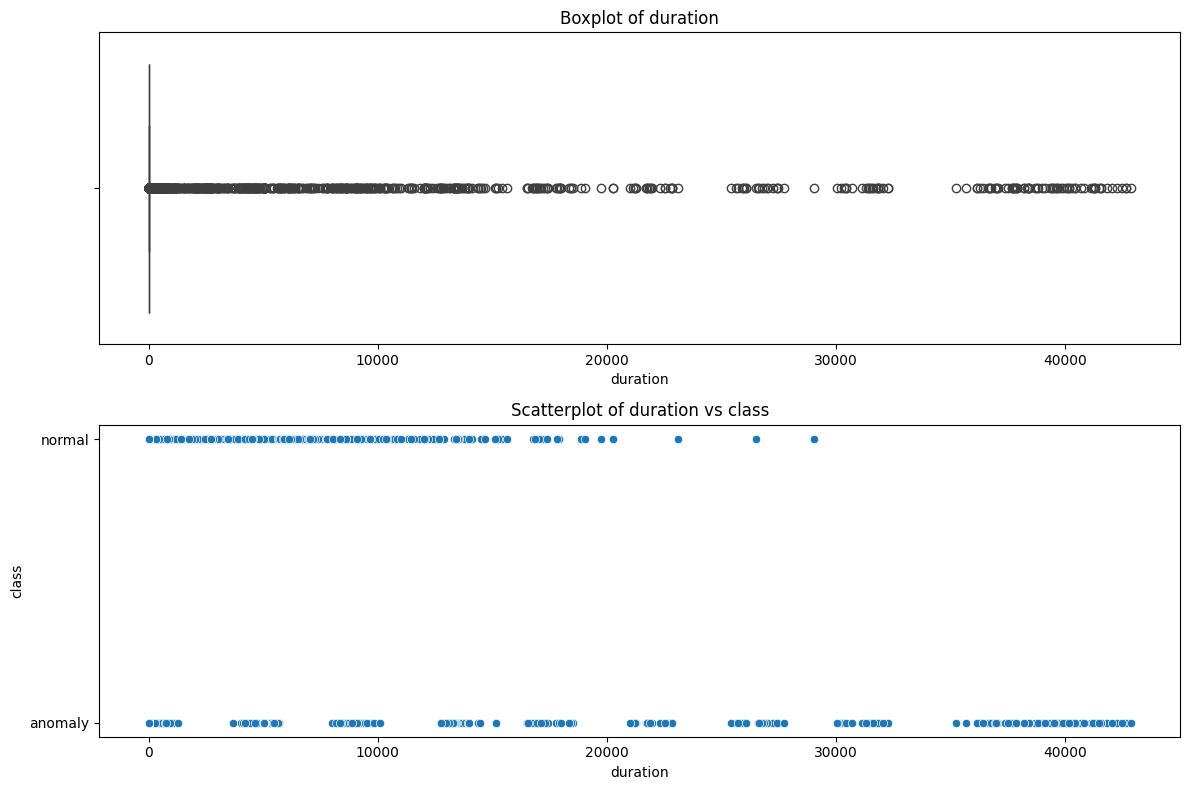

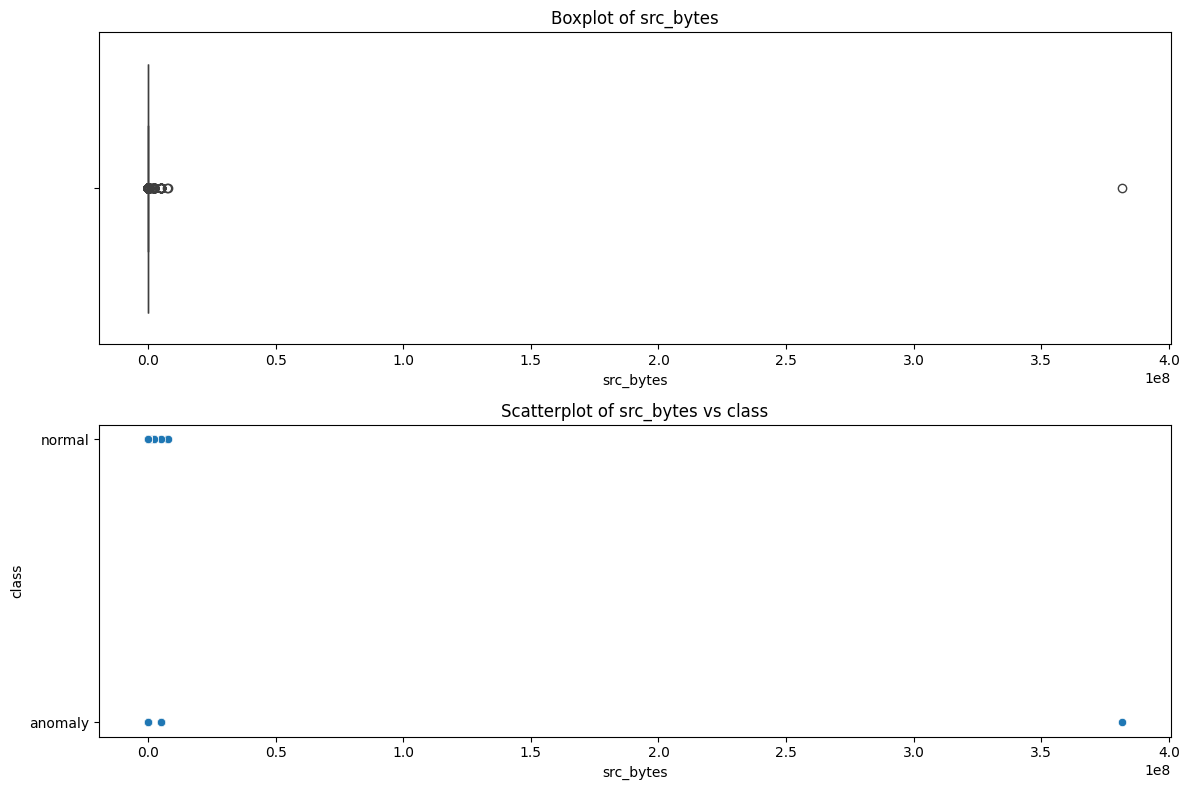

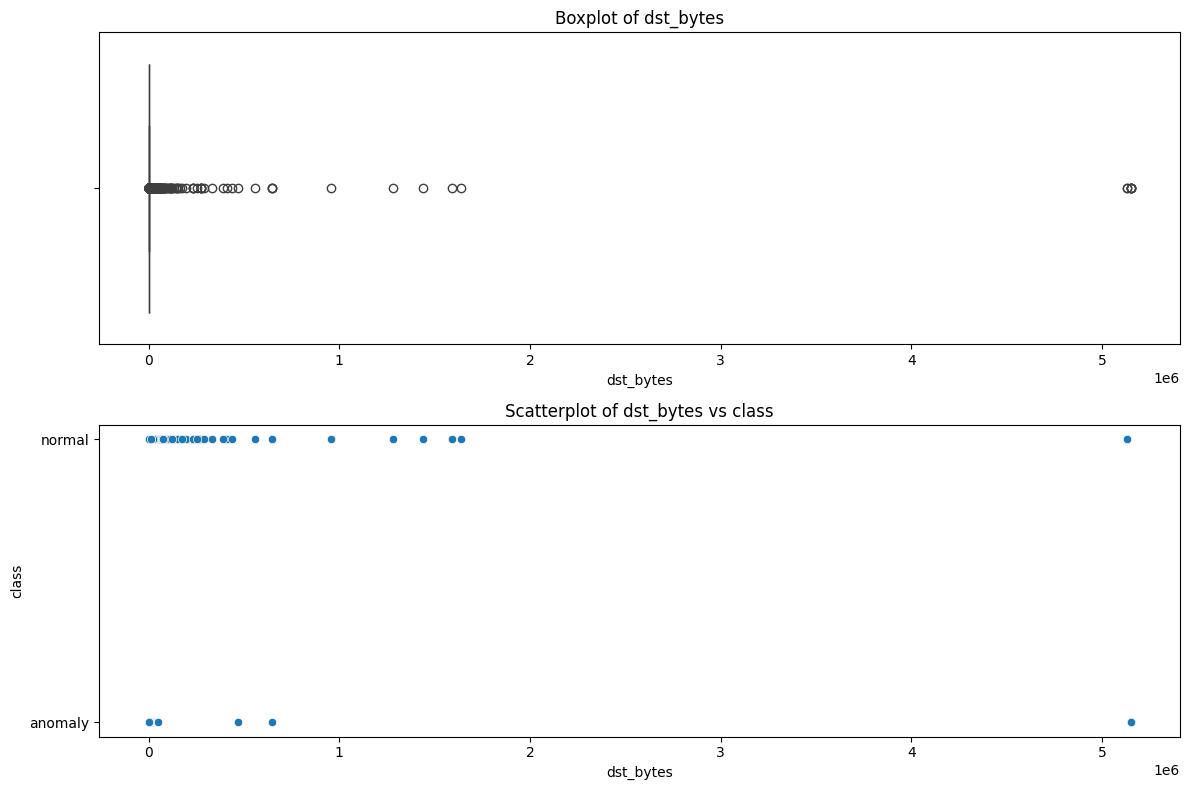

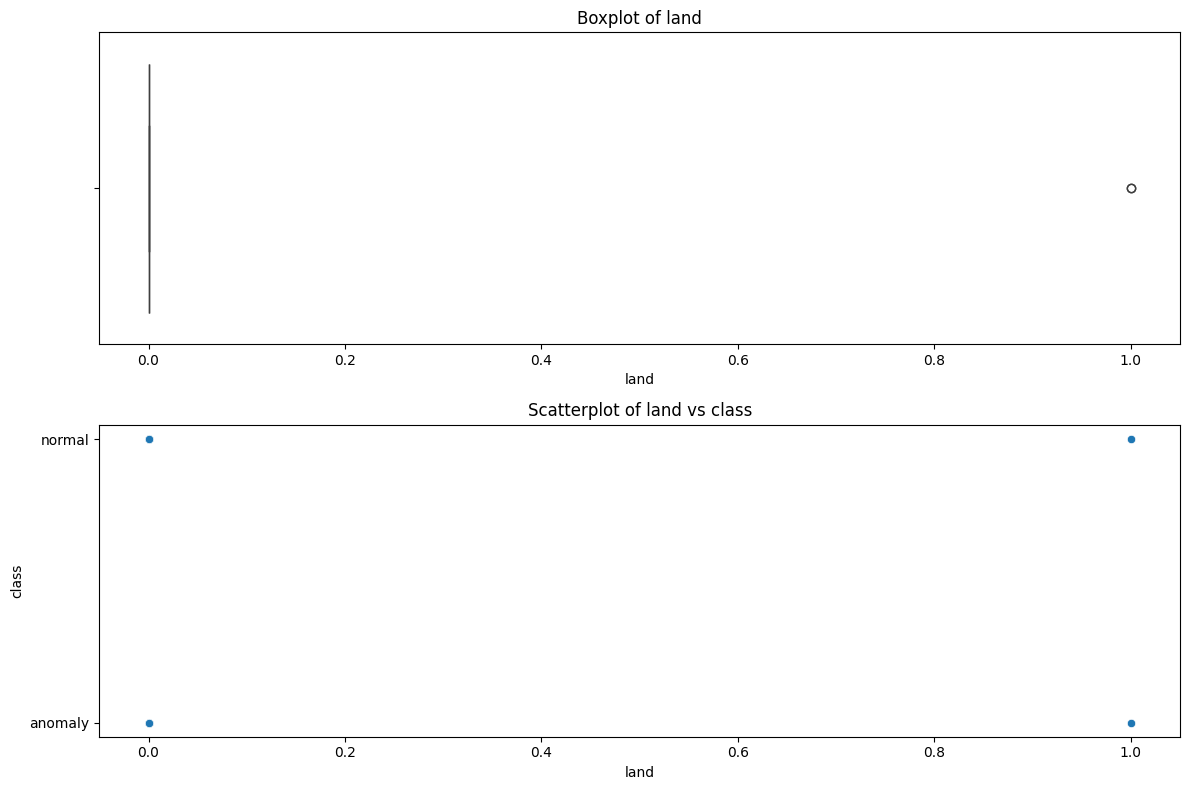

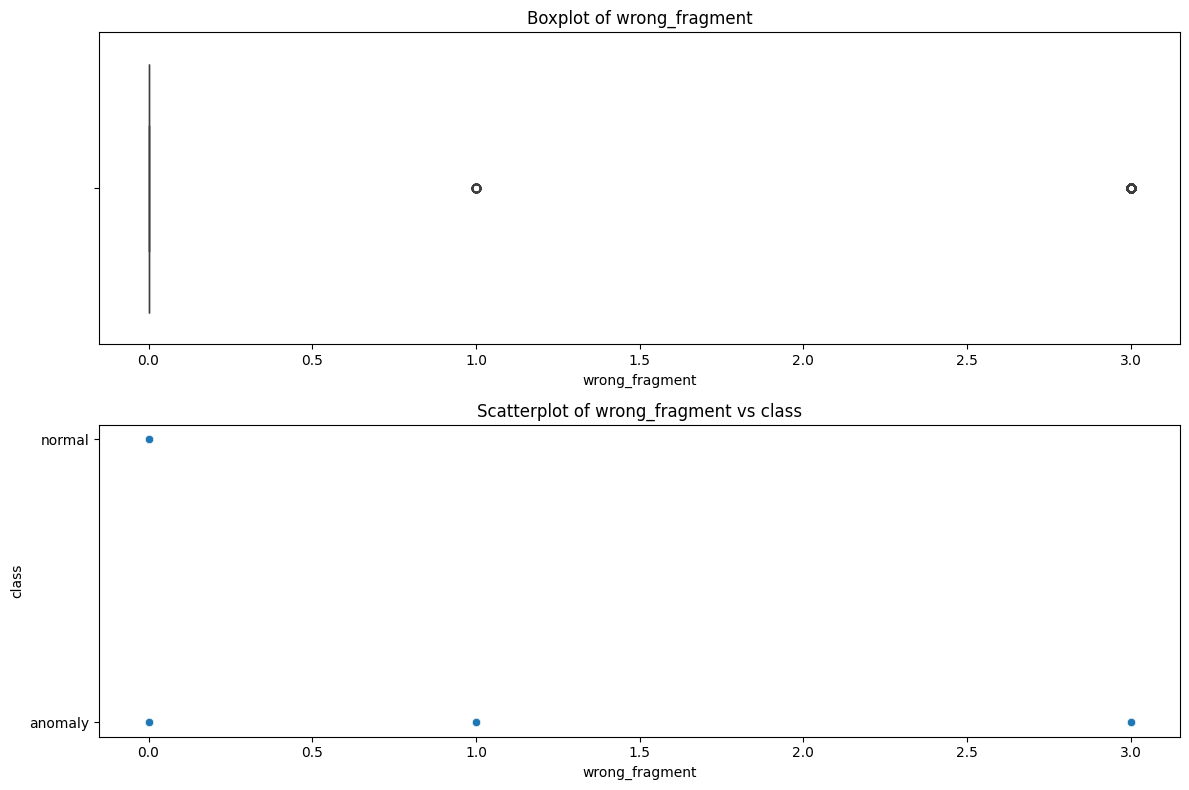

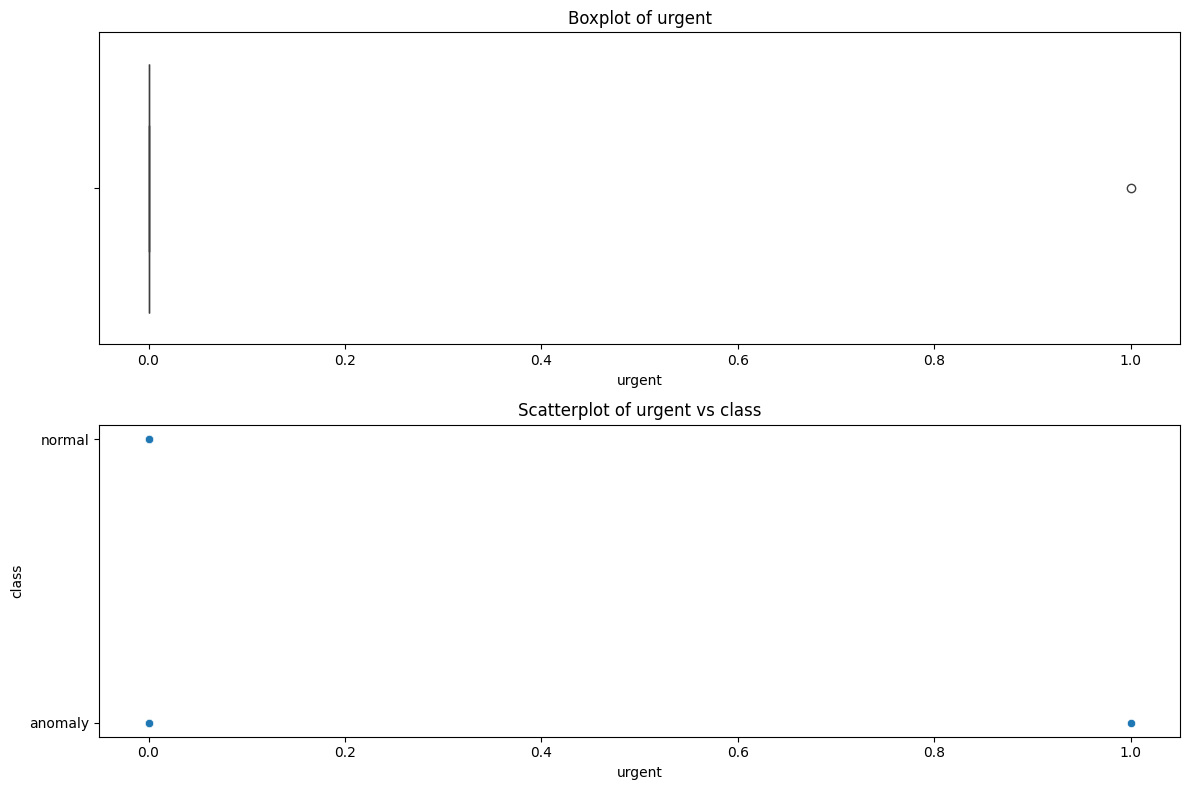

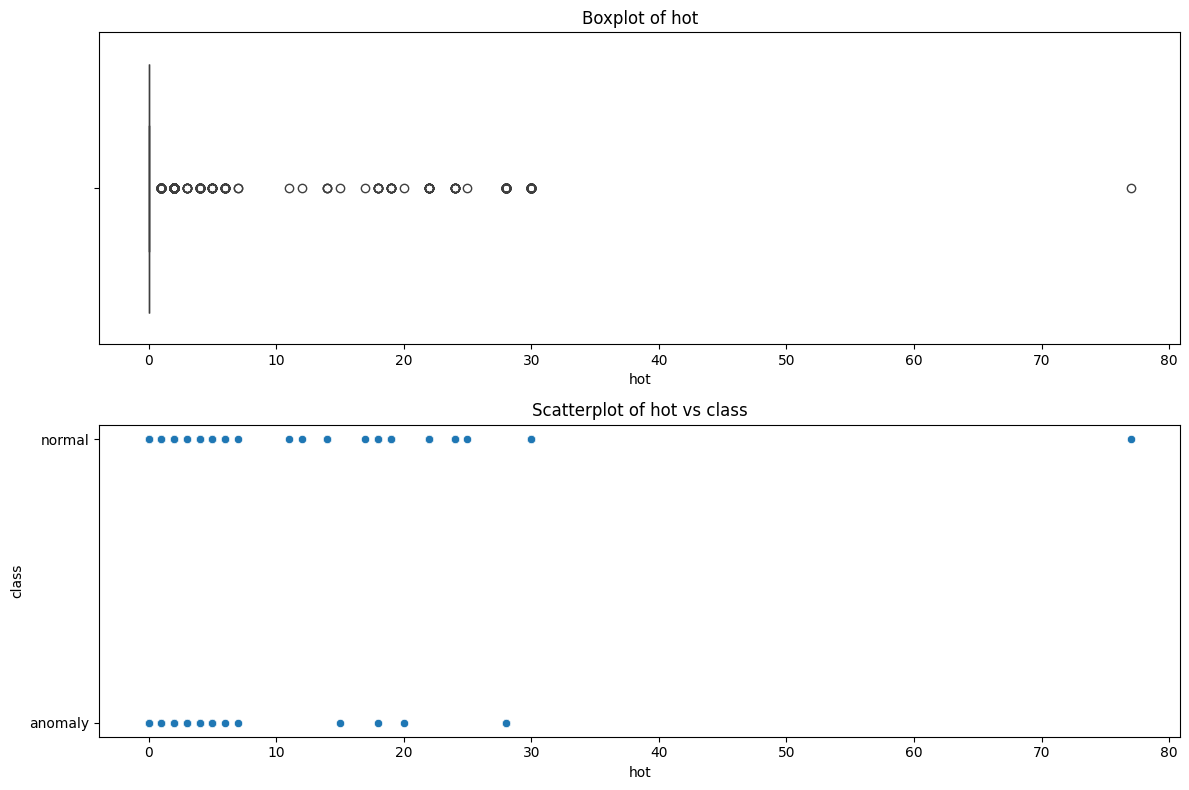

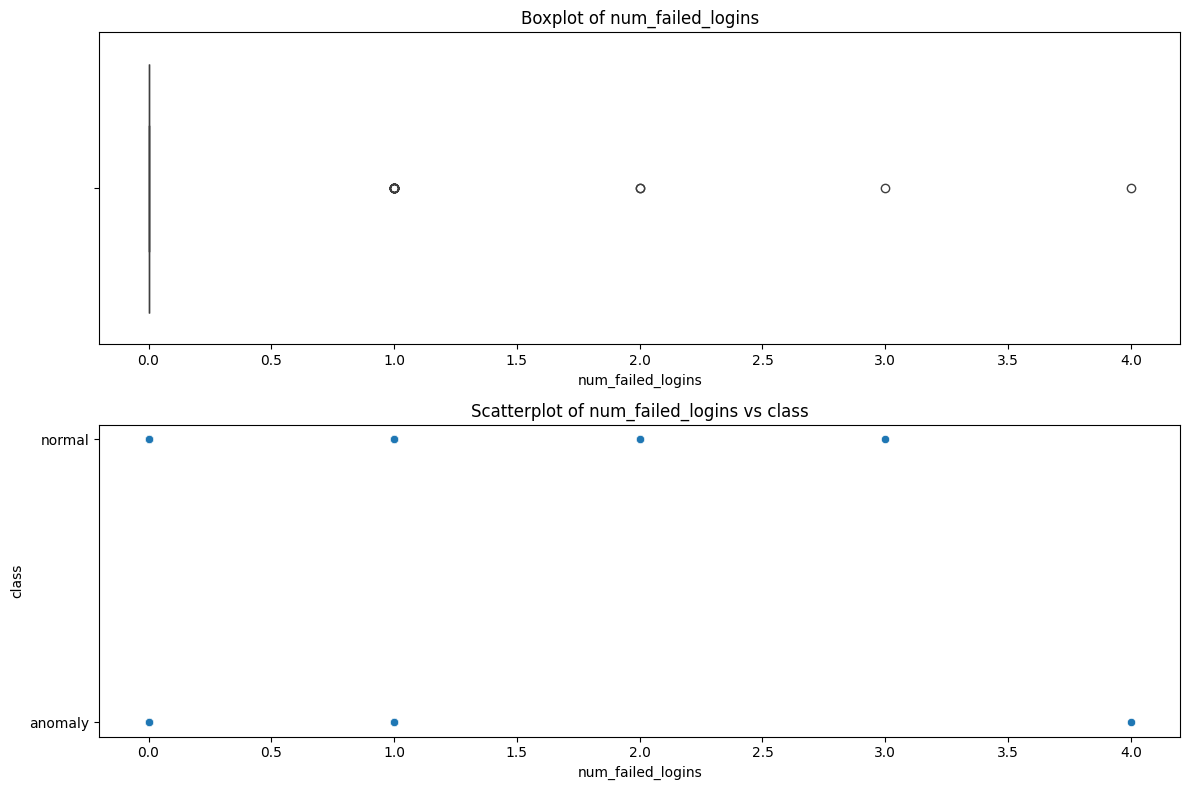

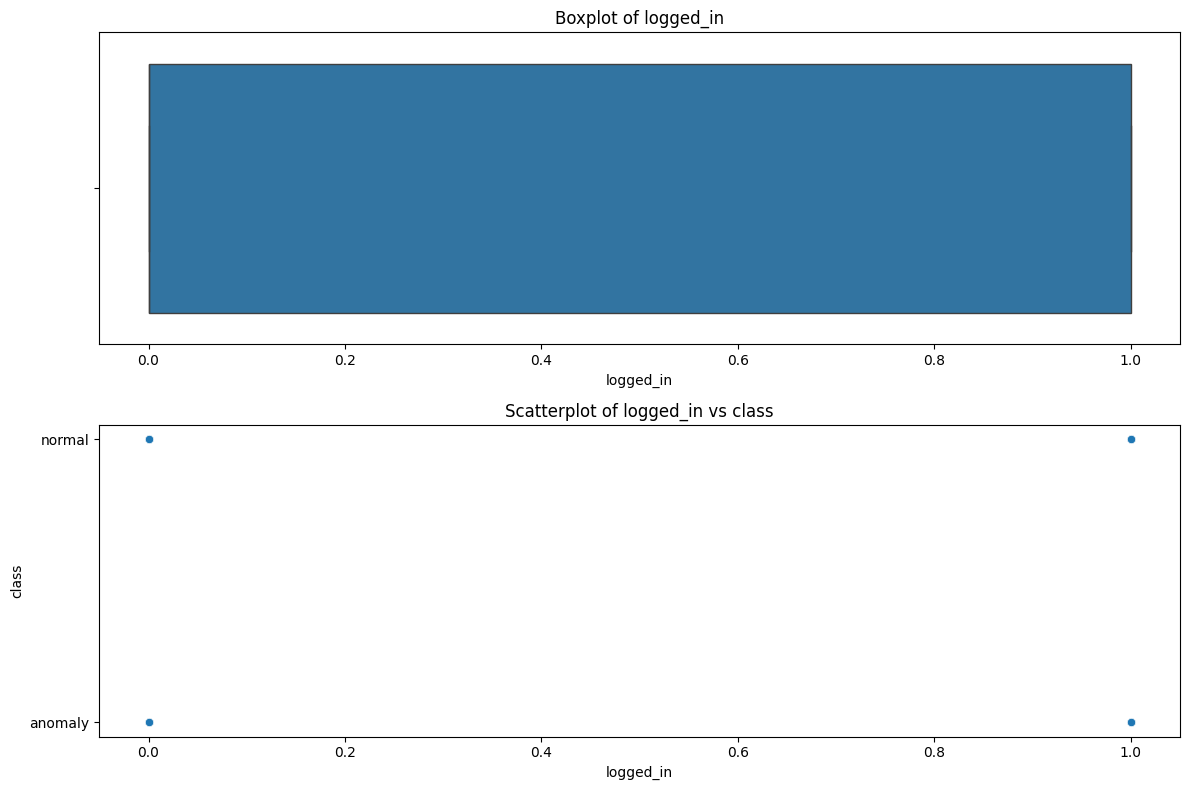

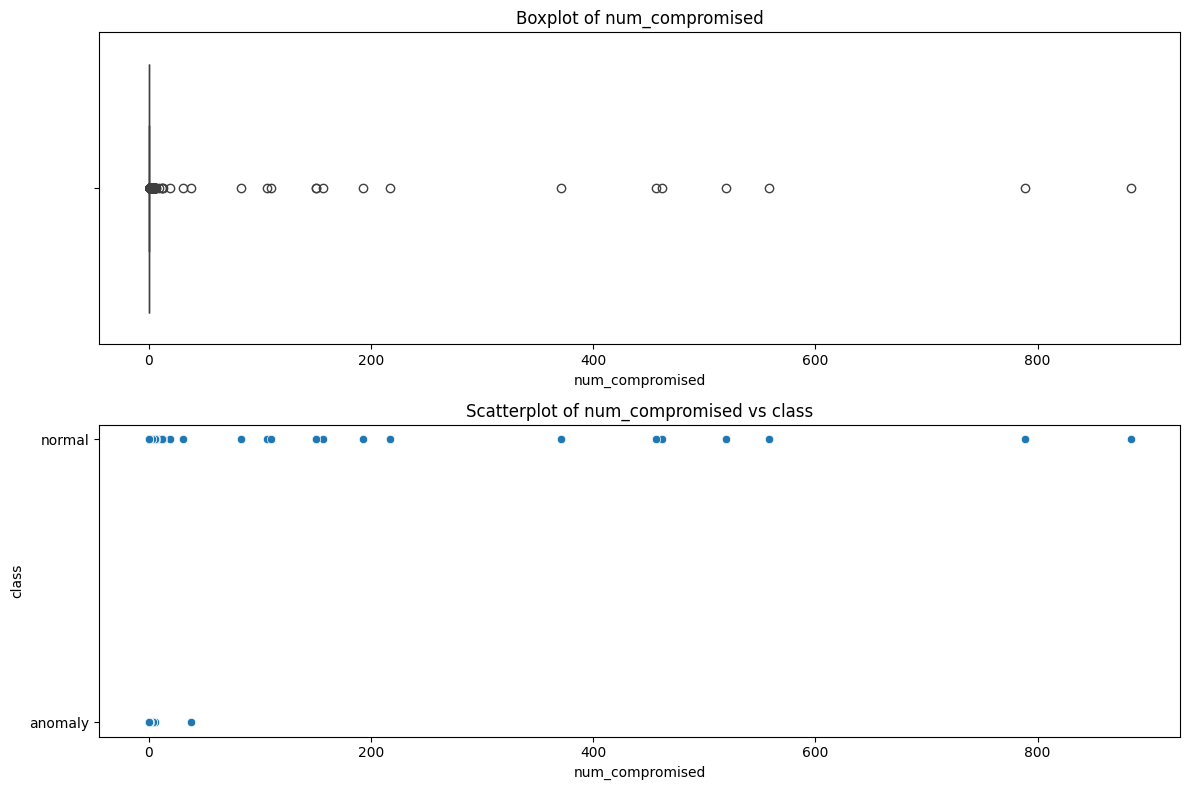

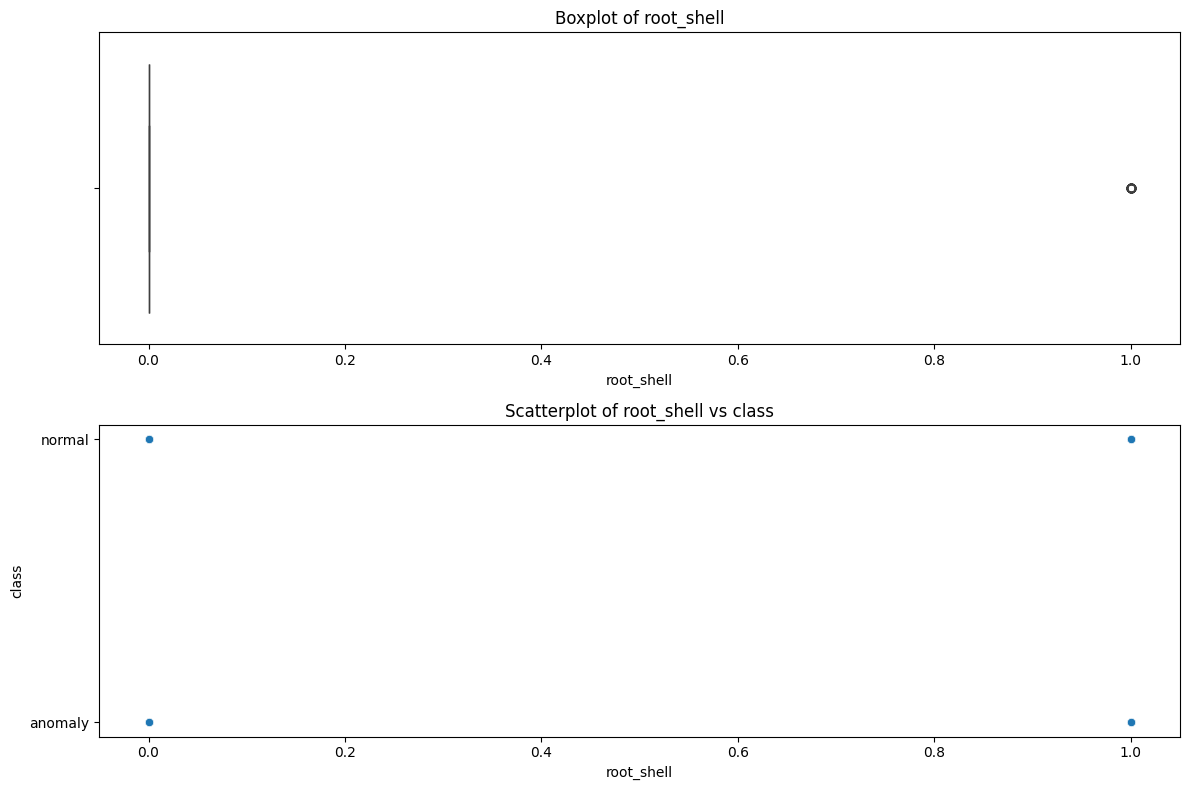

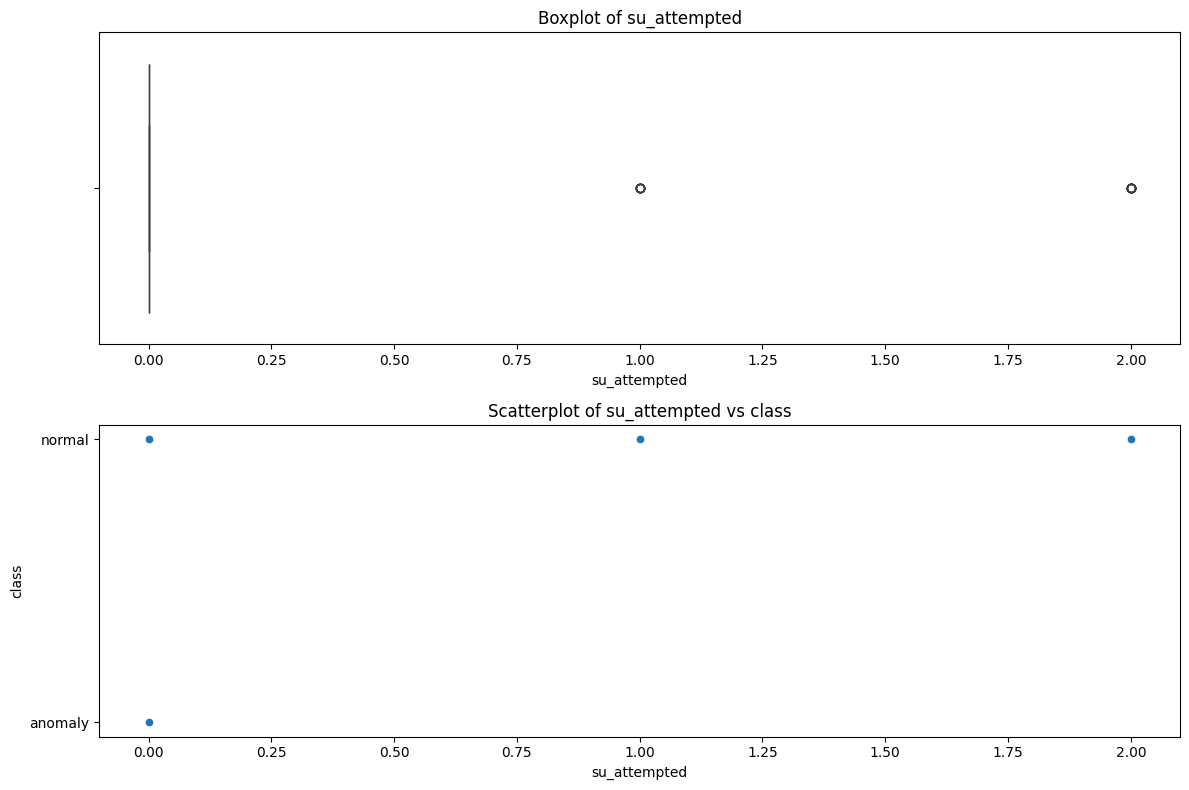

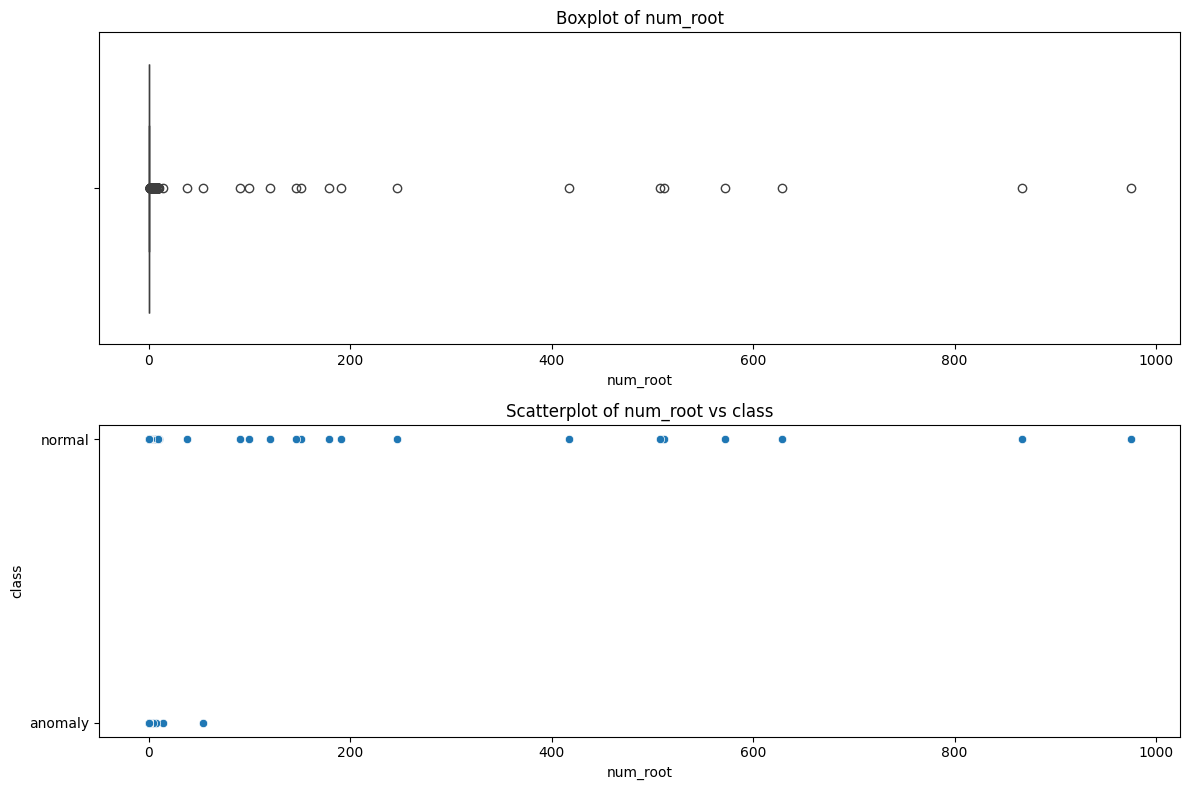

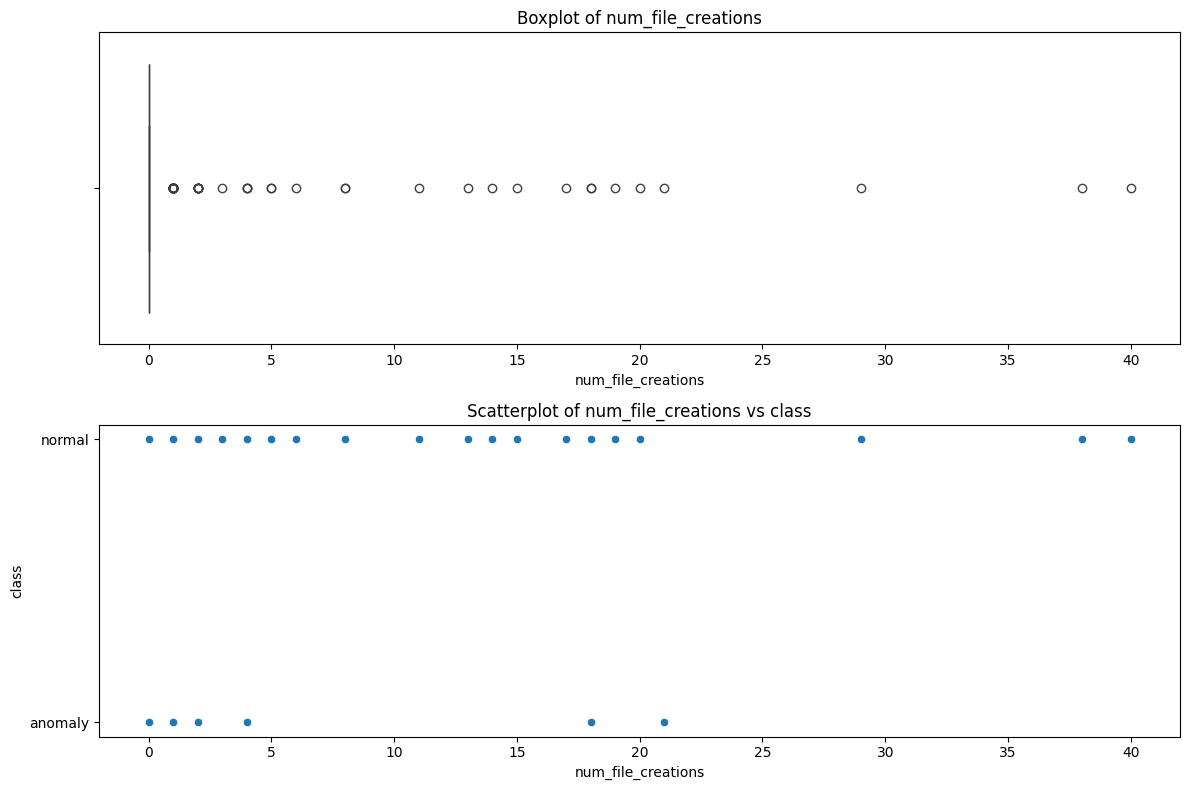

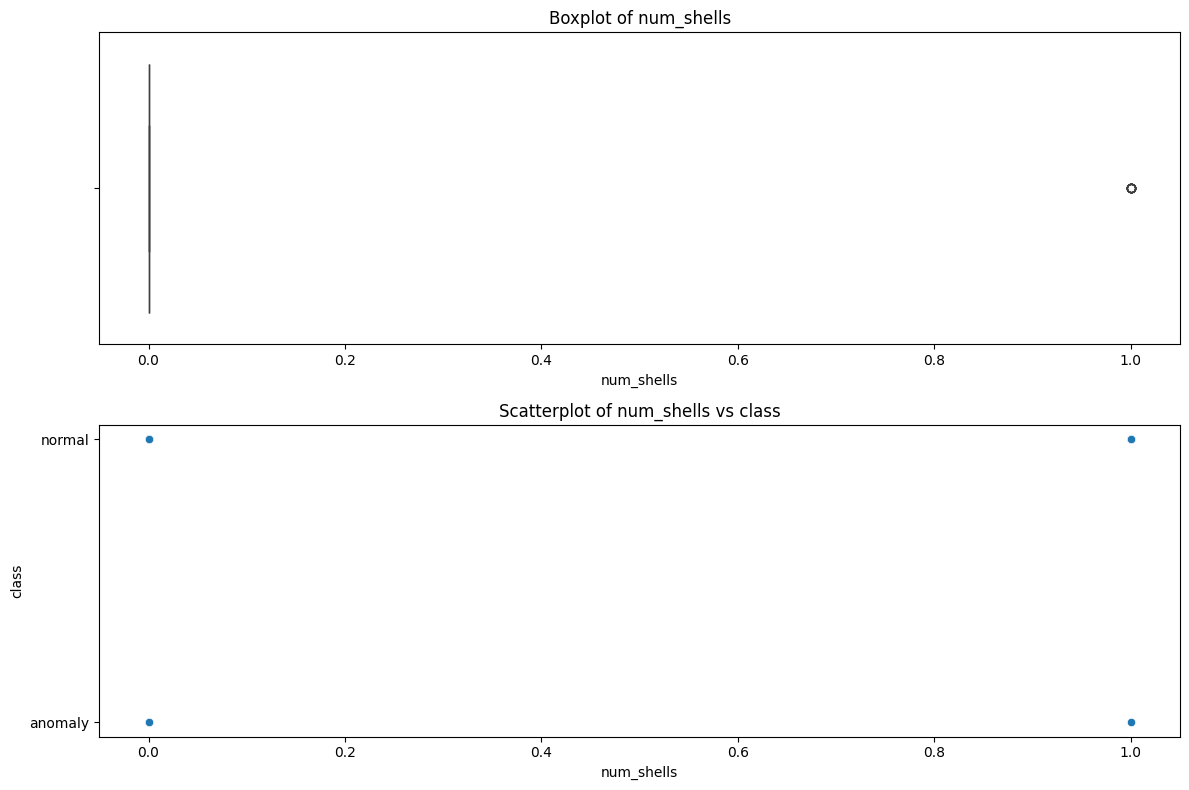

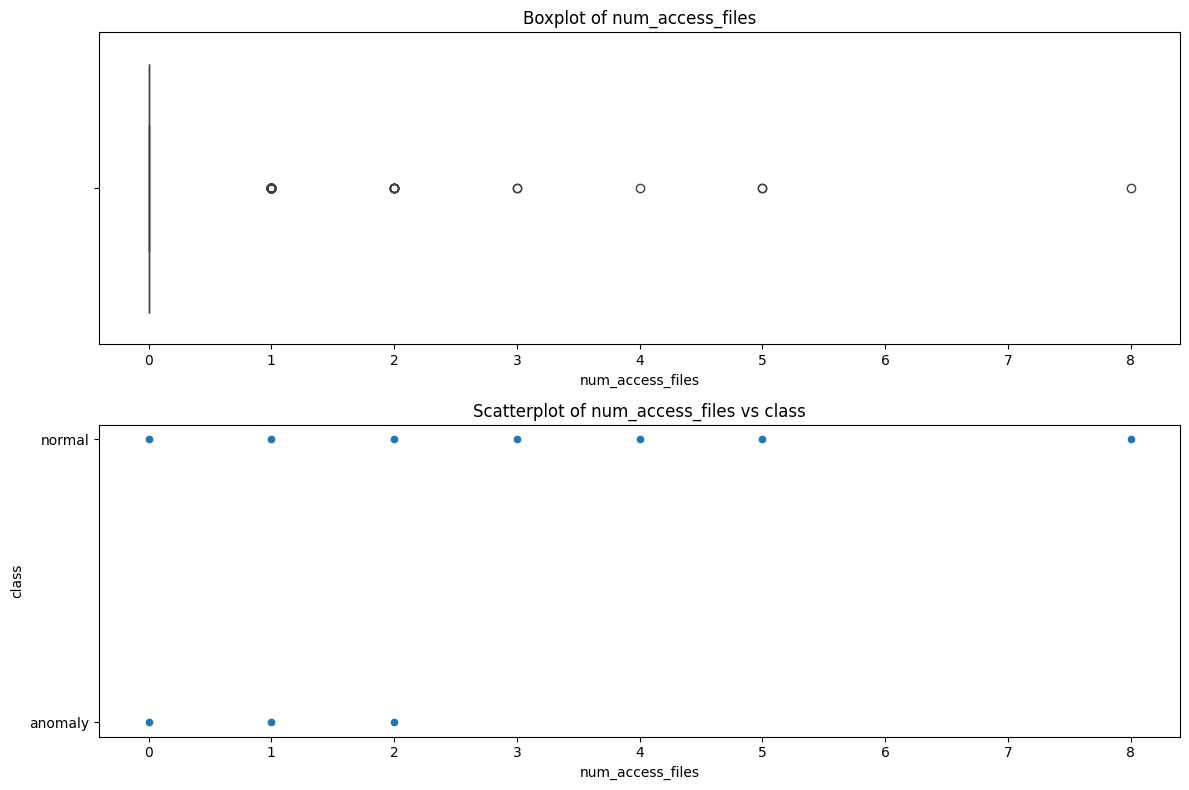

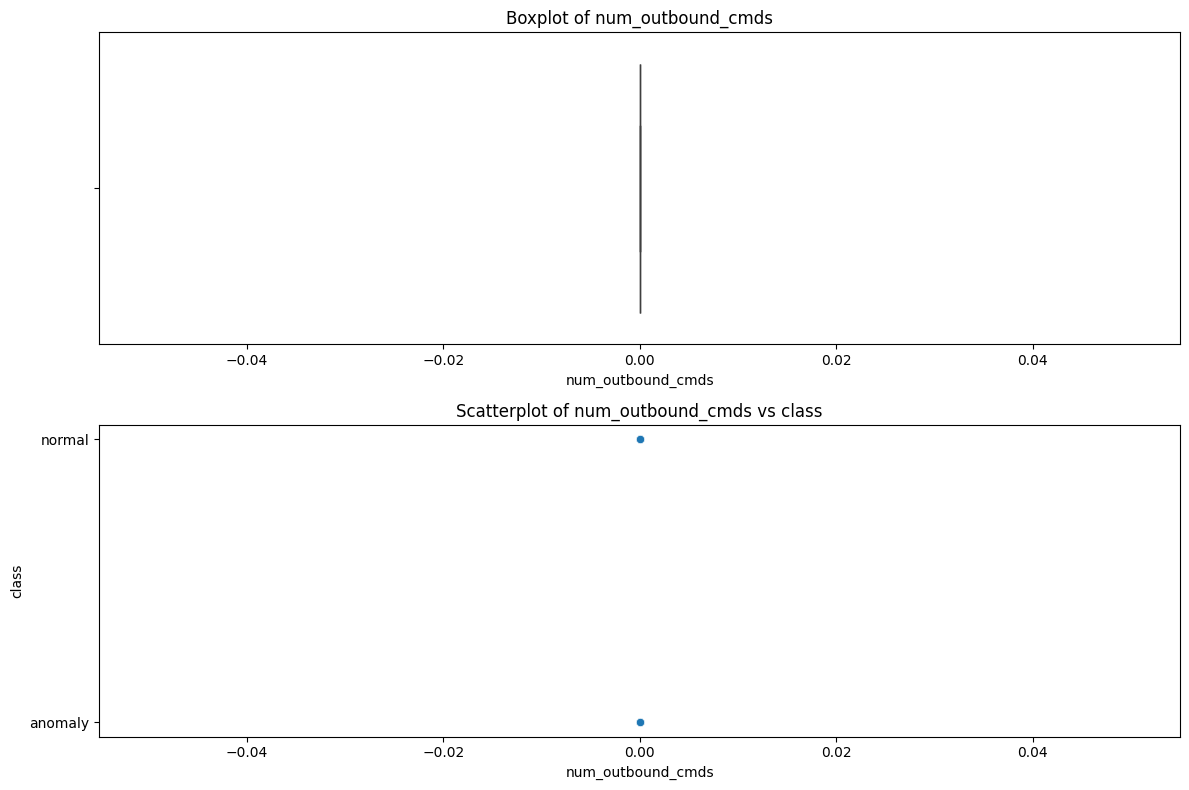

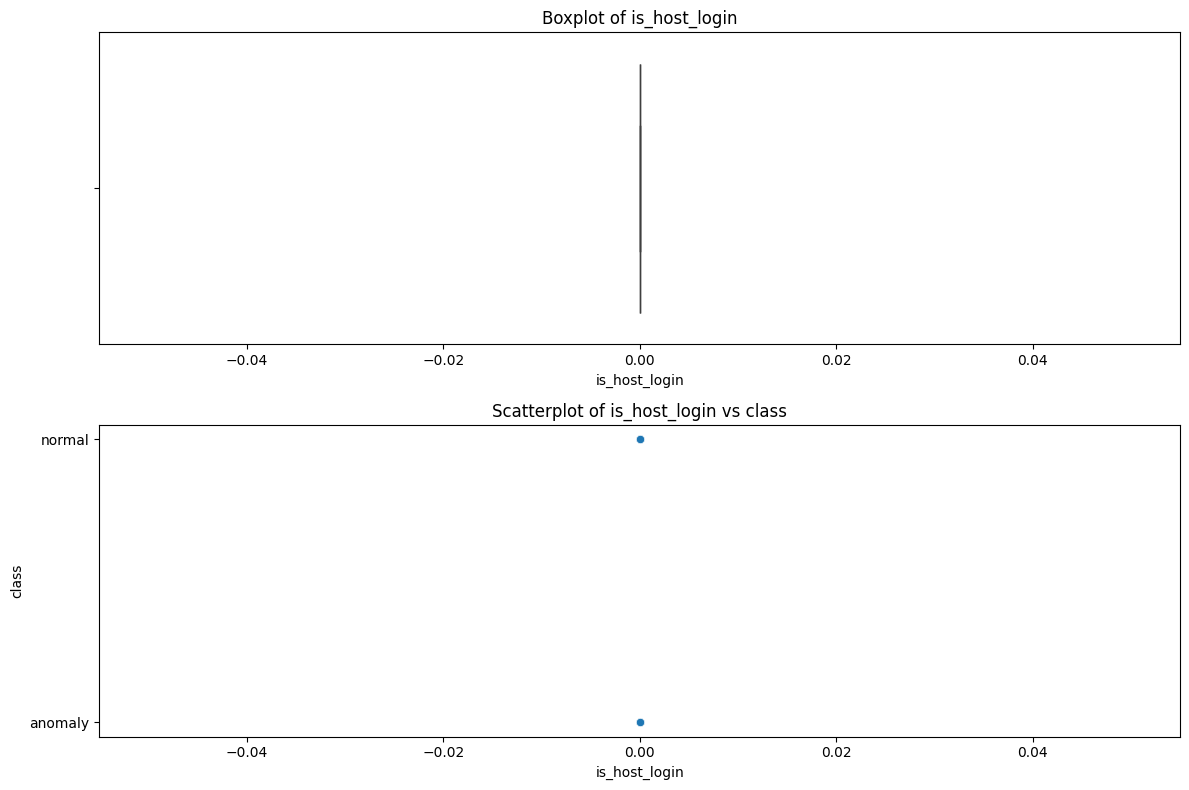

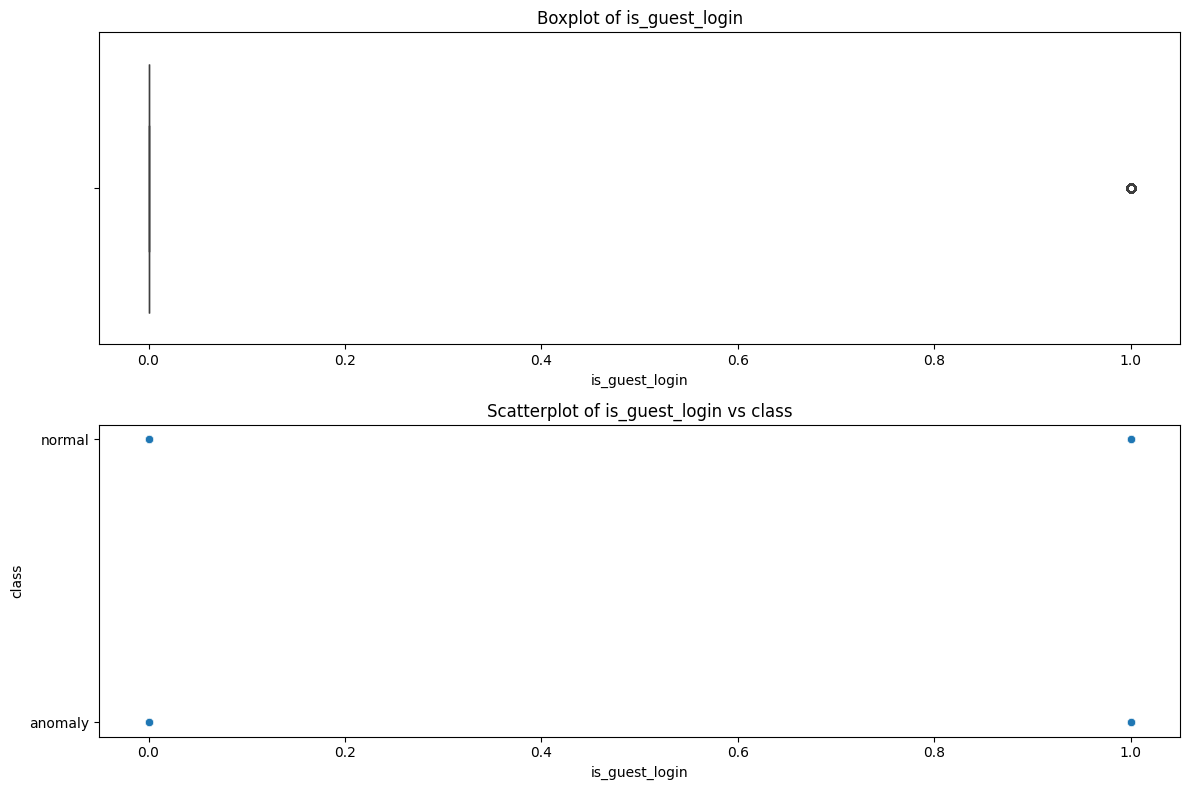

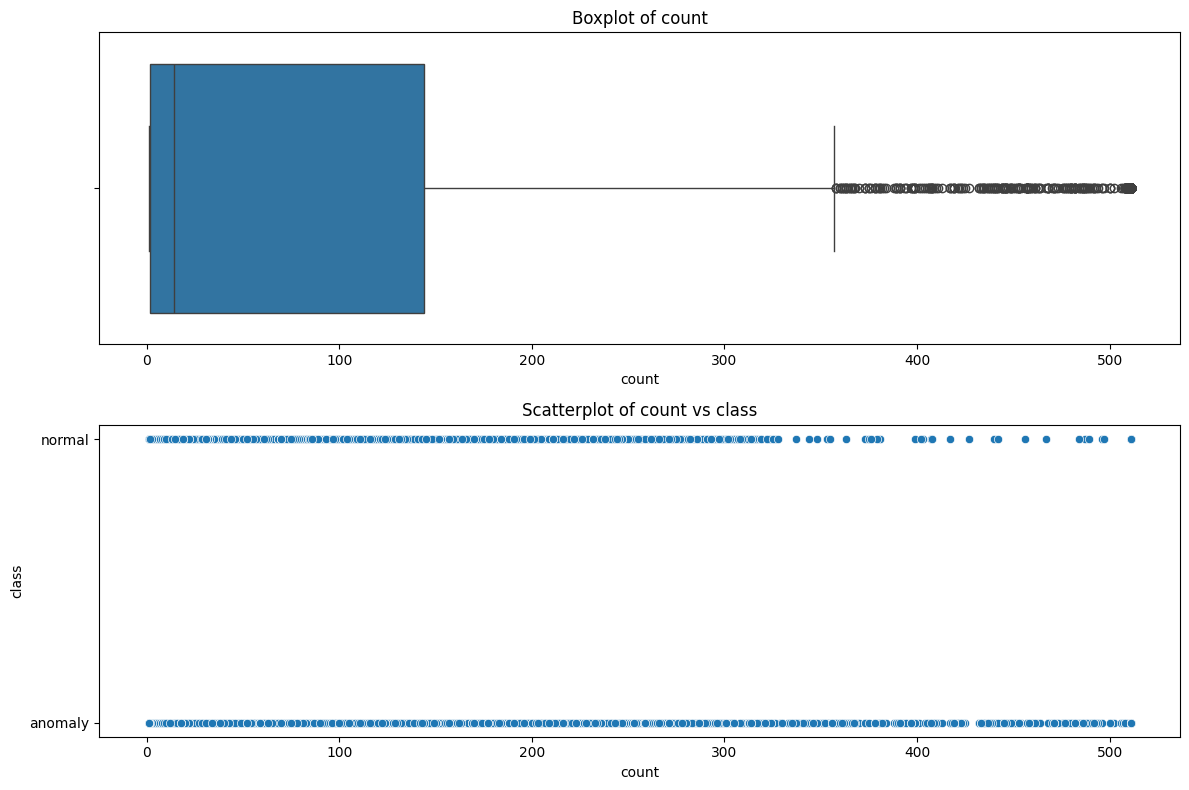

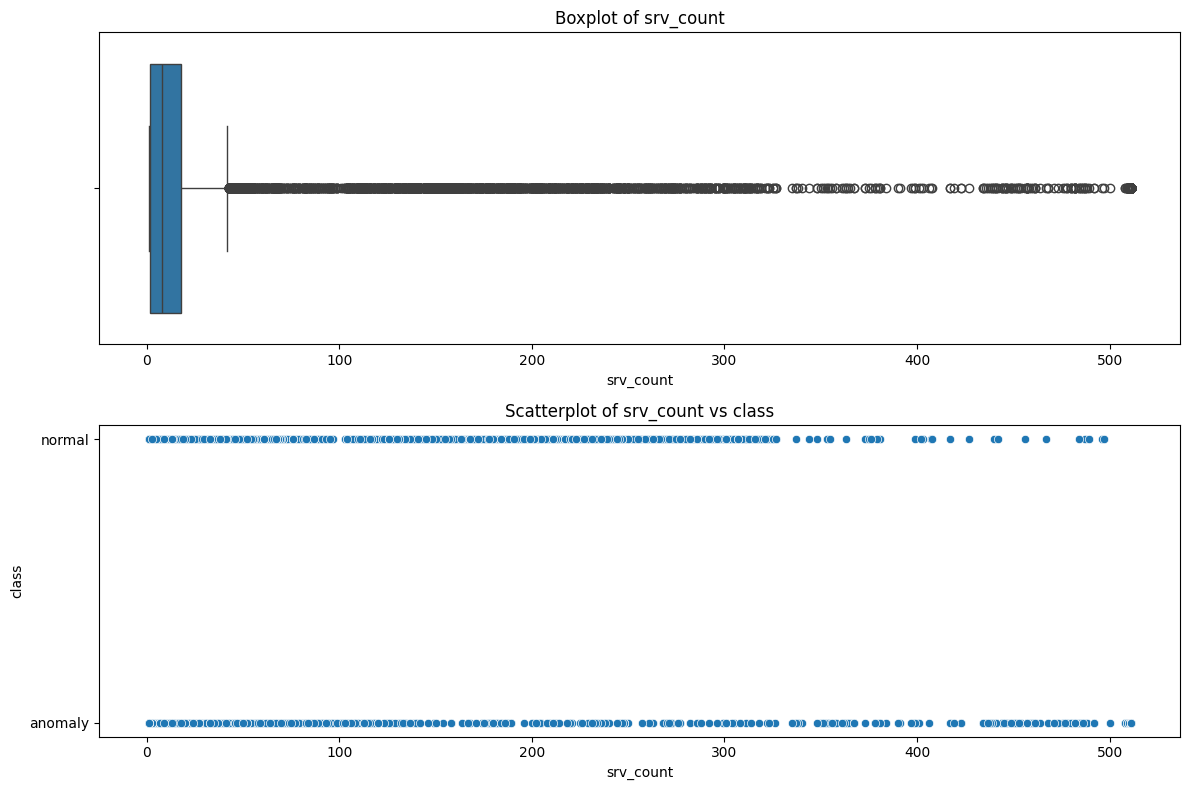

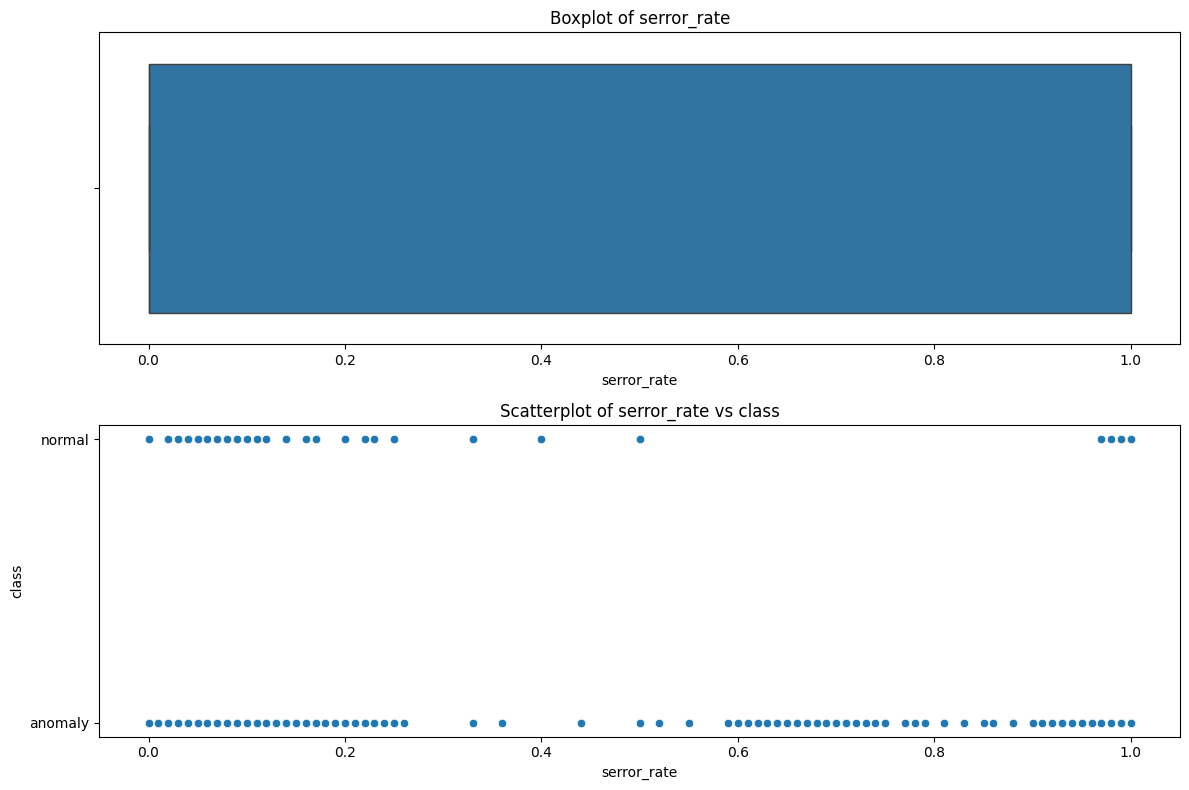

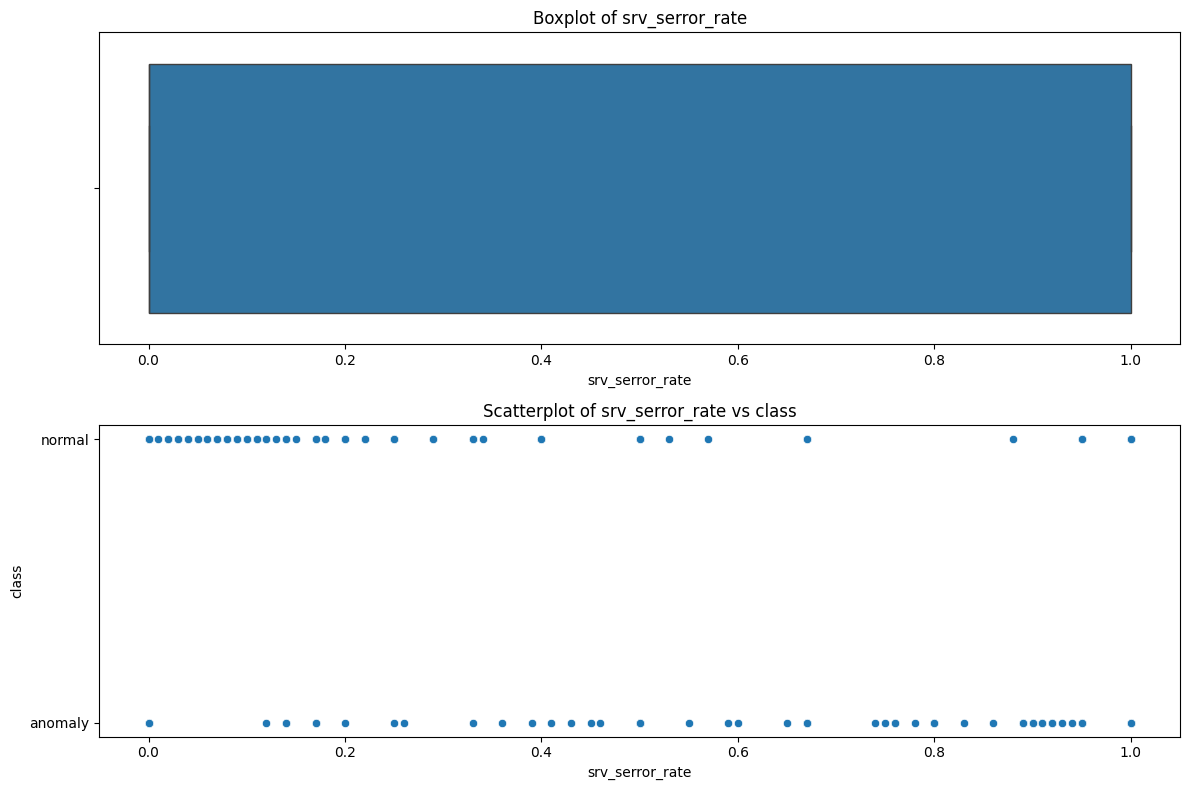

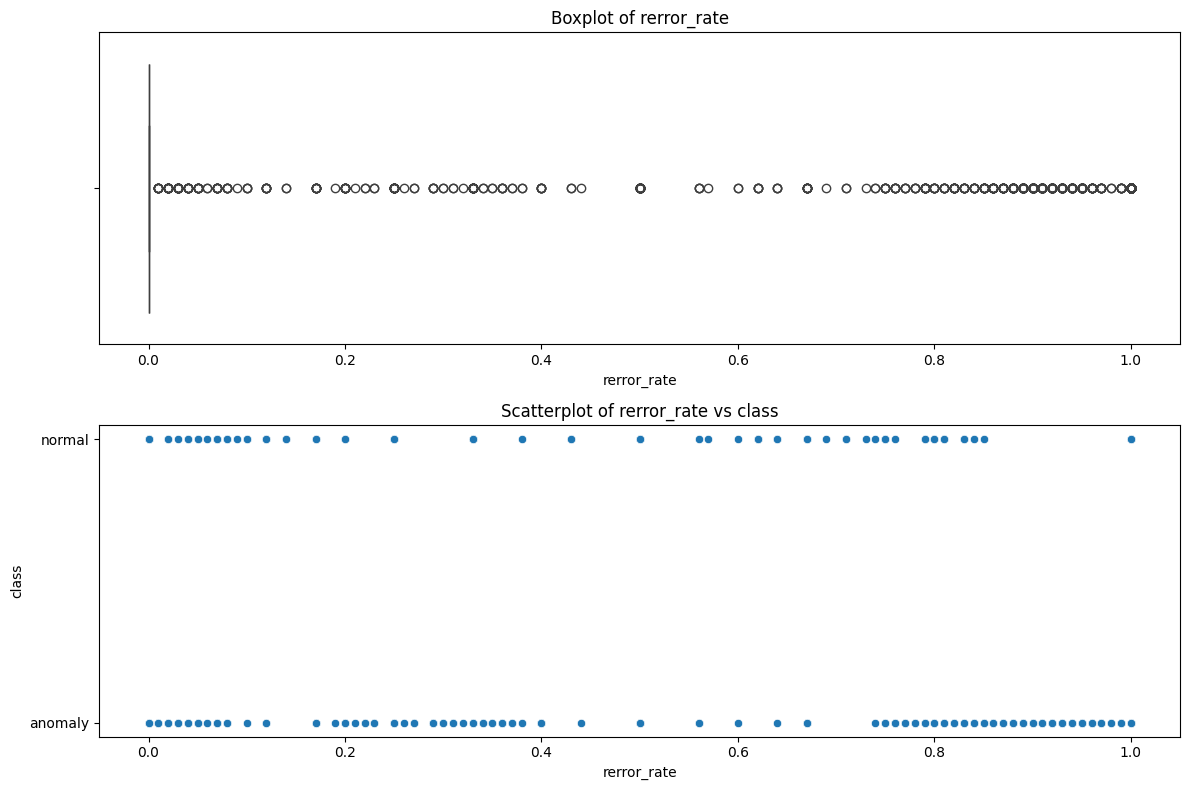

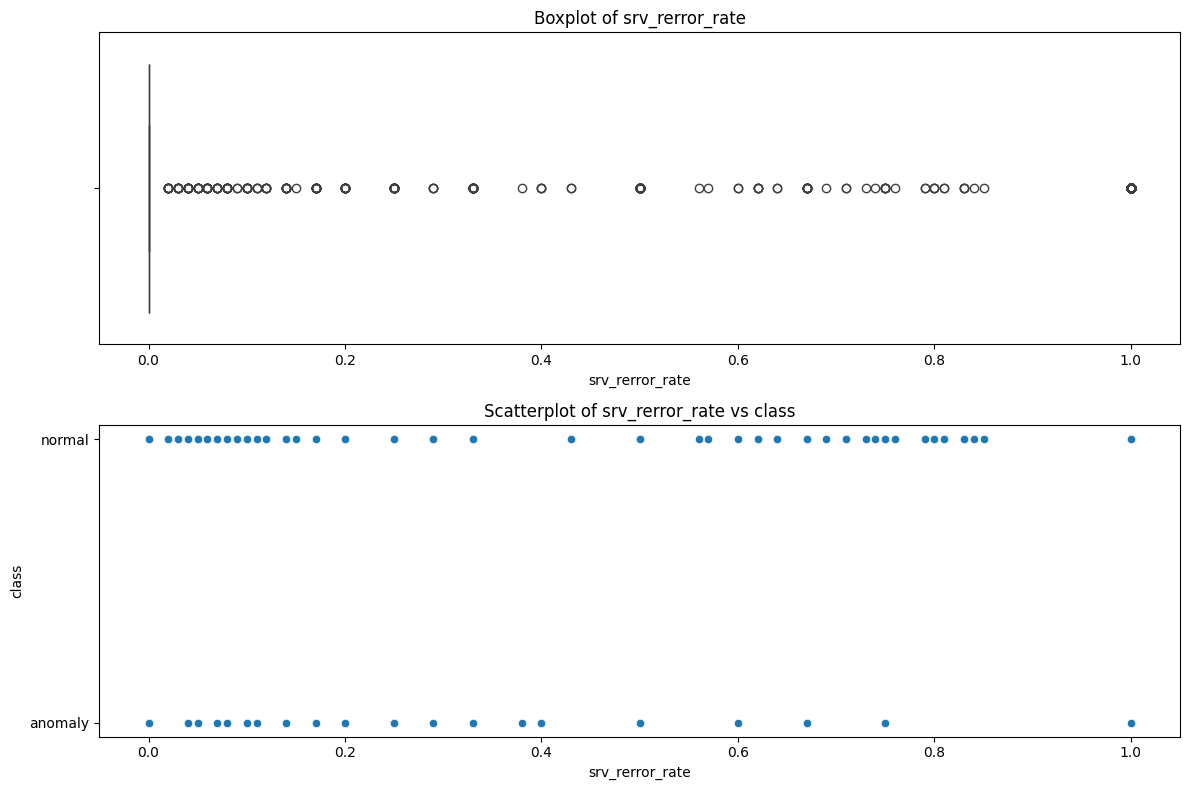

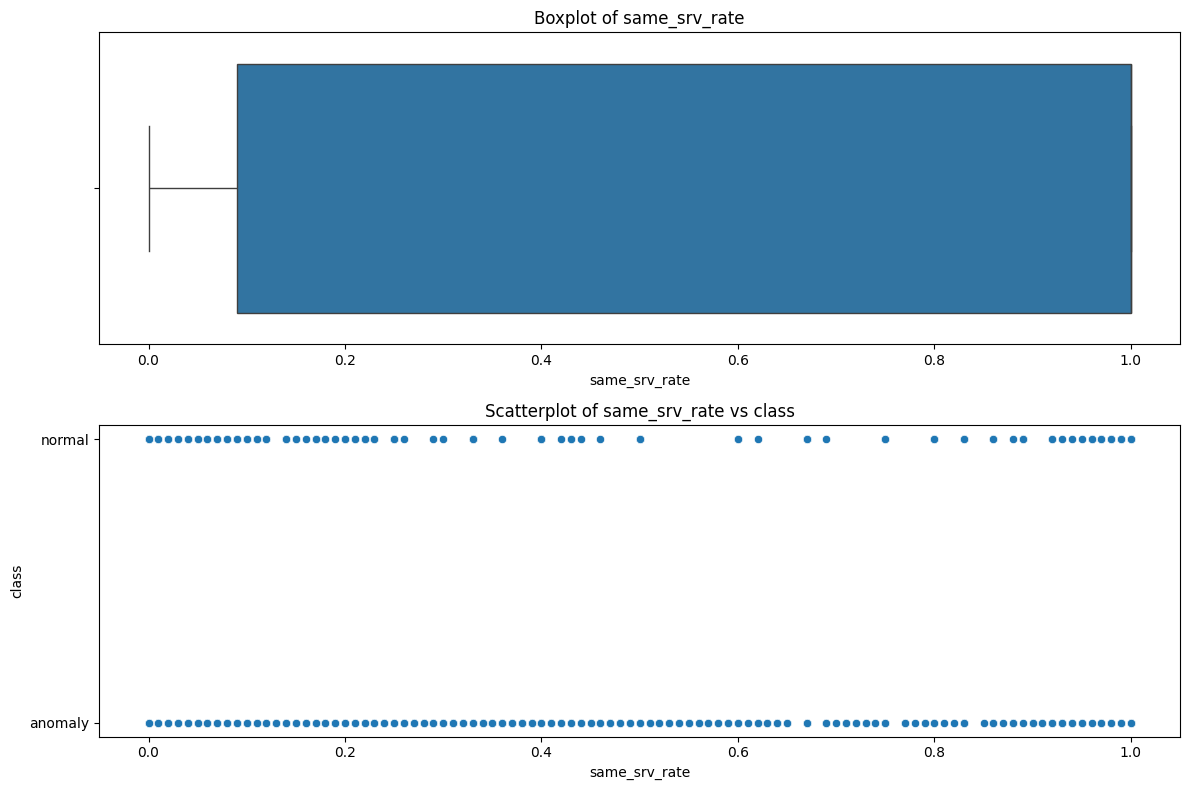

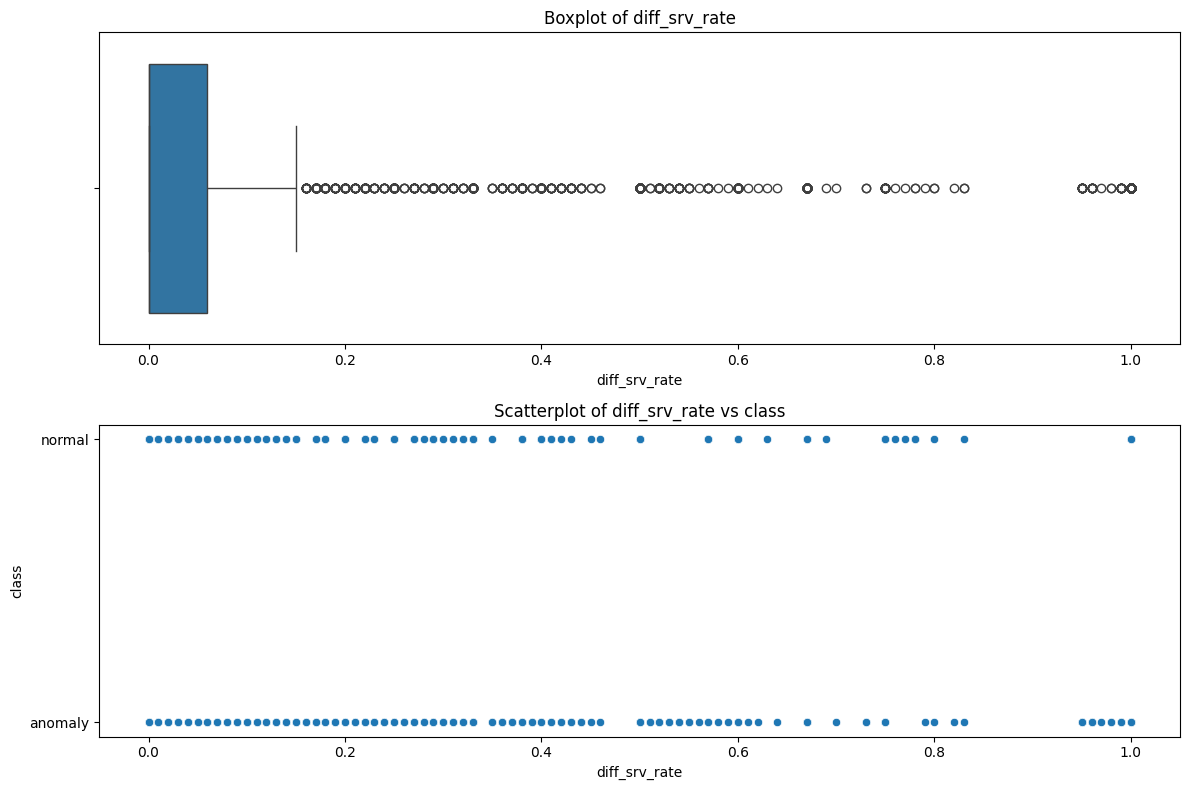

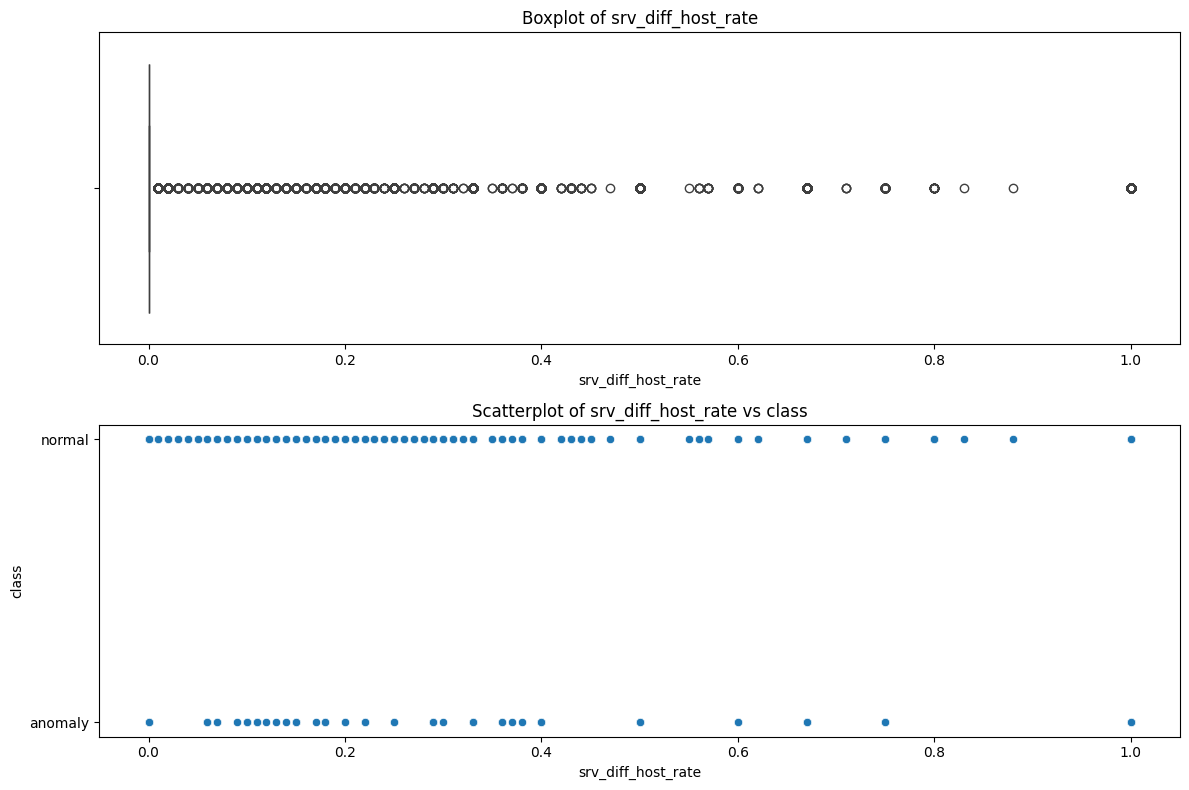

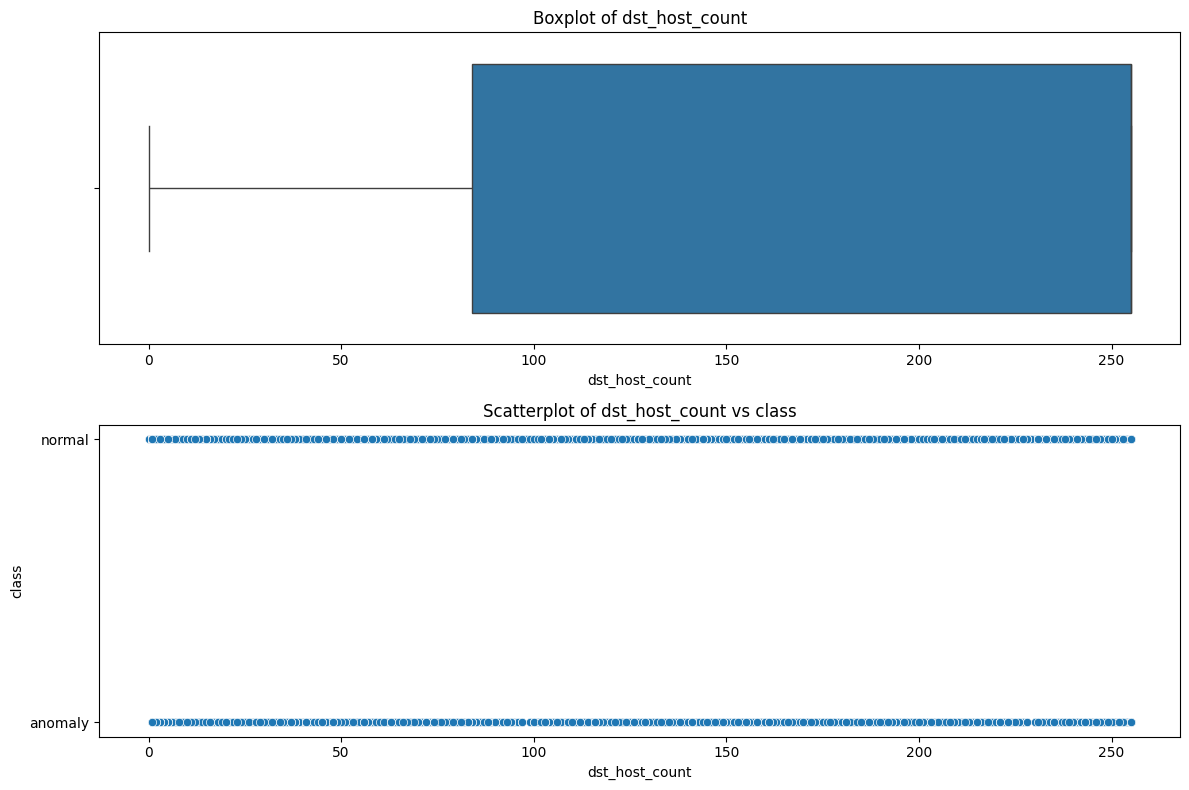

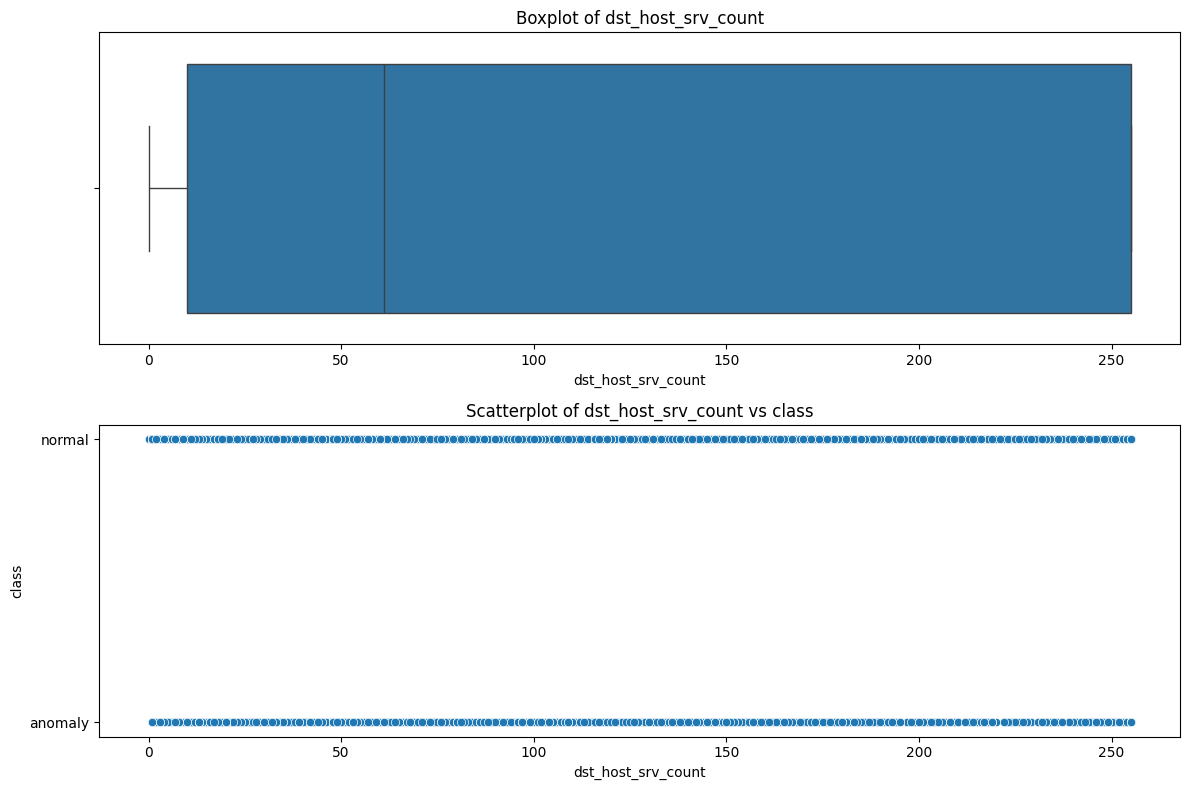

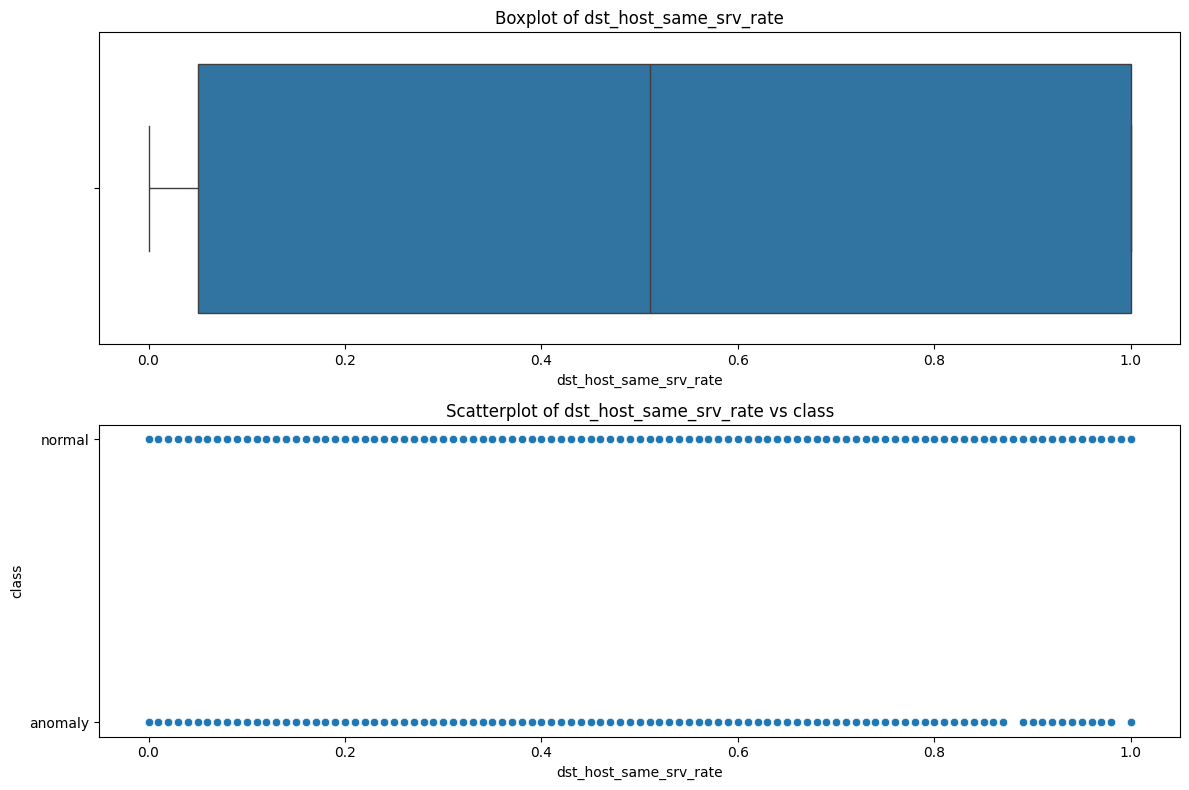

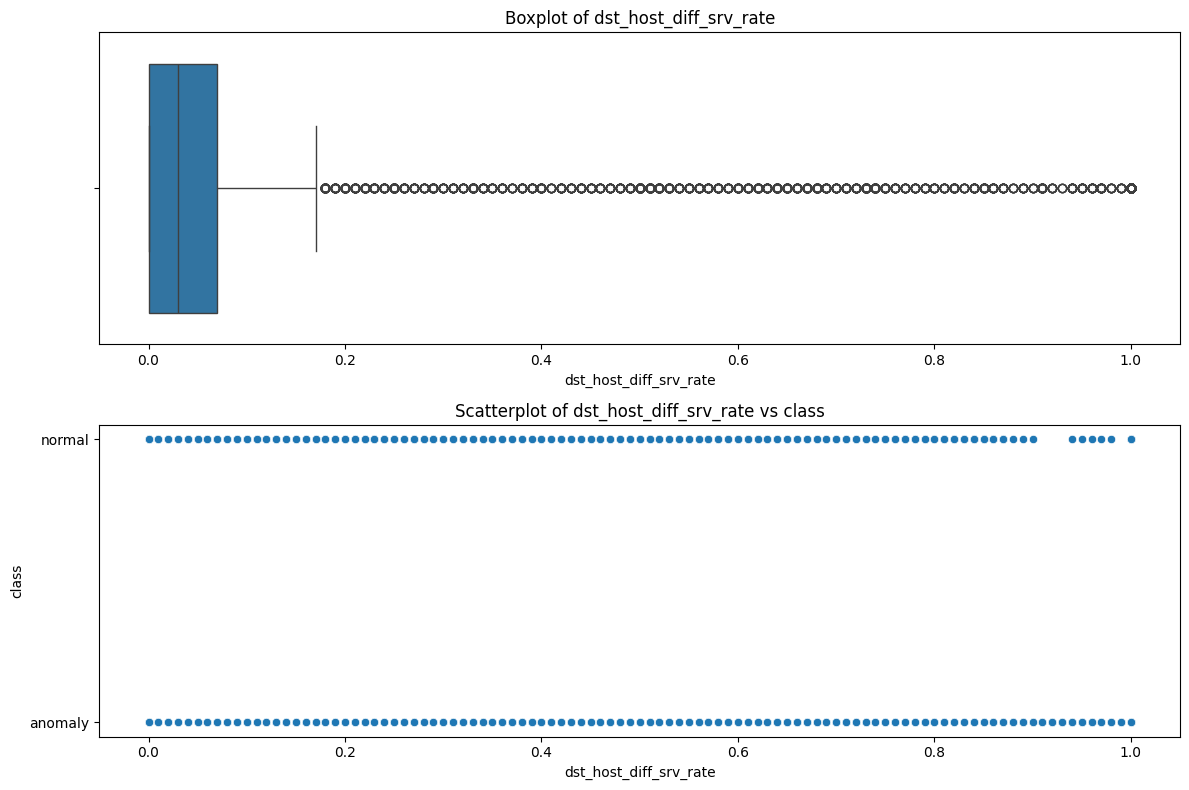

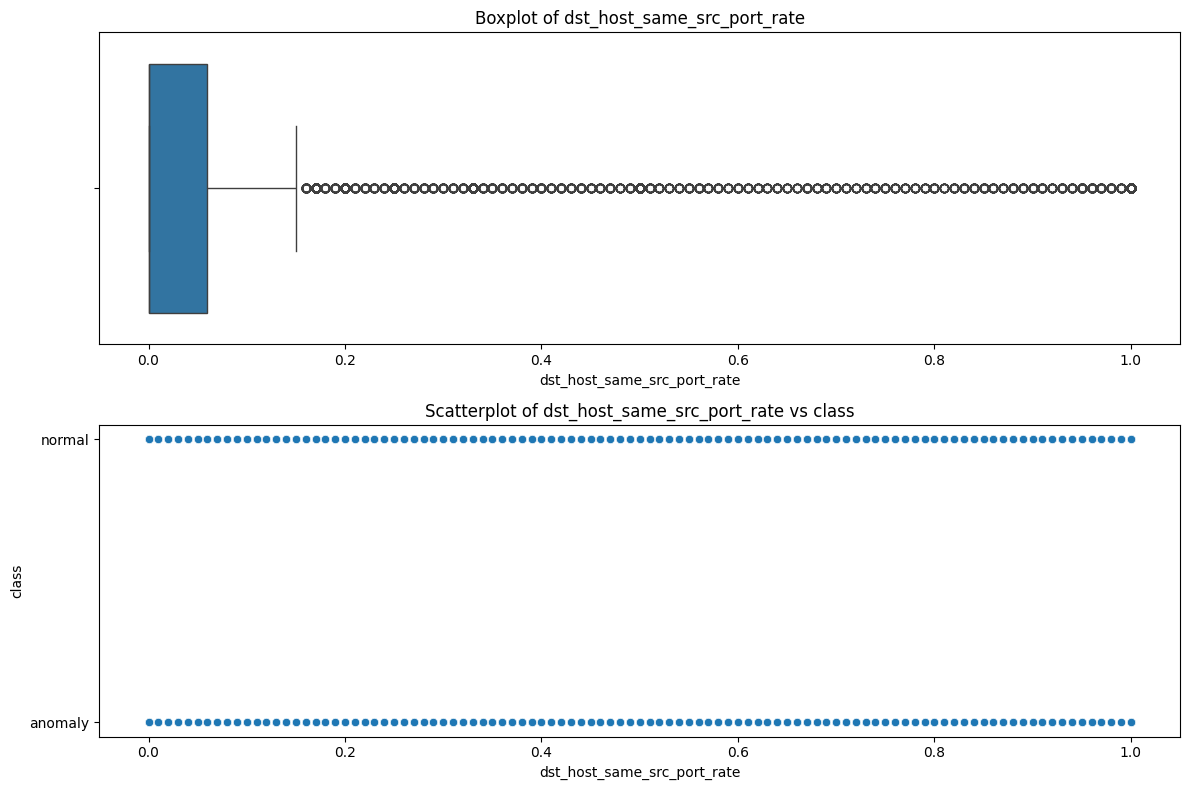

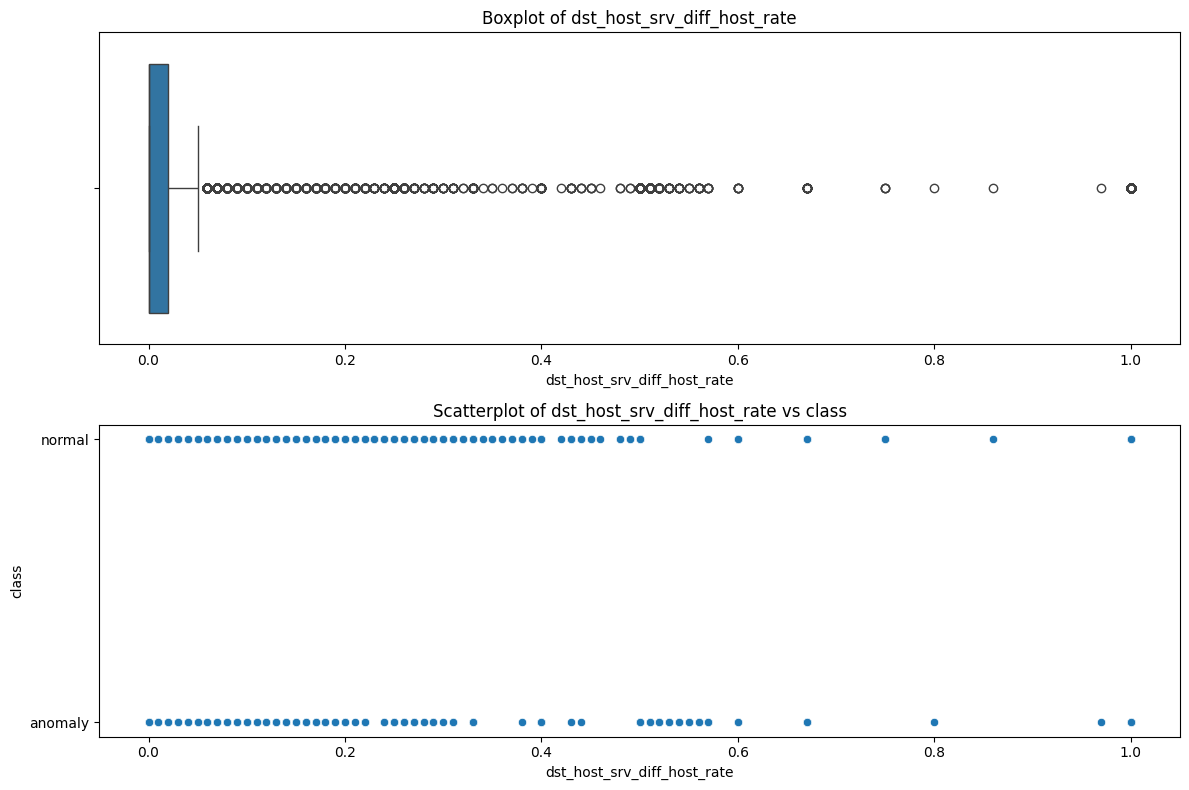

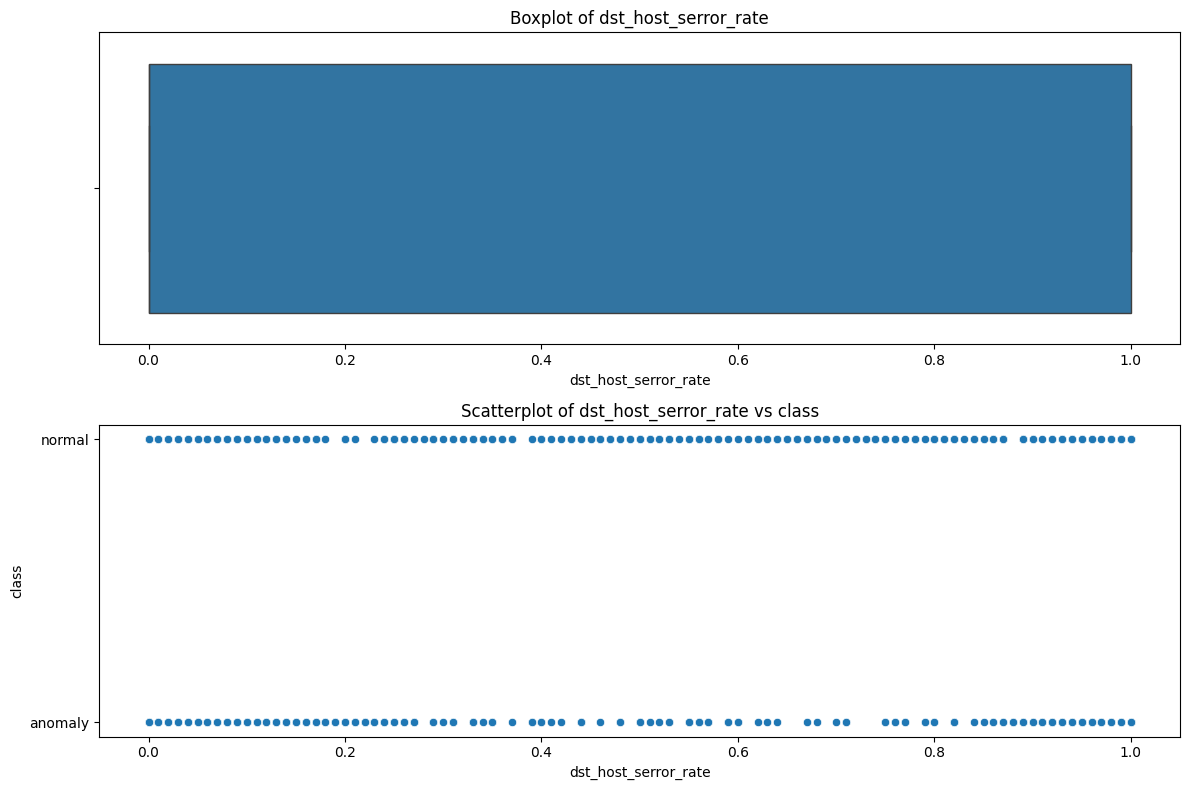

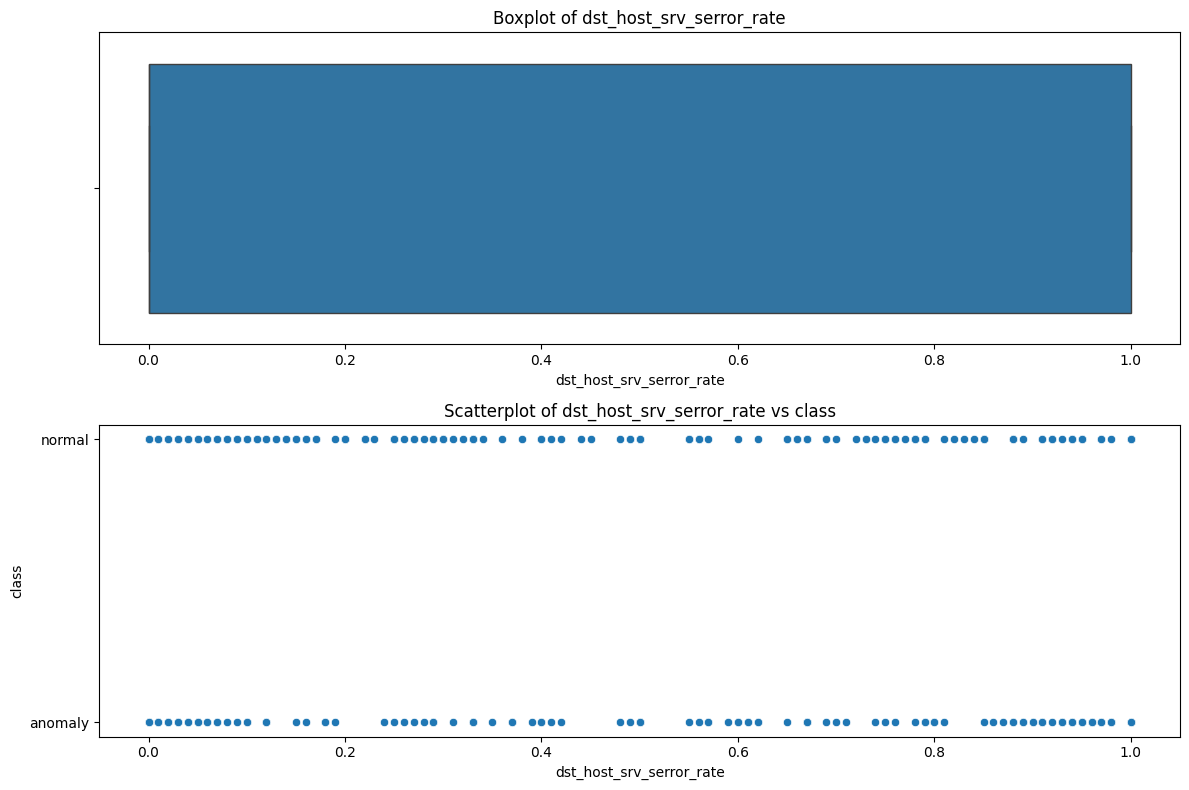

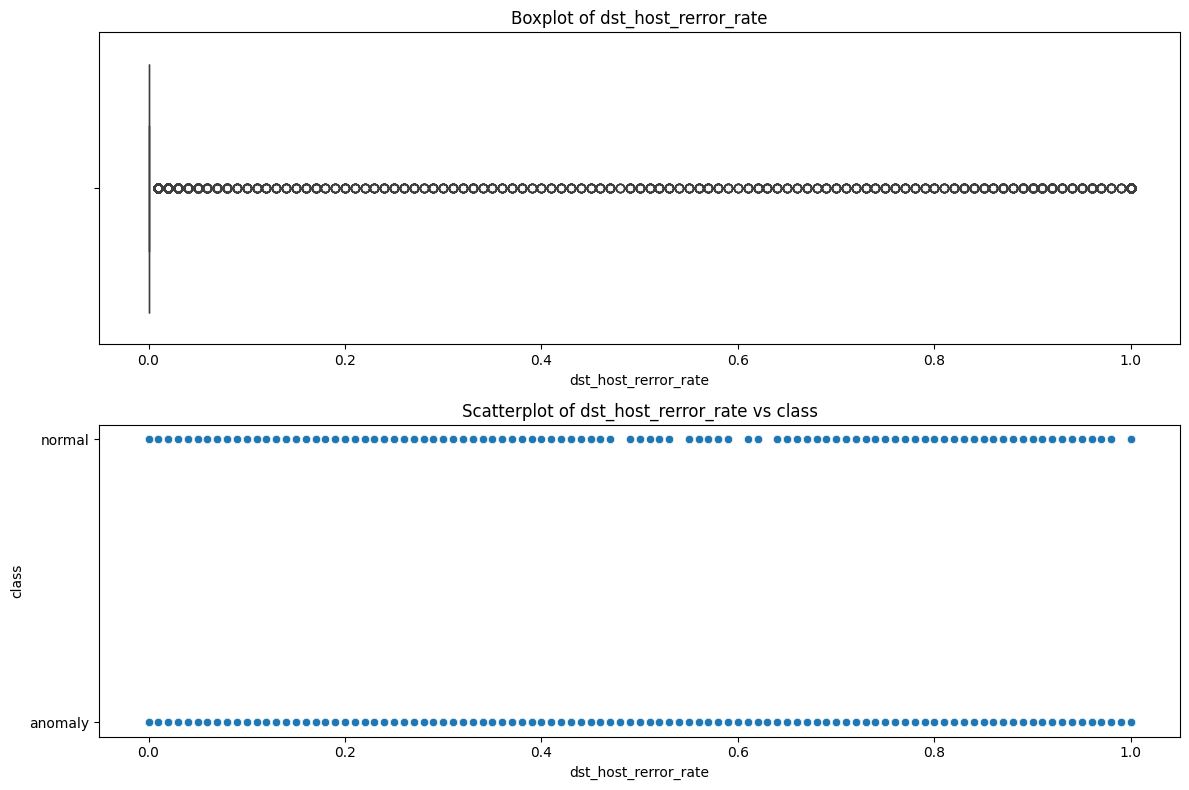

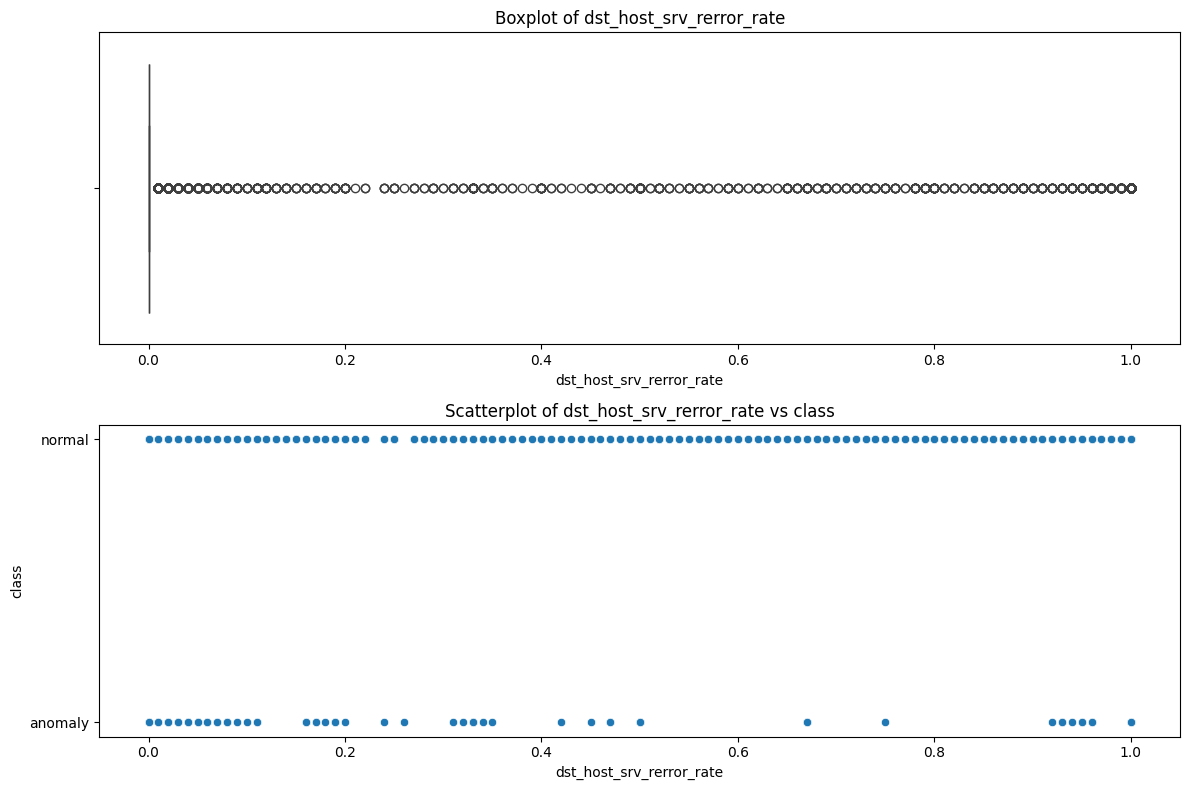

In [ ]:
# Boxplot and scatter plot for each numeric column except 'class'
for col in train:
    if col != 'class' and is_numeric_dtype(train[col]):
        fig, ax = plt.subplots(2, 1, figsize=(12, 8))
        # Boxplot
        sns.boxplot(x=train[col], ax=ax[0])
        ax[0].set_title(f'Boxplot of {col}')

        # Scatter plot with 'class'
        sns.scatterplot(data=train, x=train[col], y=train['class'], ax=ax[1])
        ax[1].set_title(f'Scatterplot of {col} vs class')

        plt.tight_layout()
        plt.show()

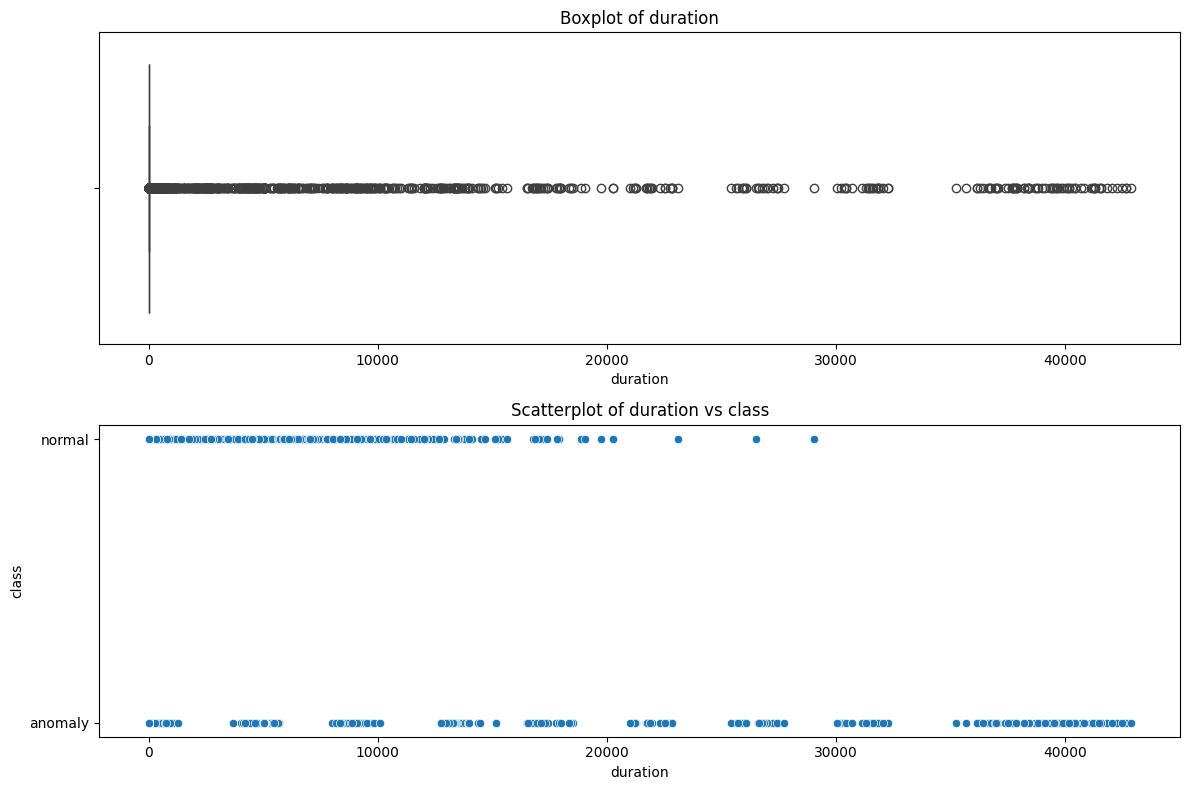

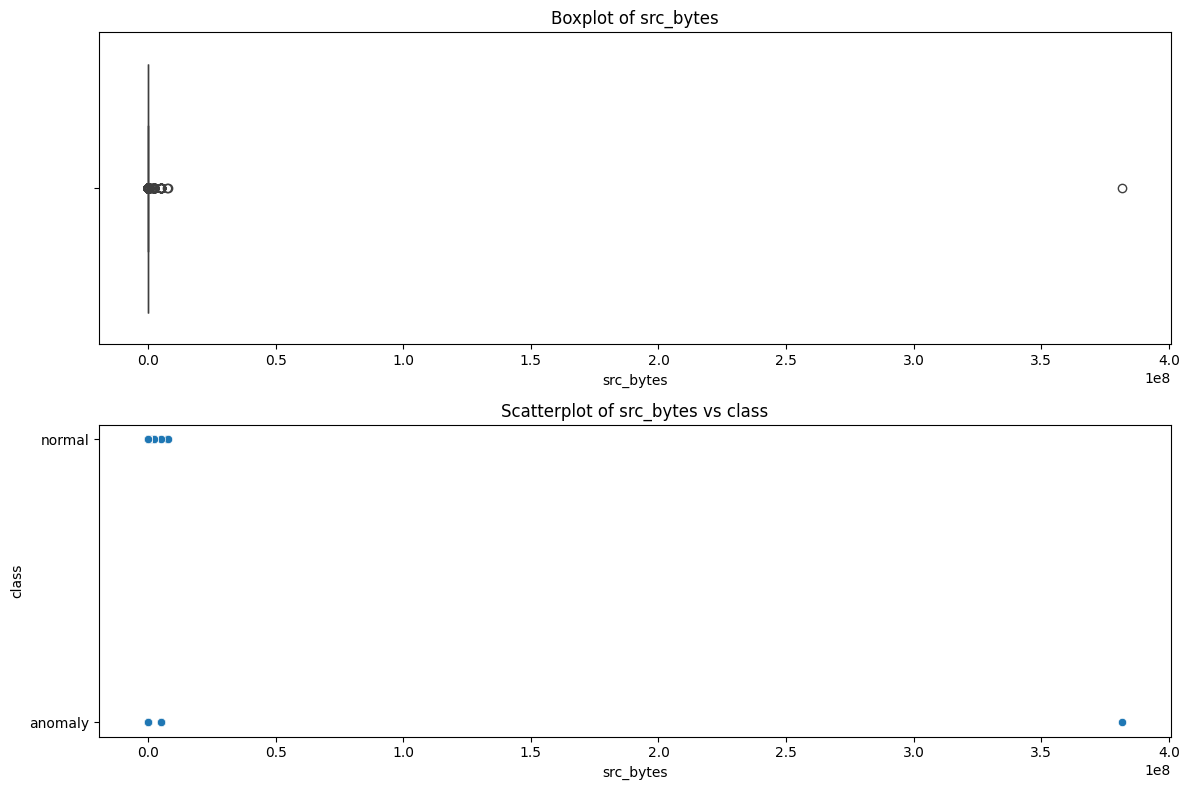

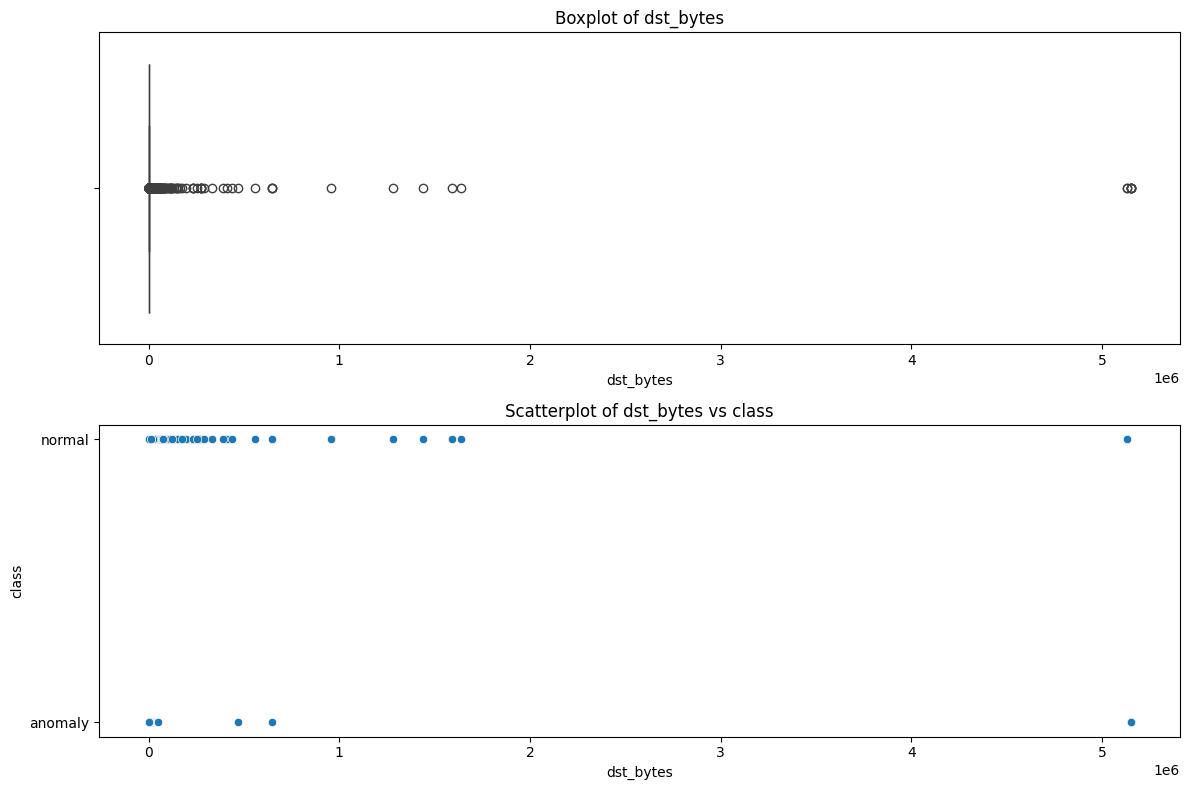

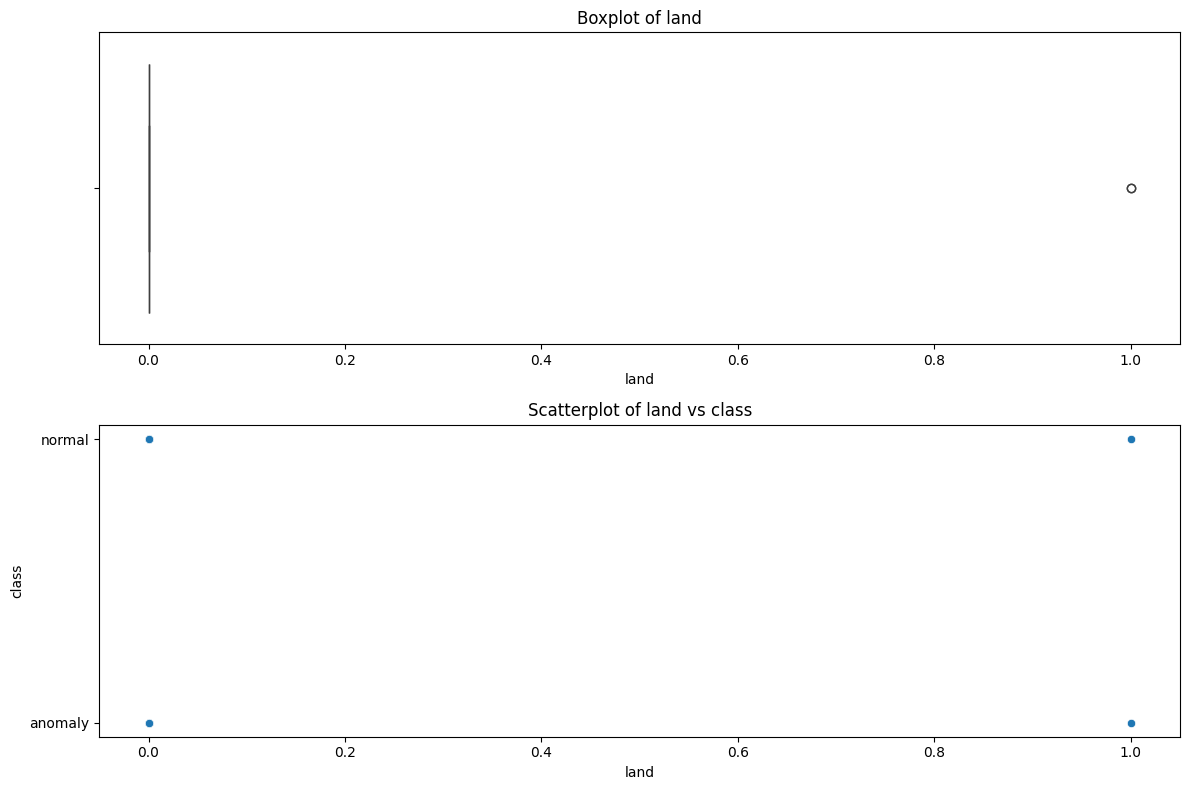

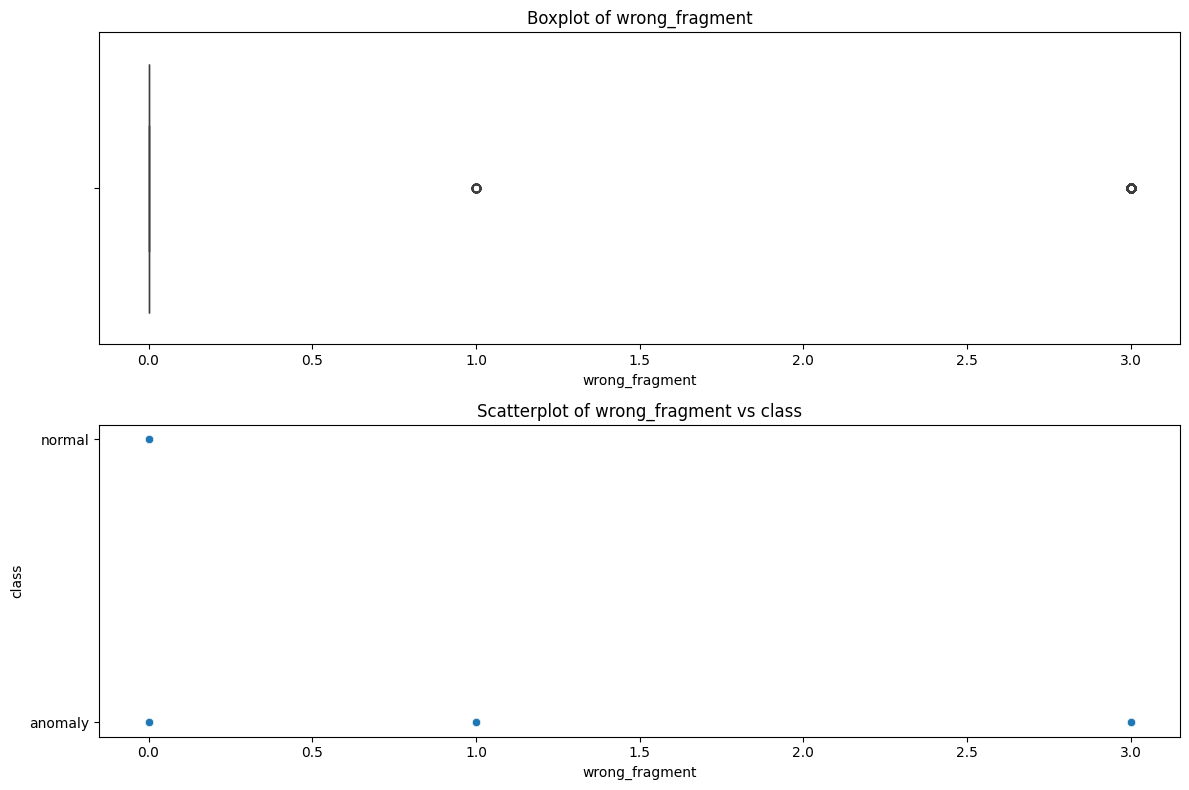

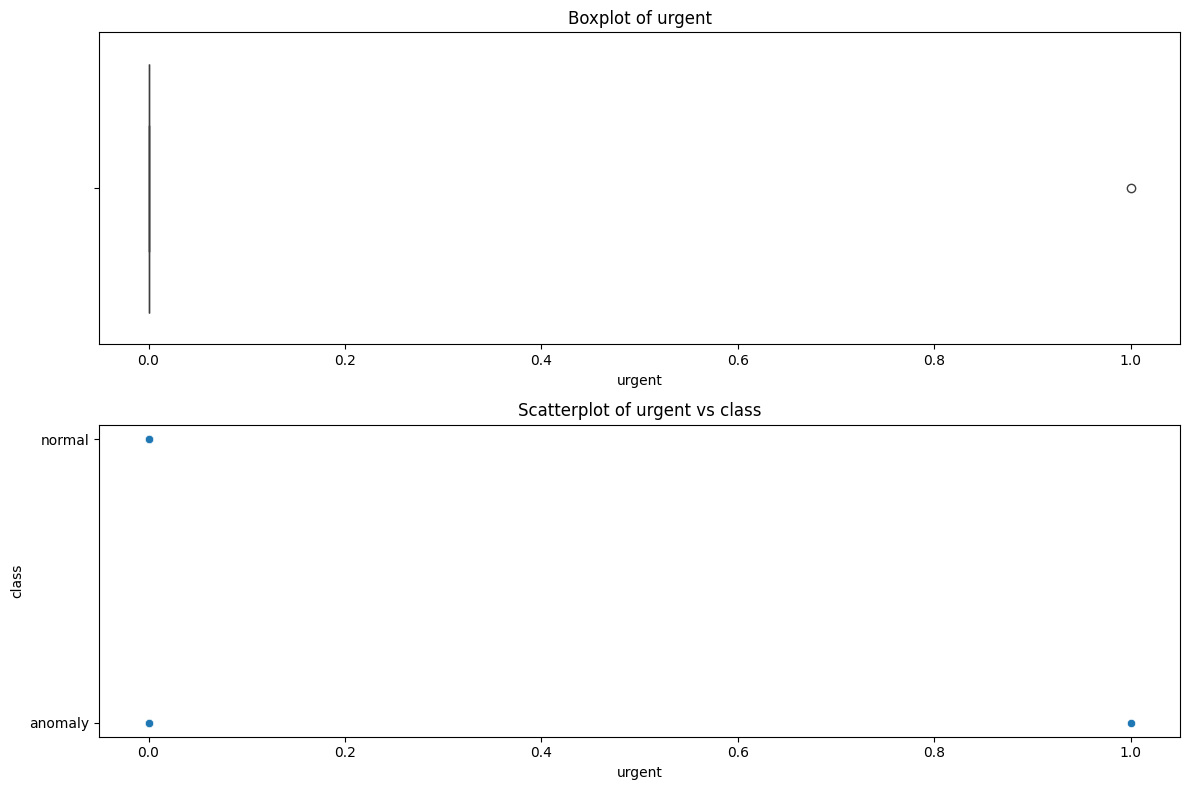

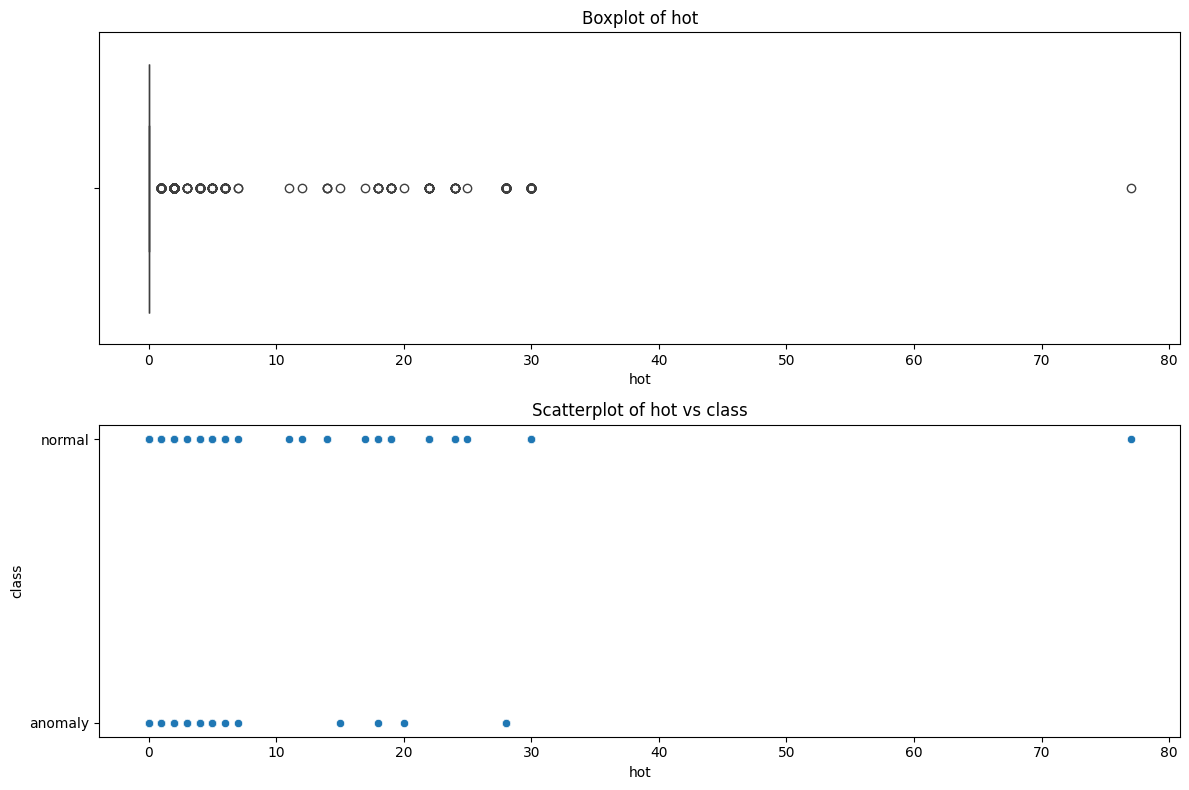

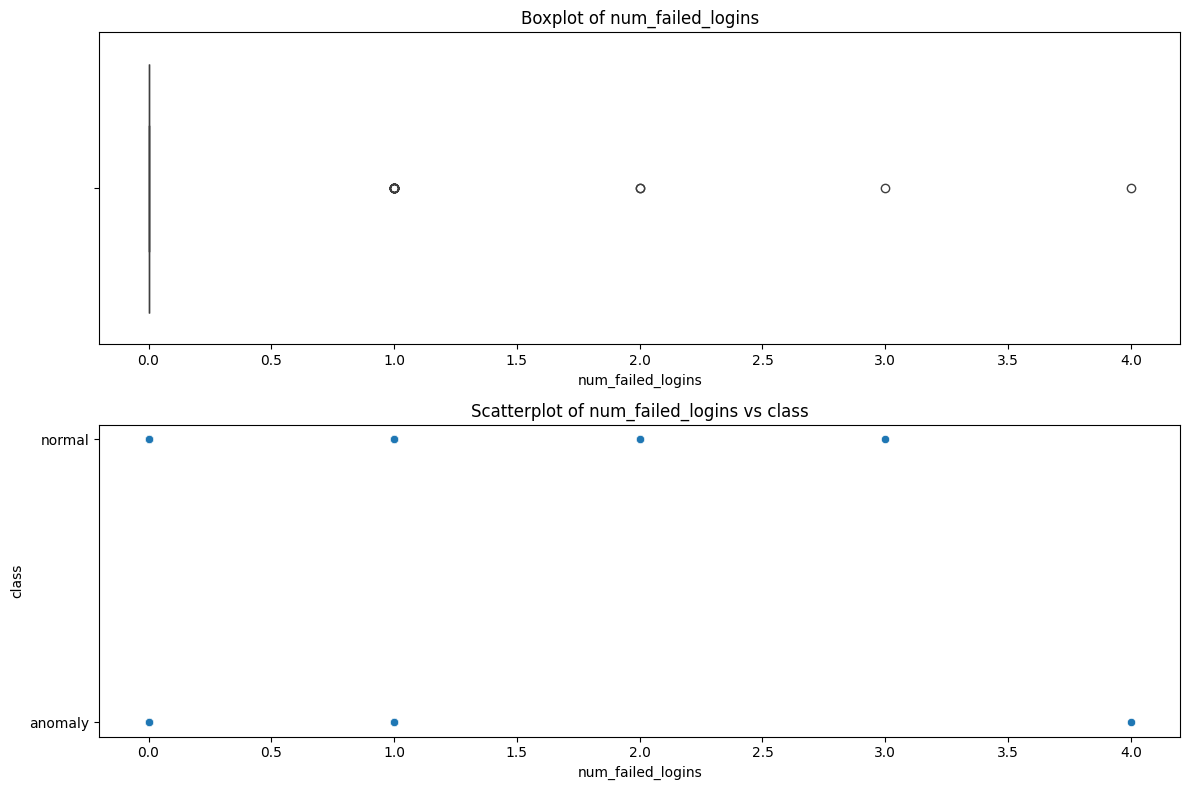

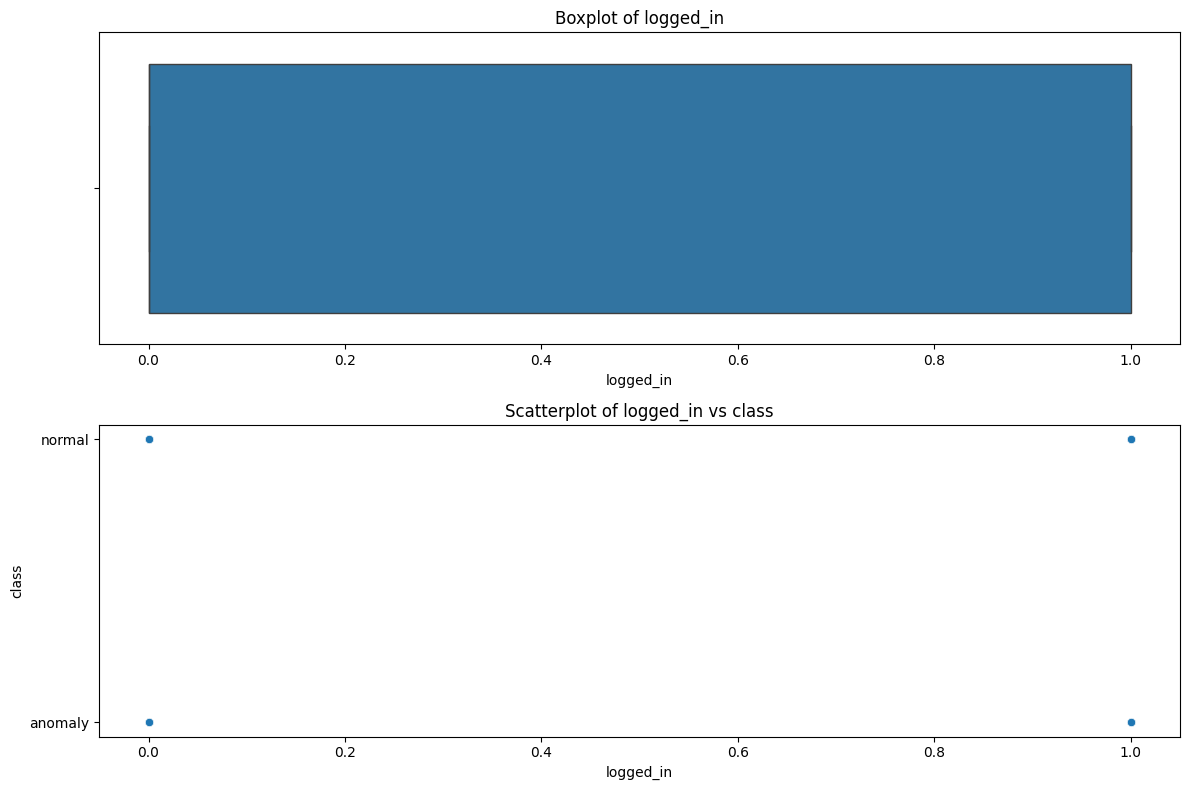

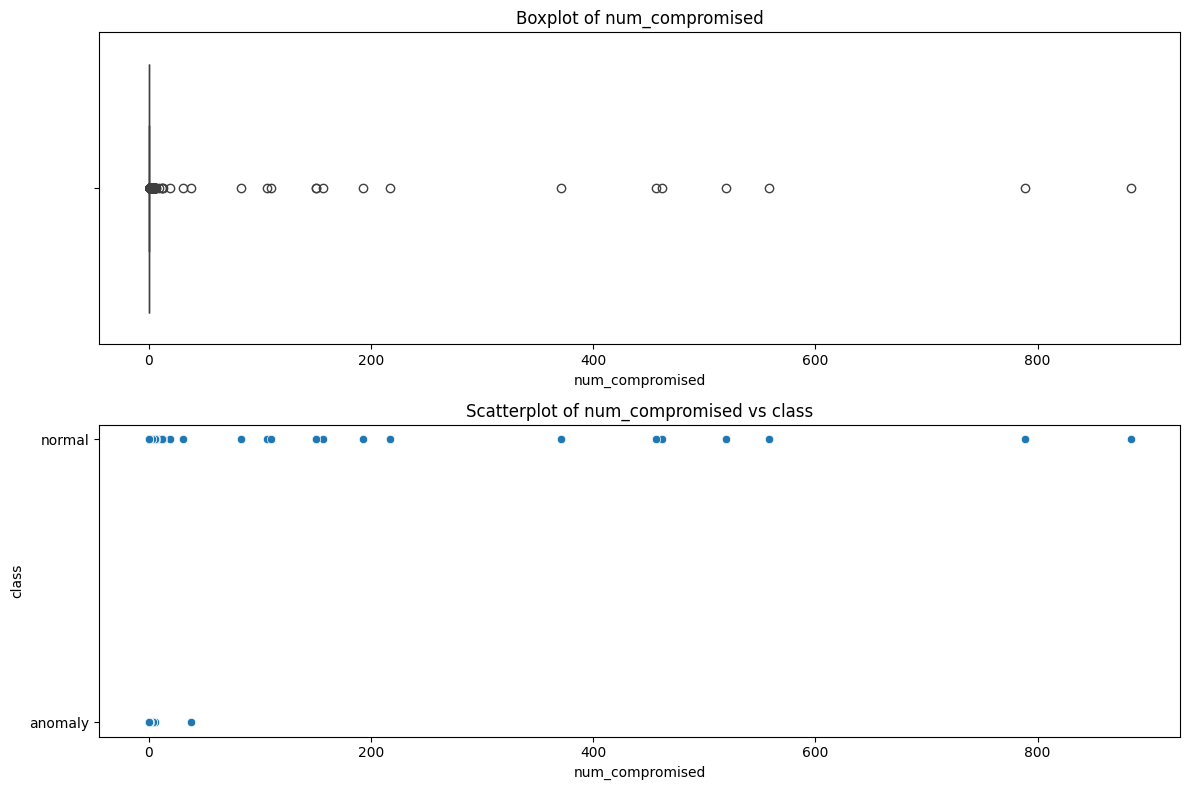

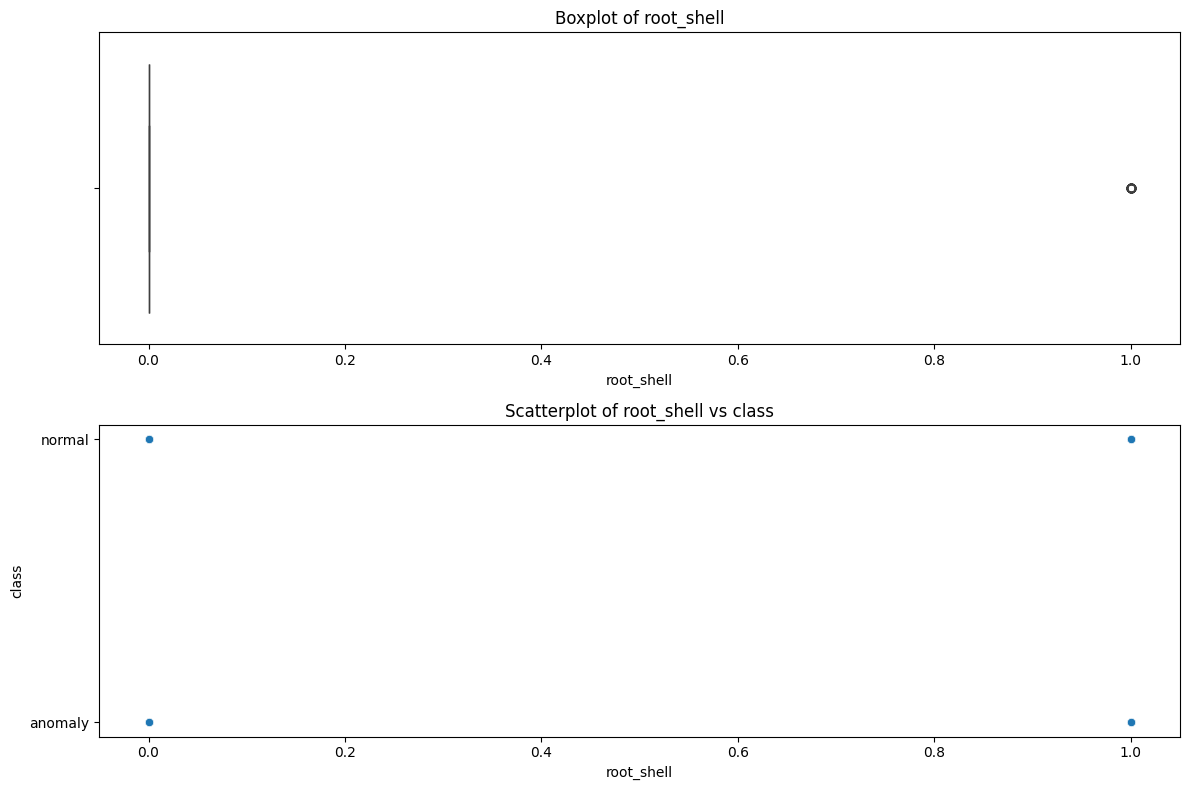

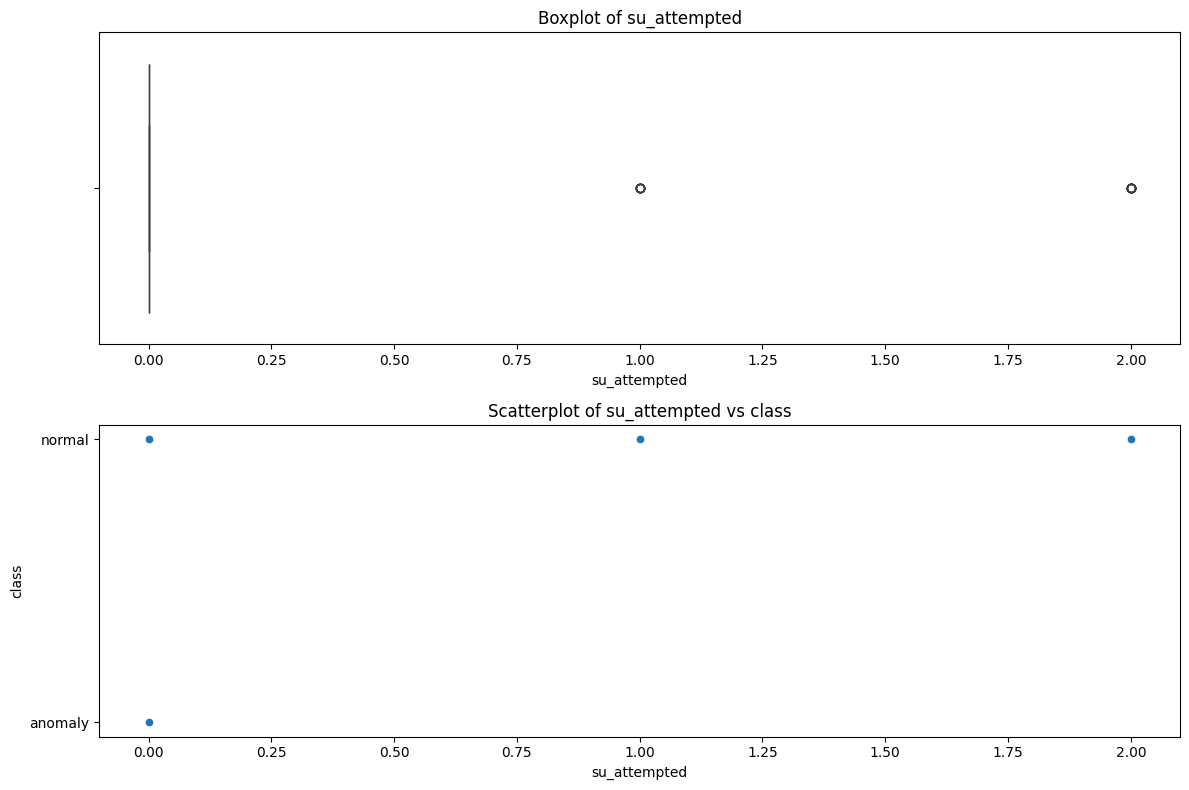

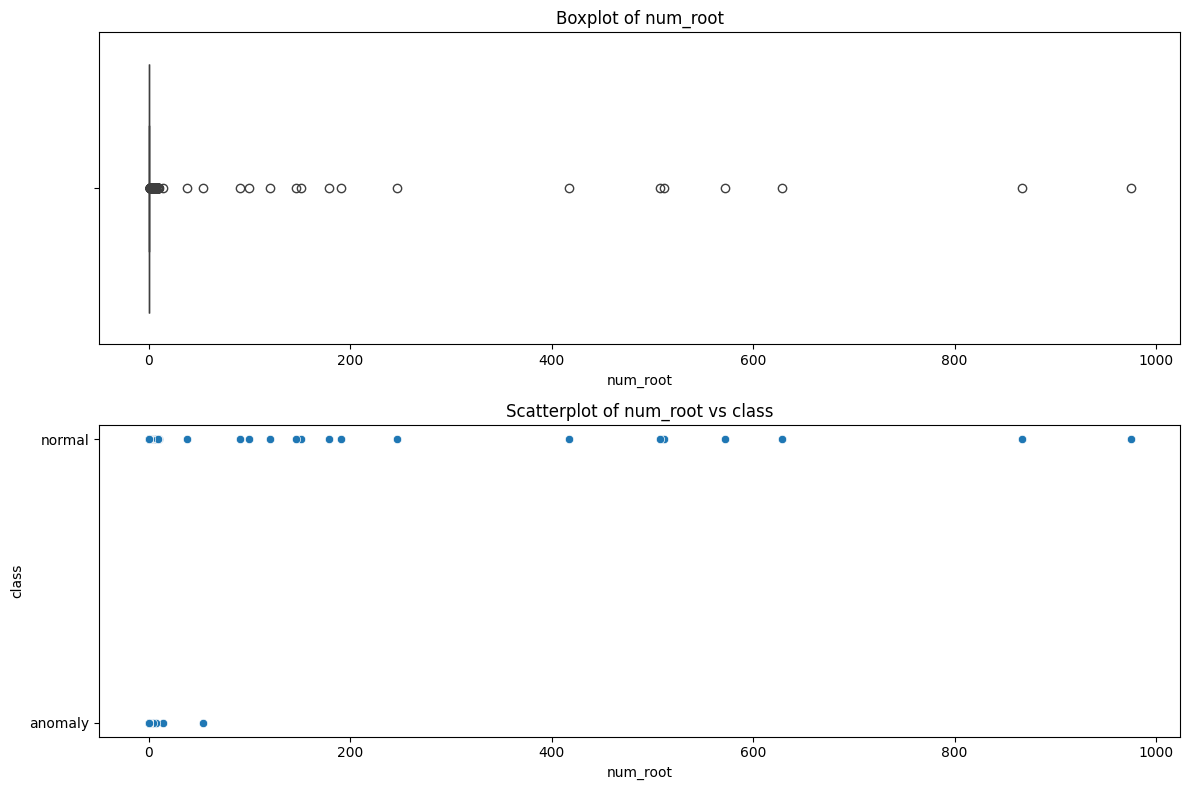

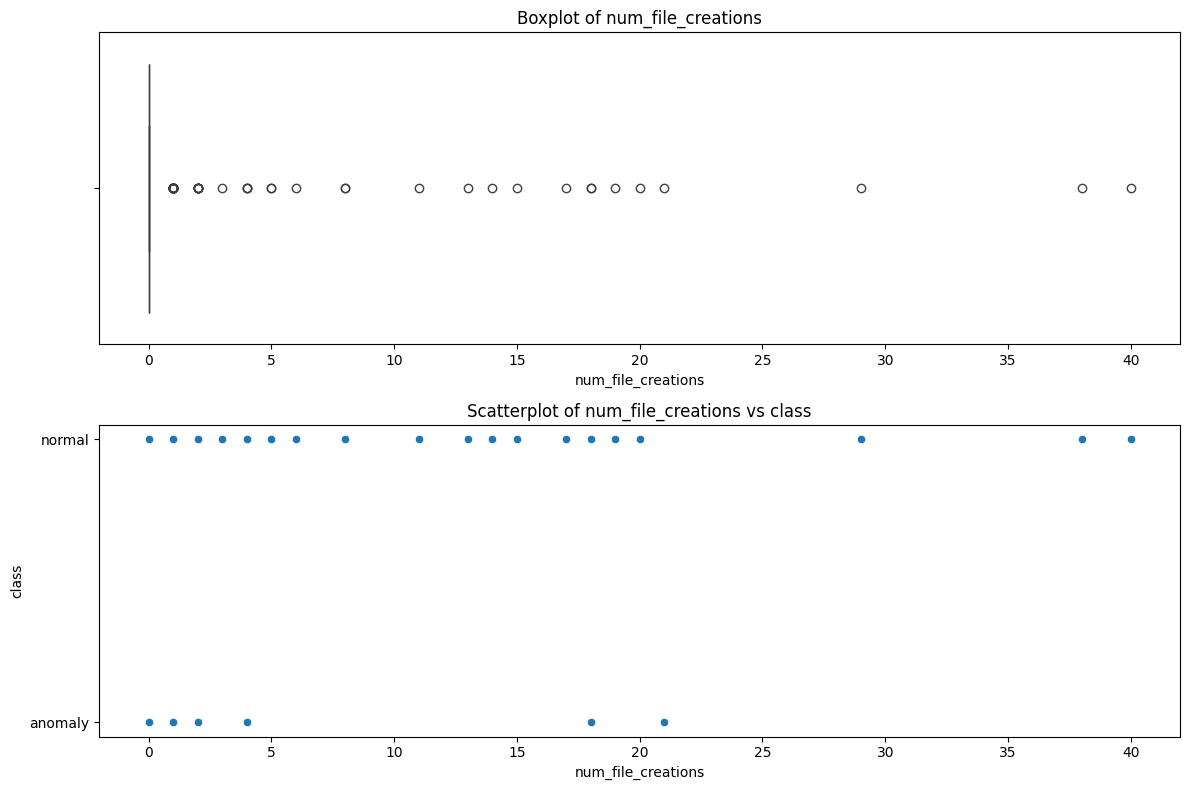

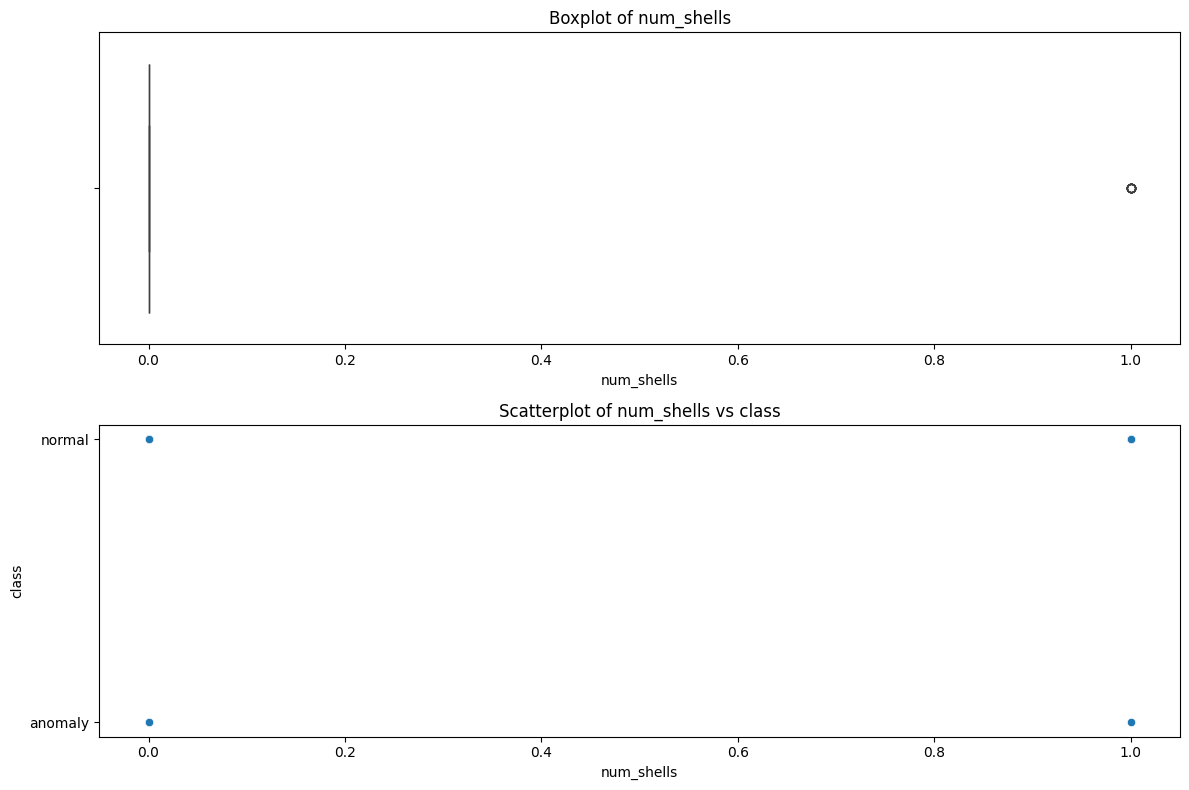

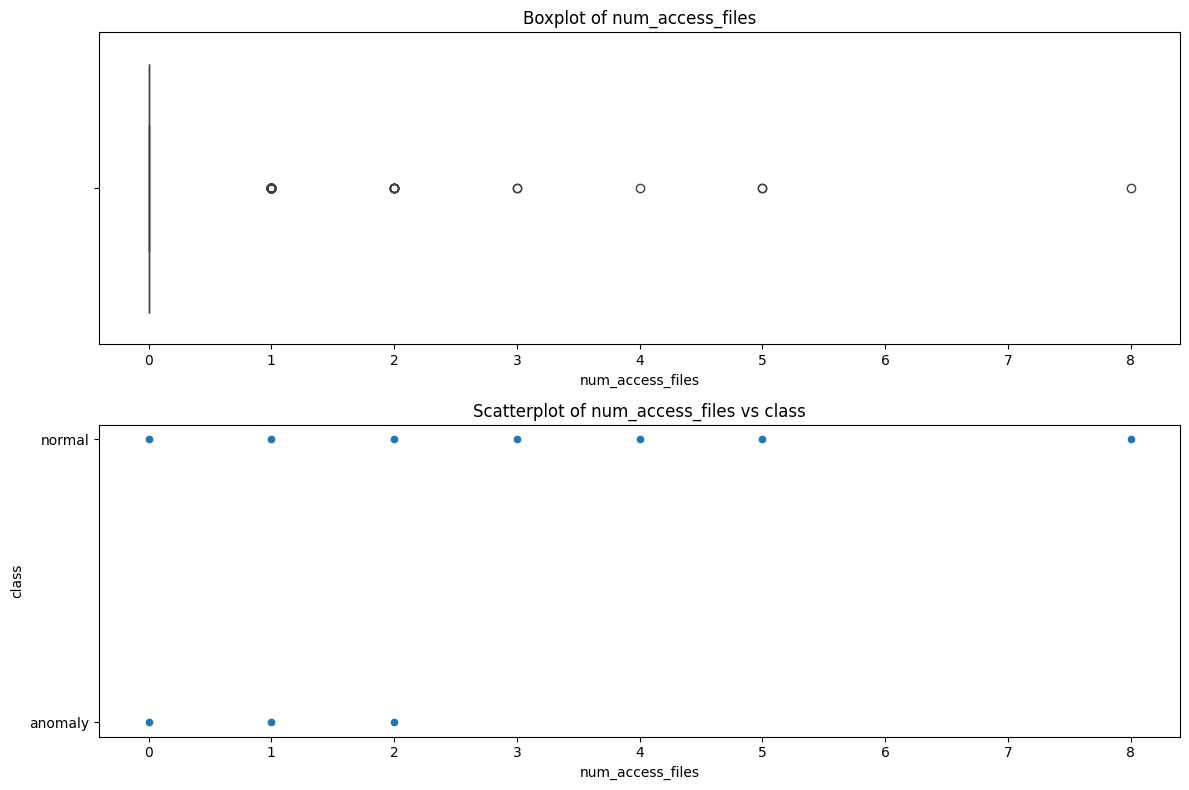

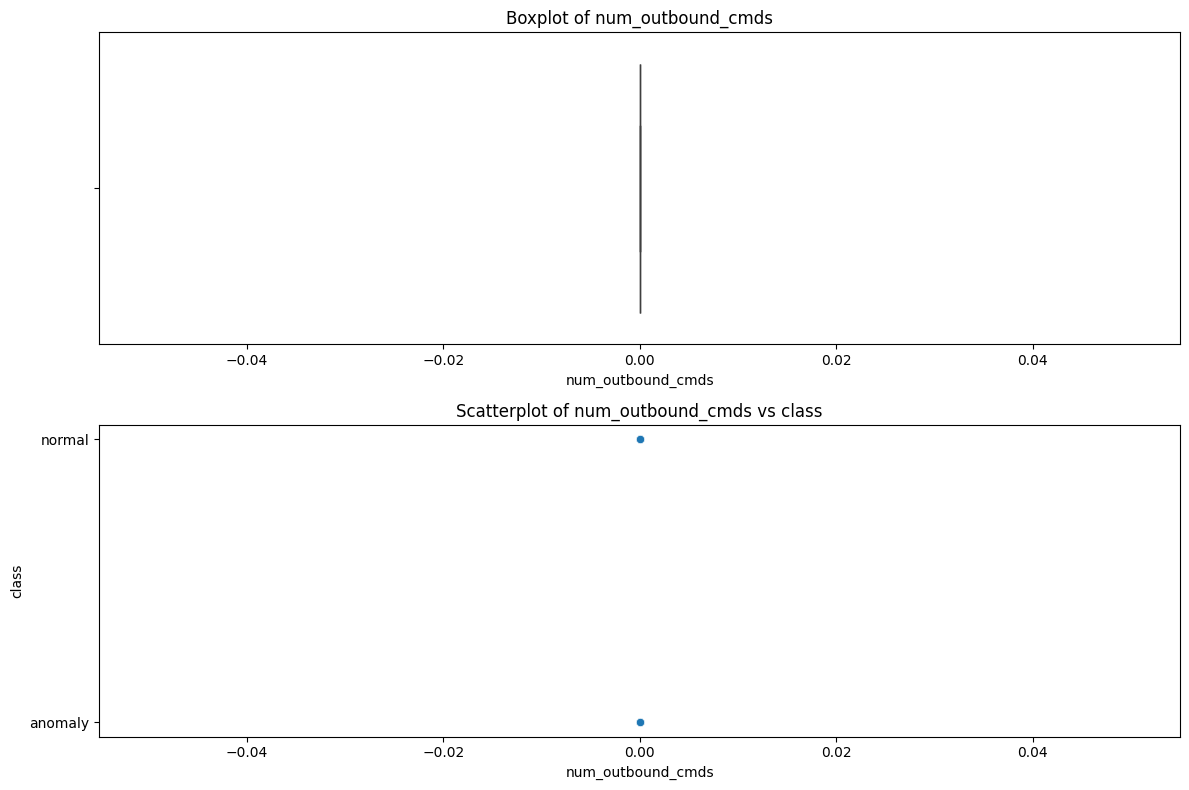

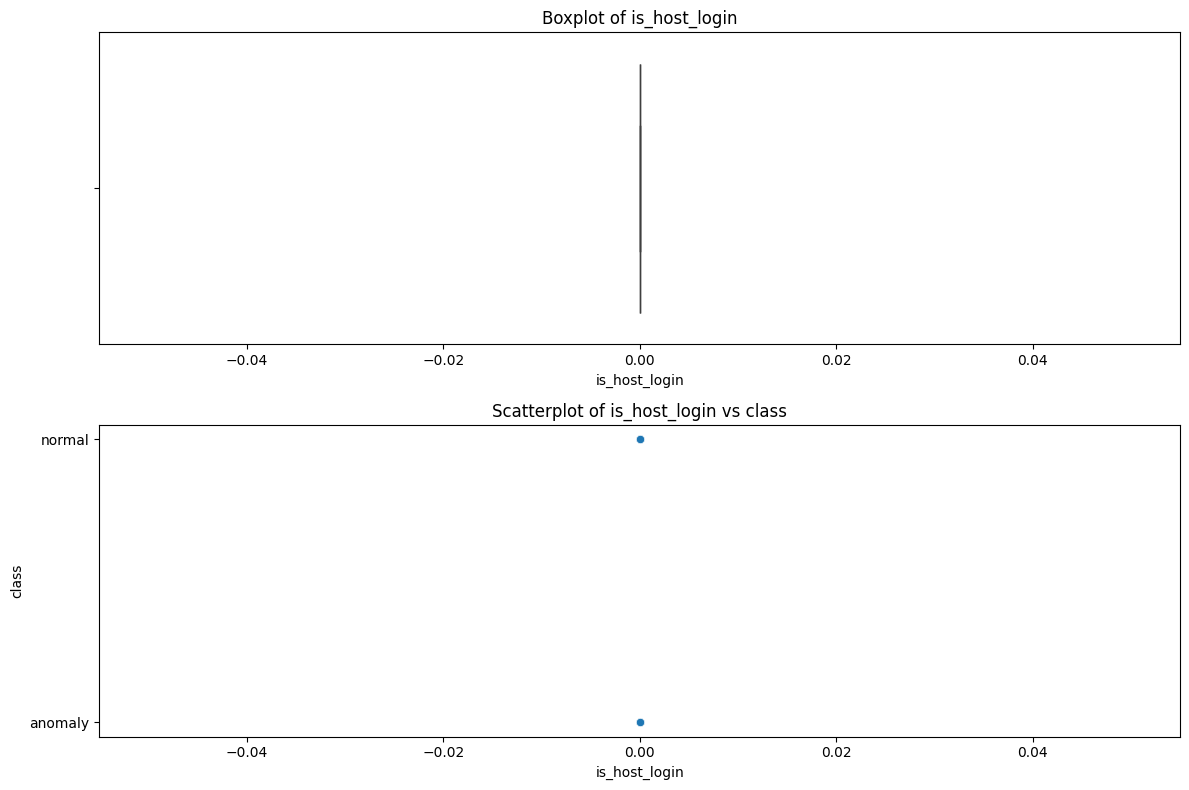

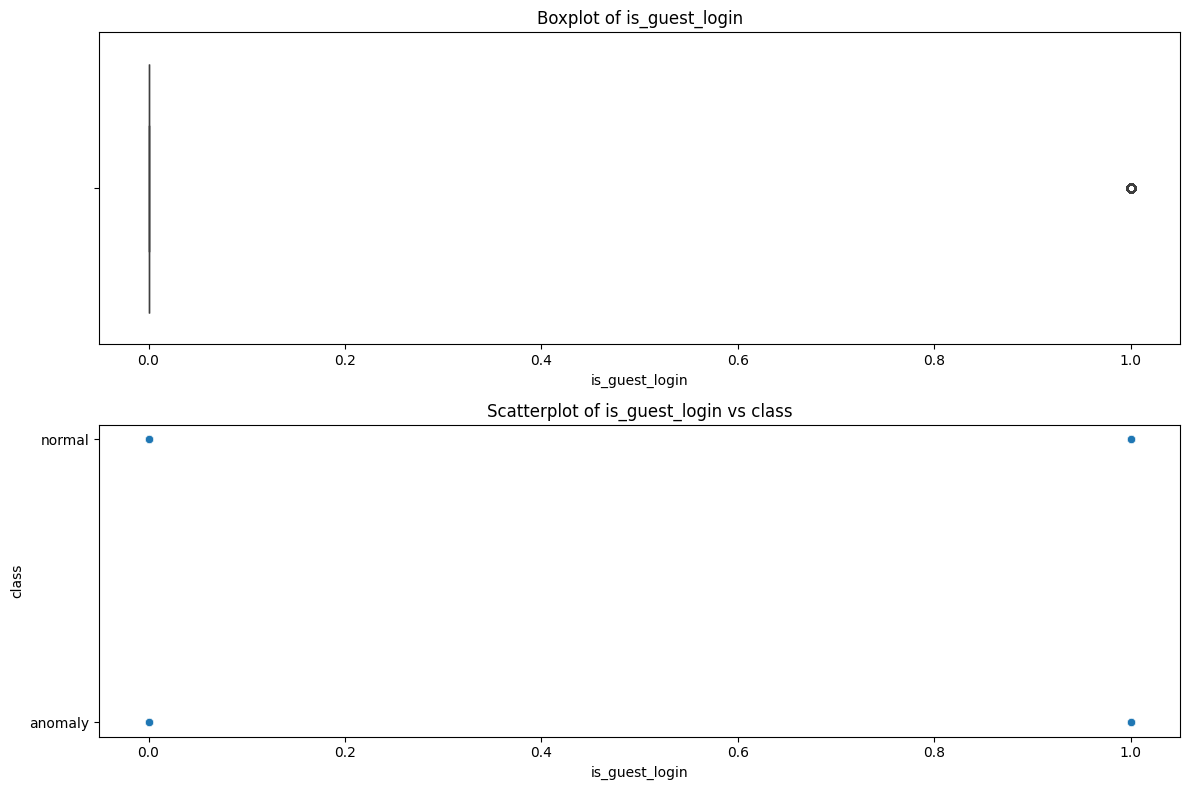

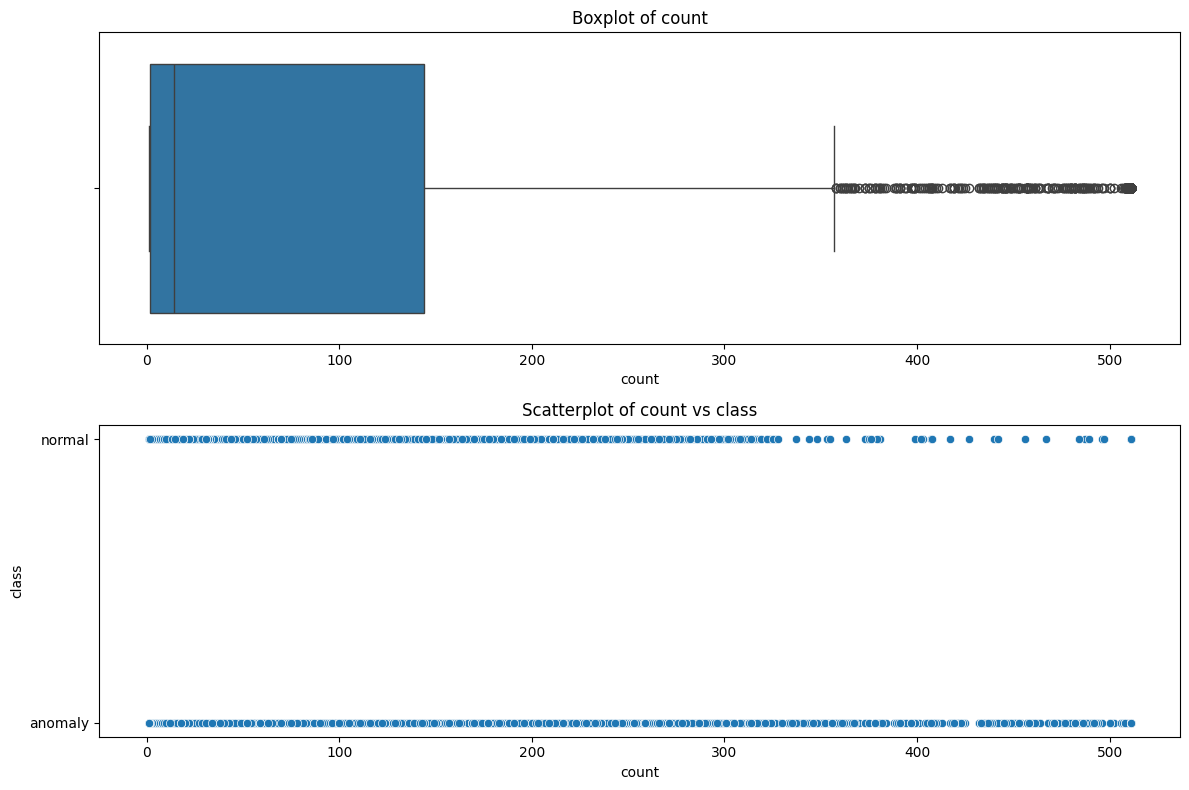

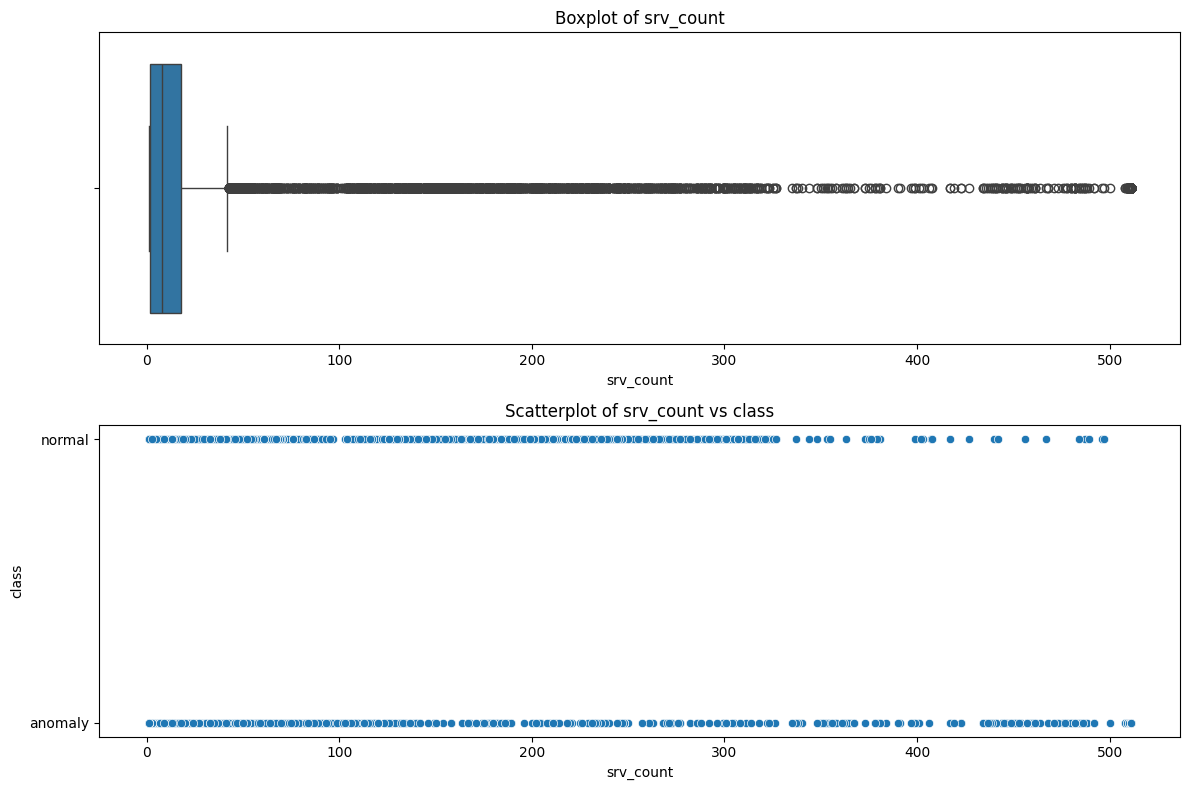

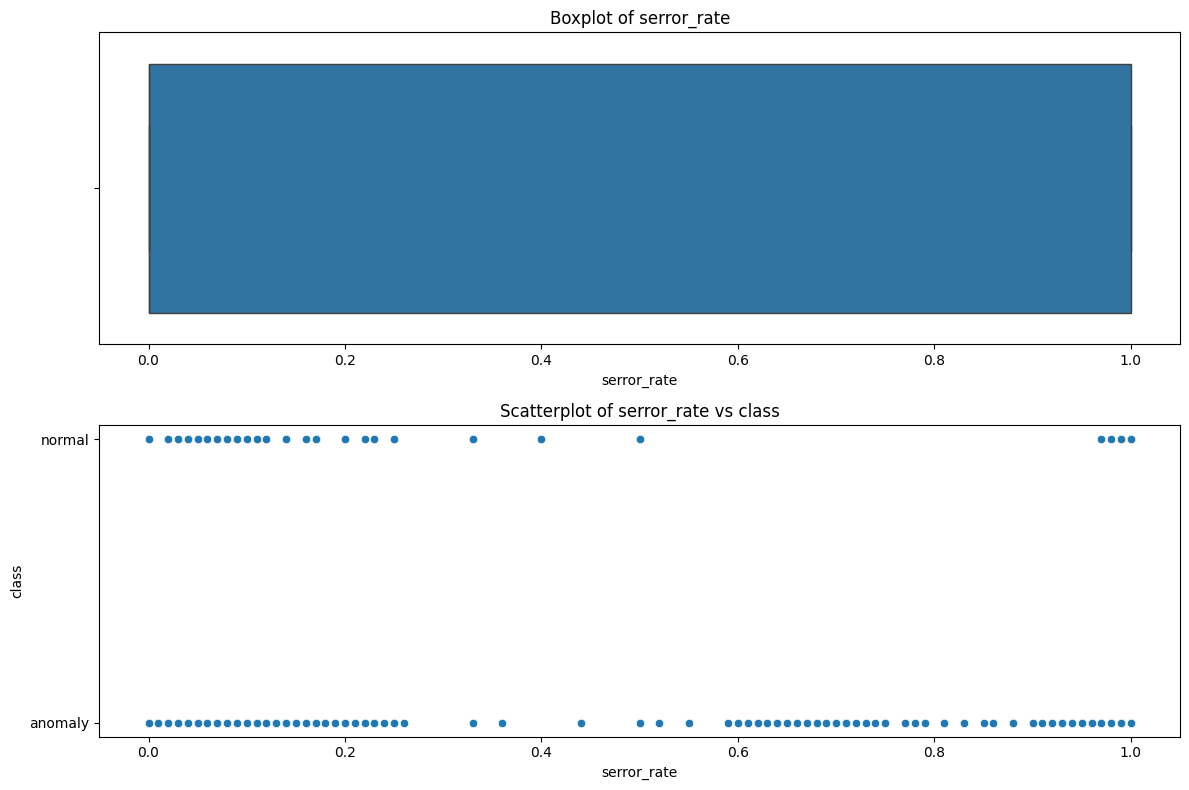

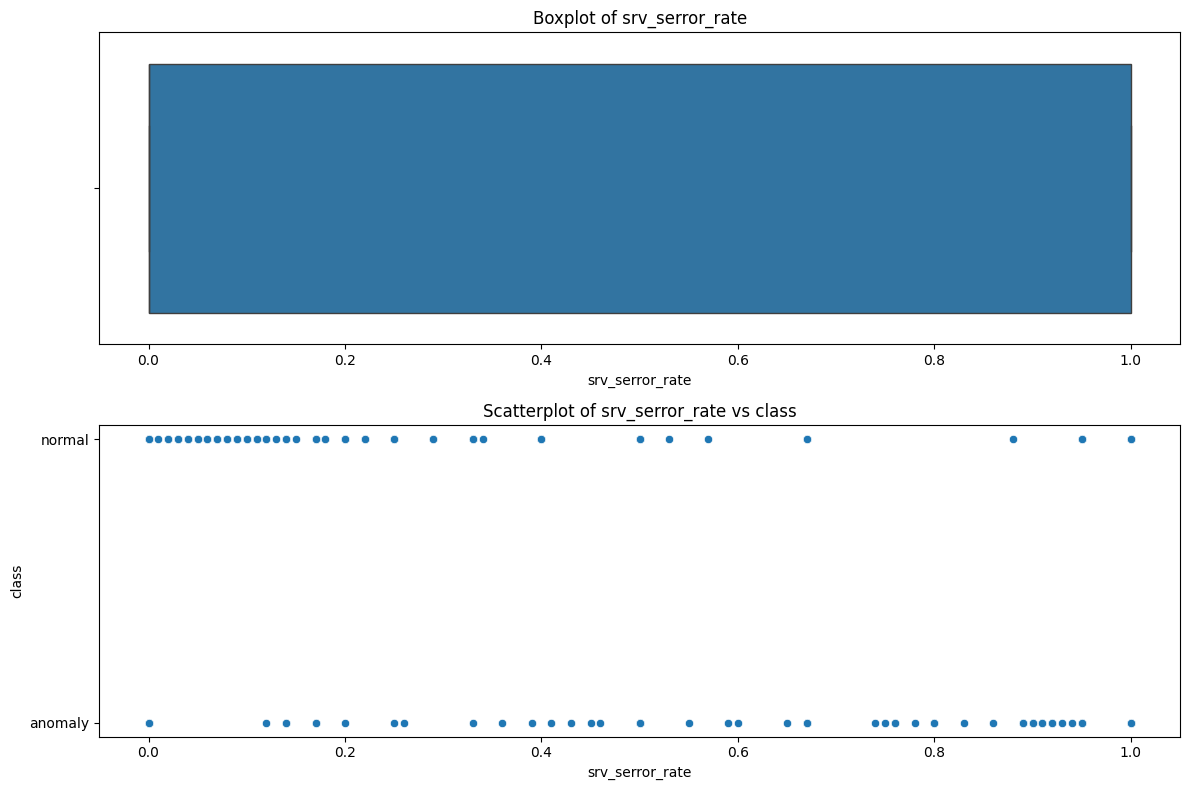

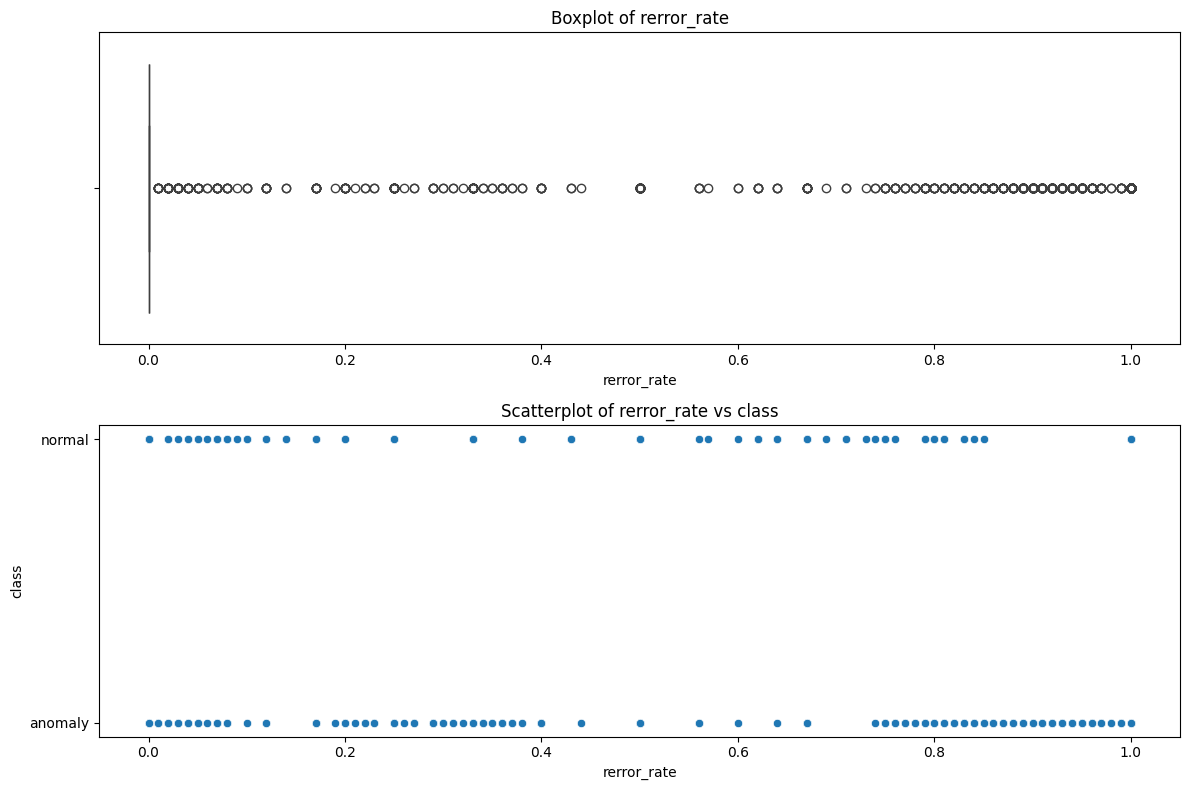

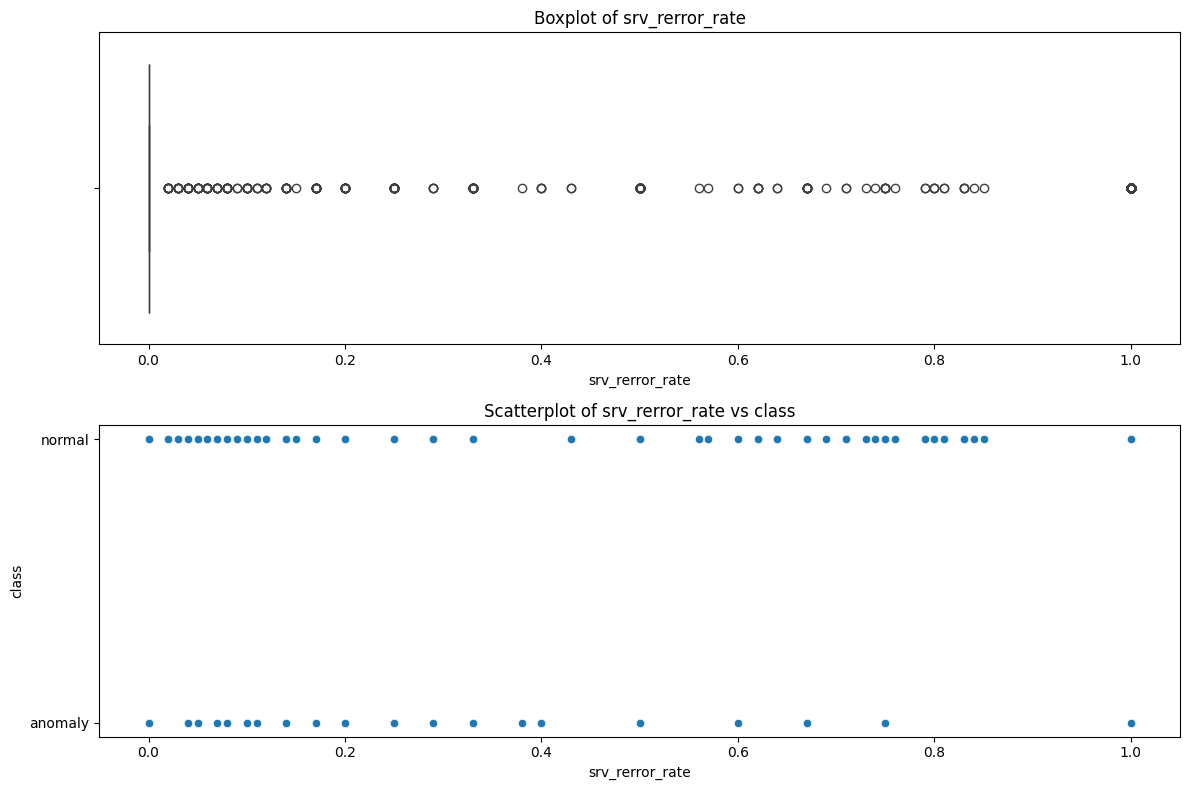

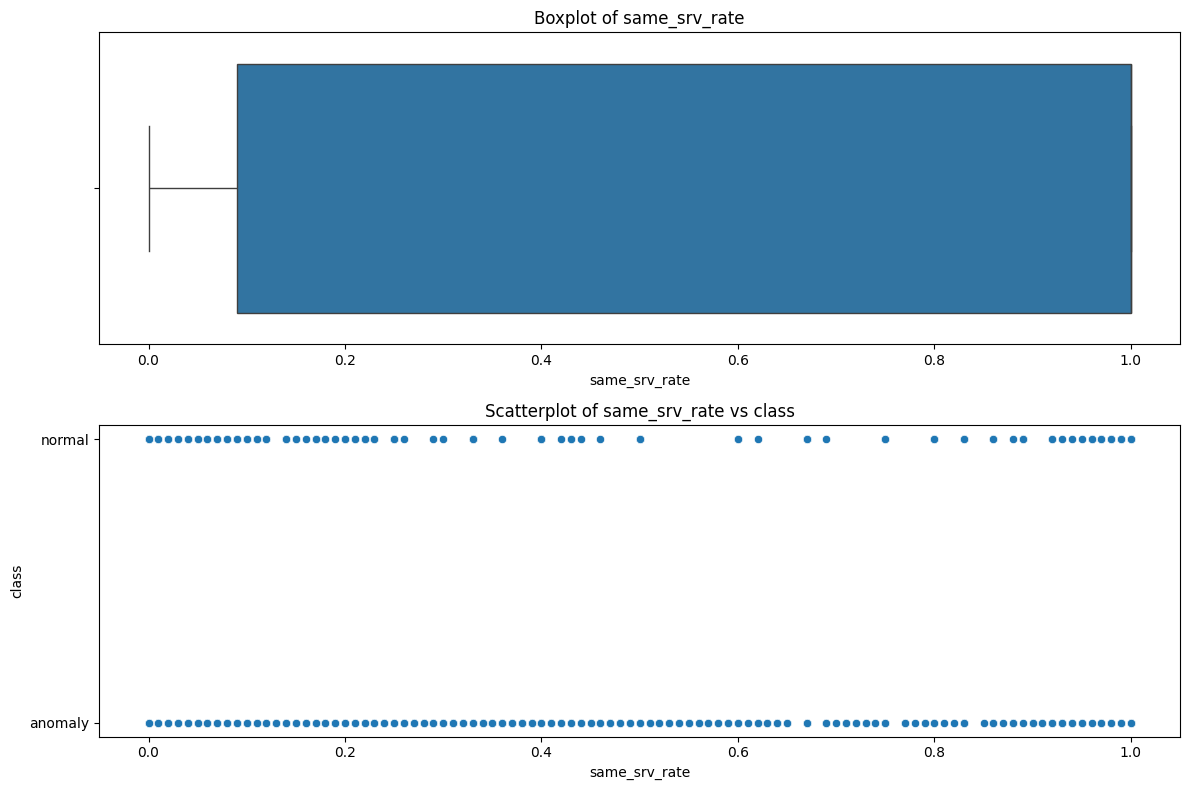

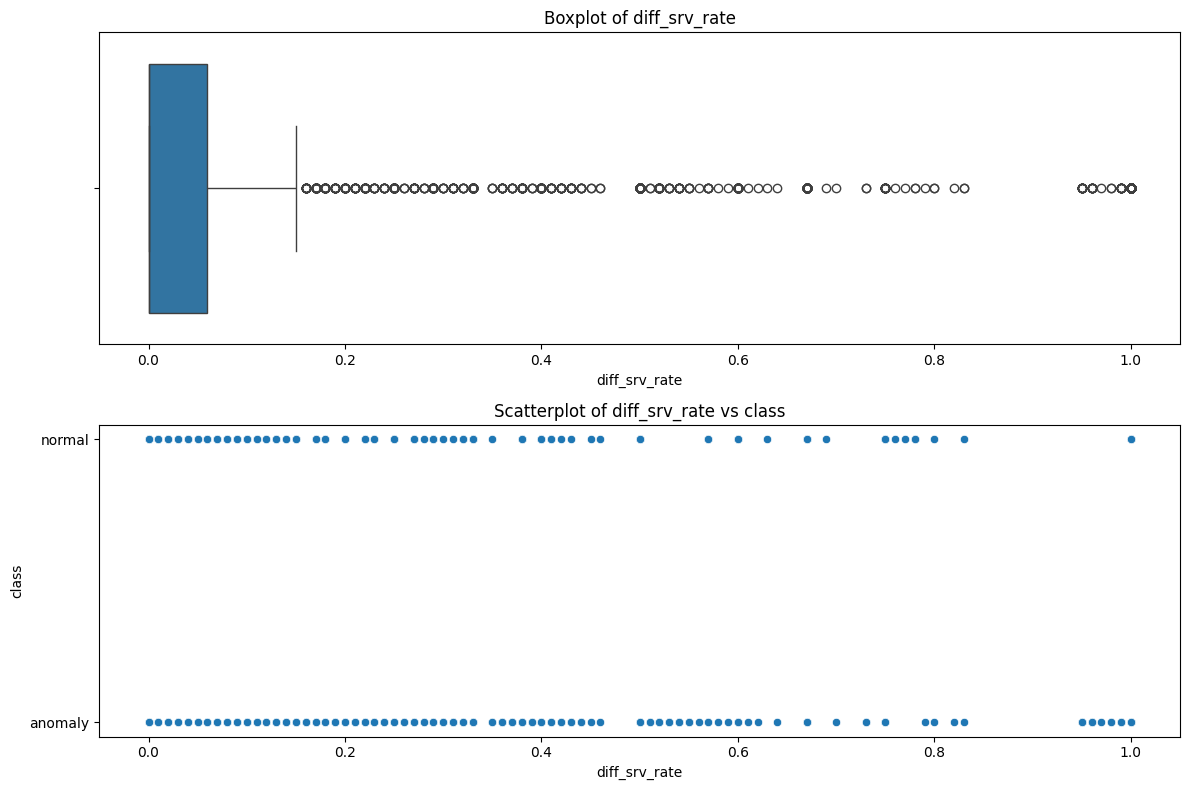

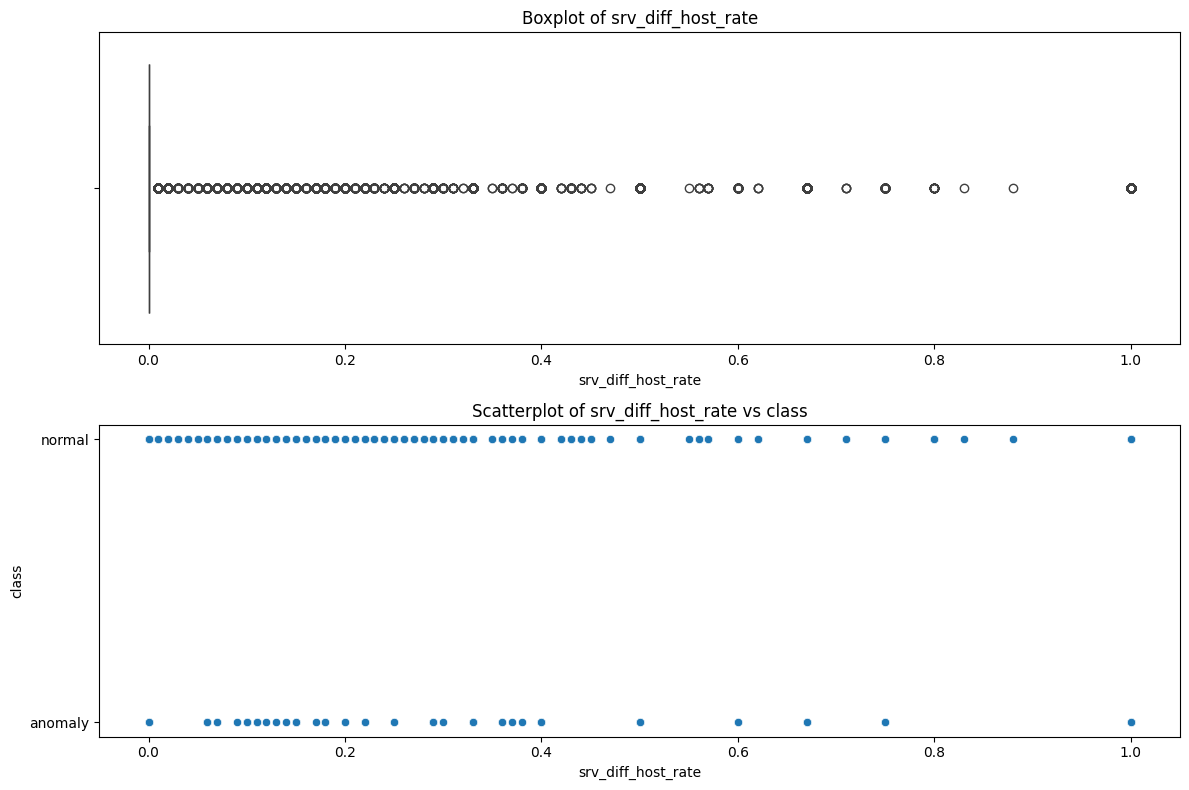

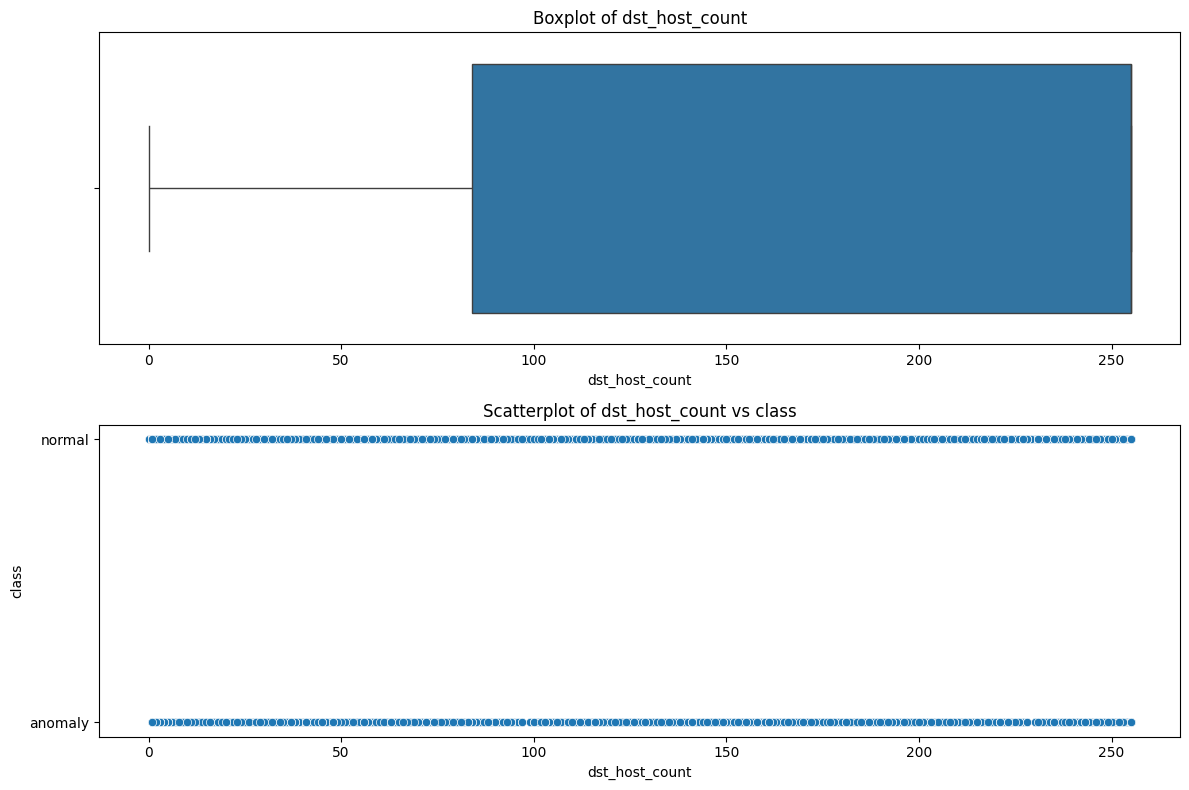

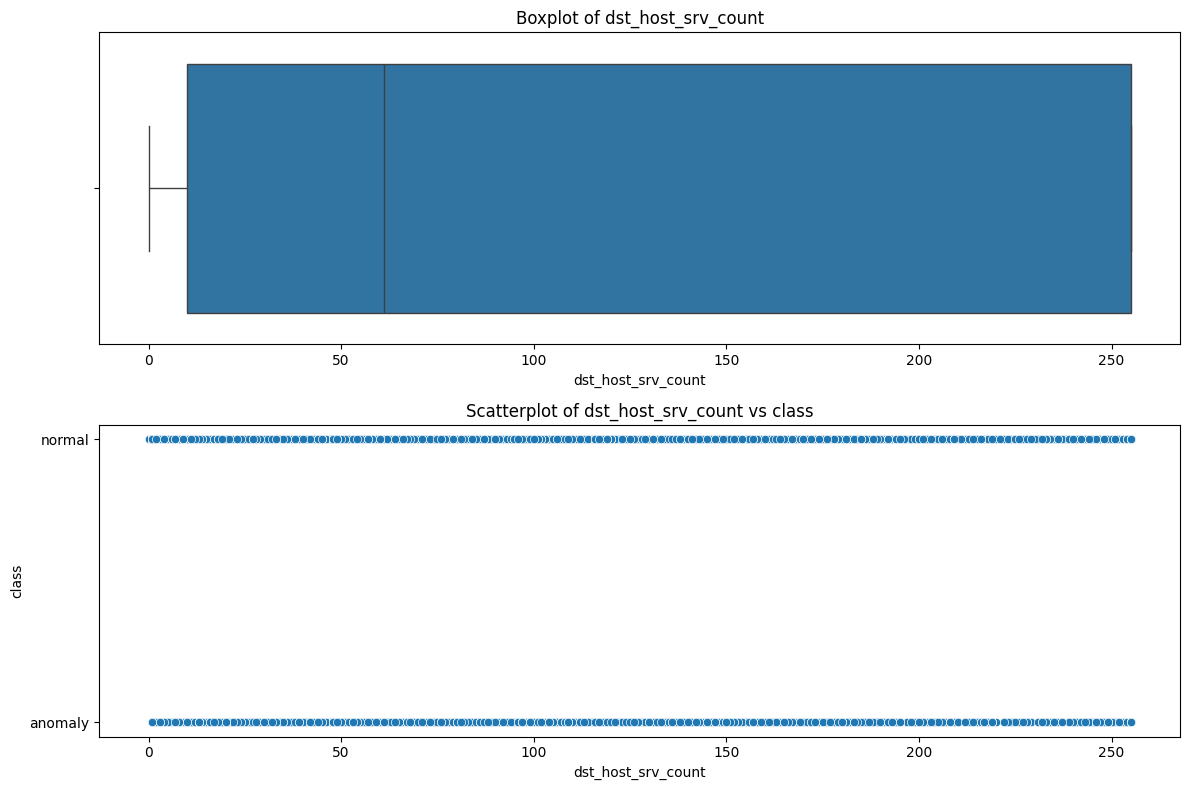

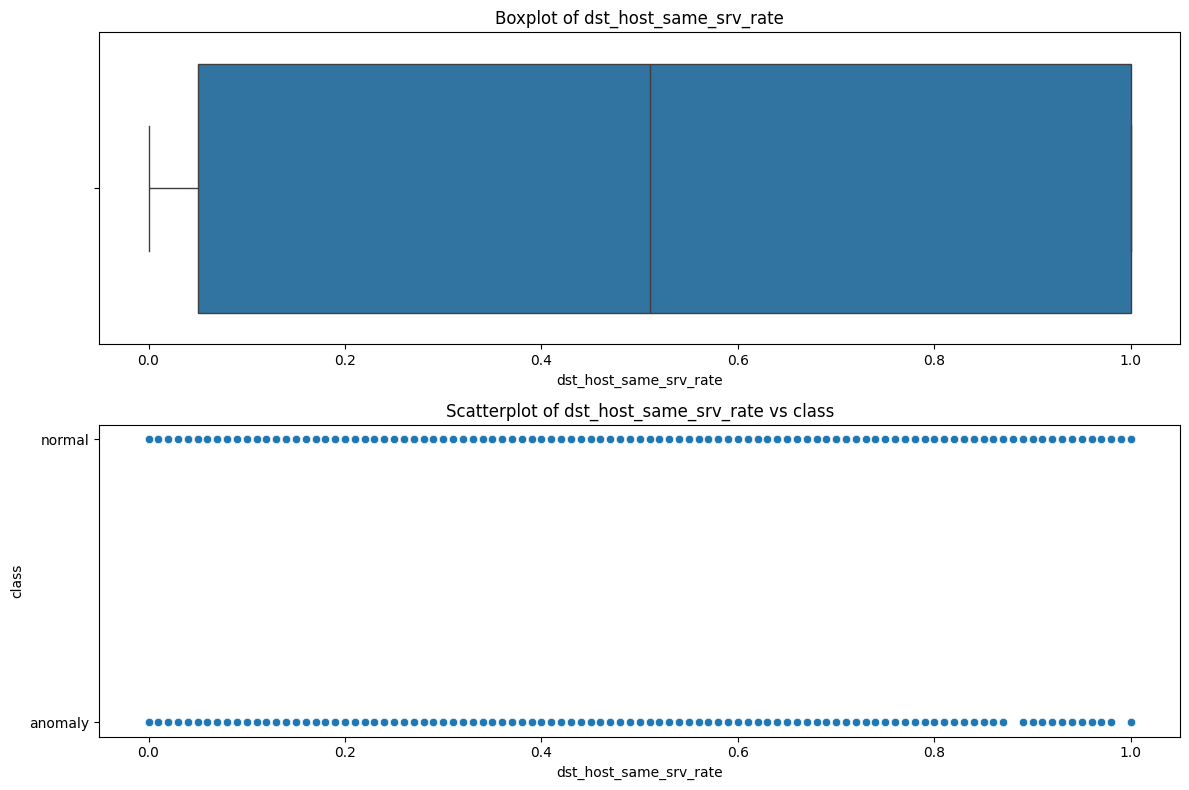

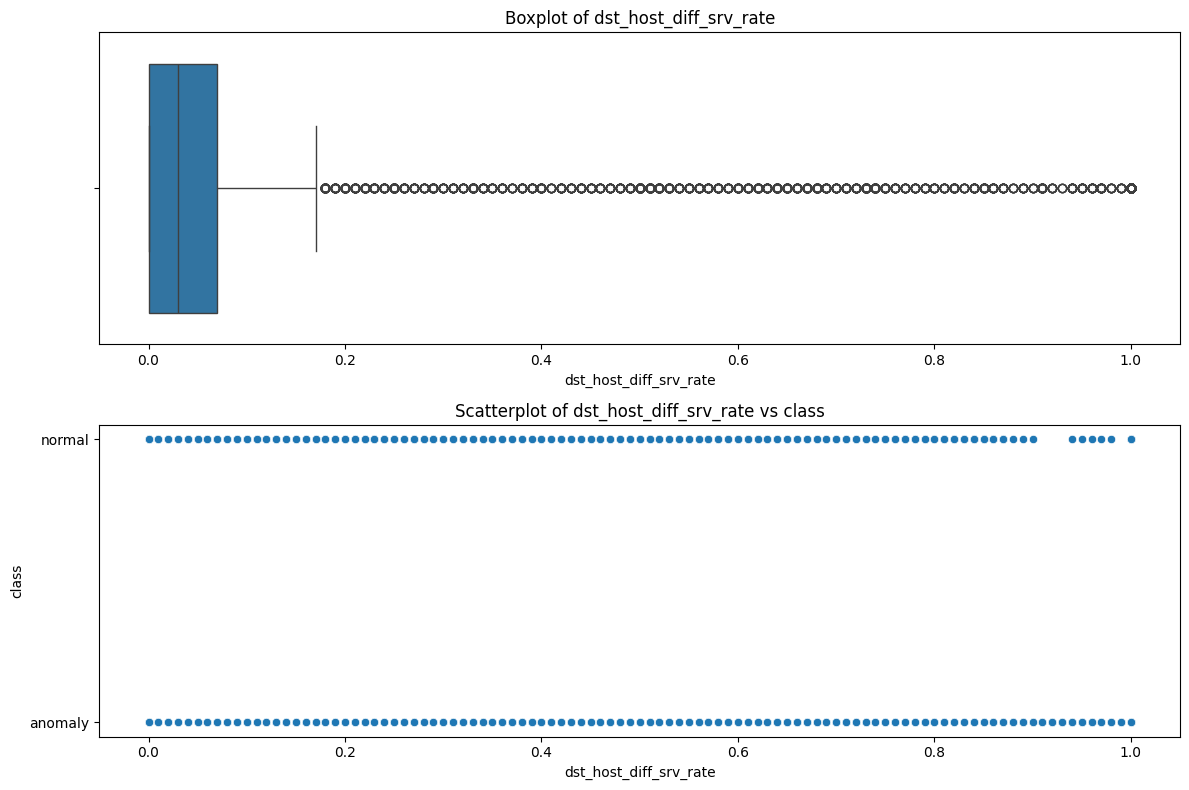

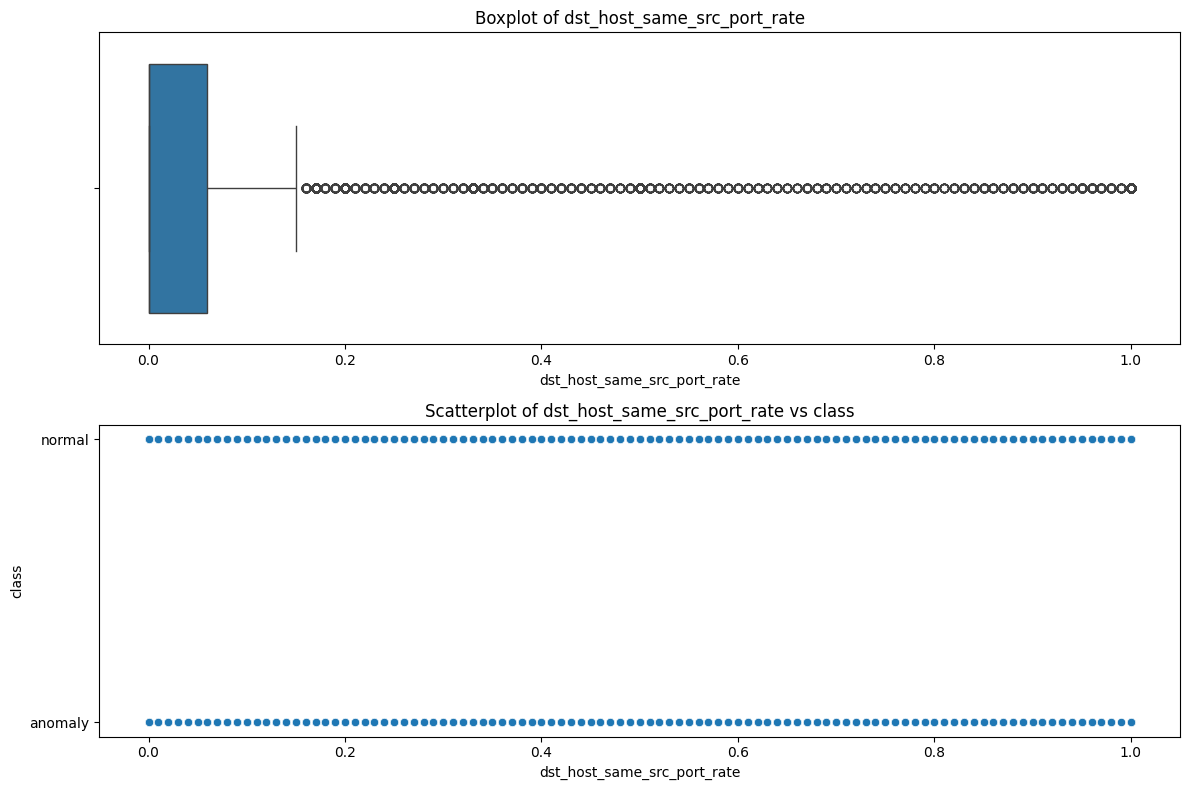

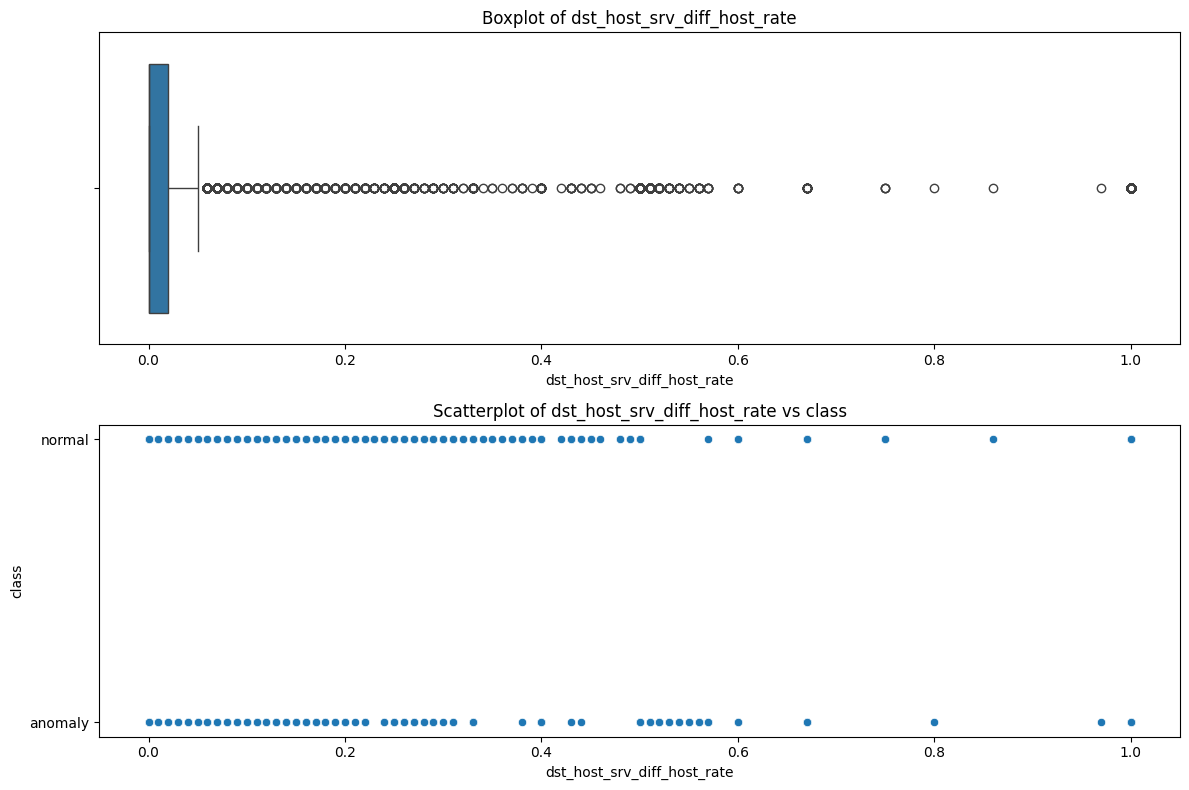

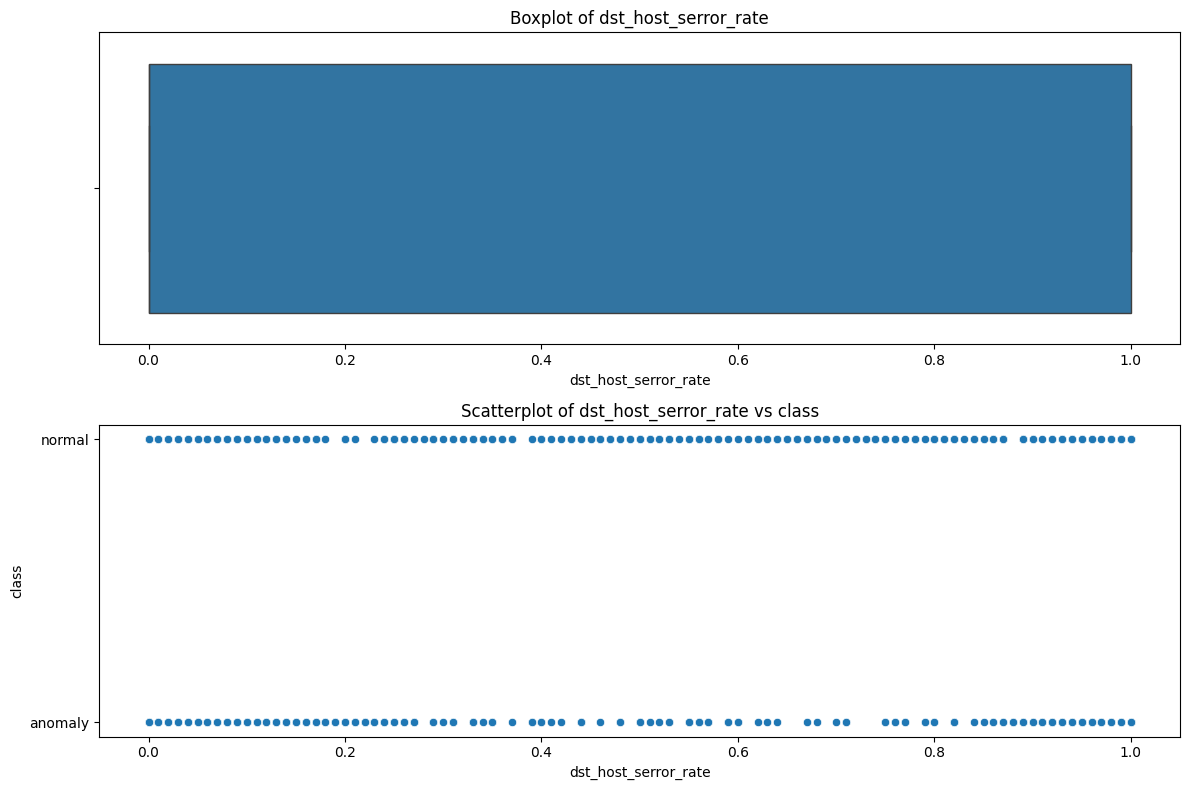

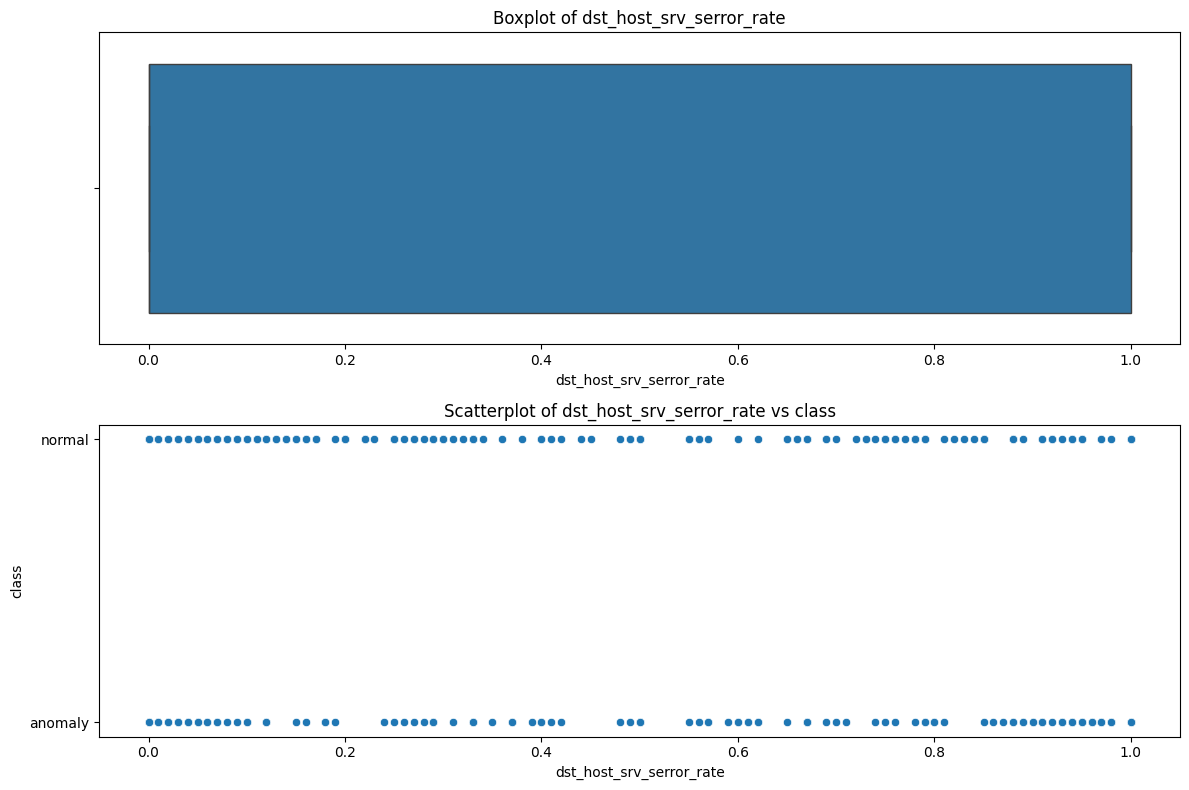

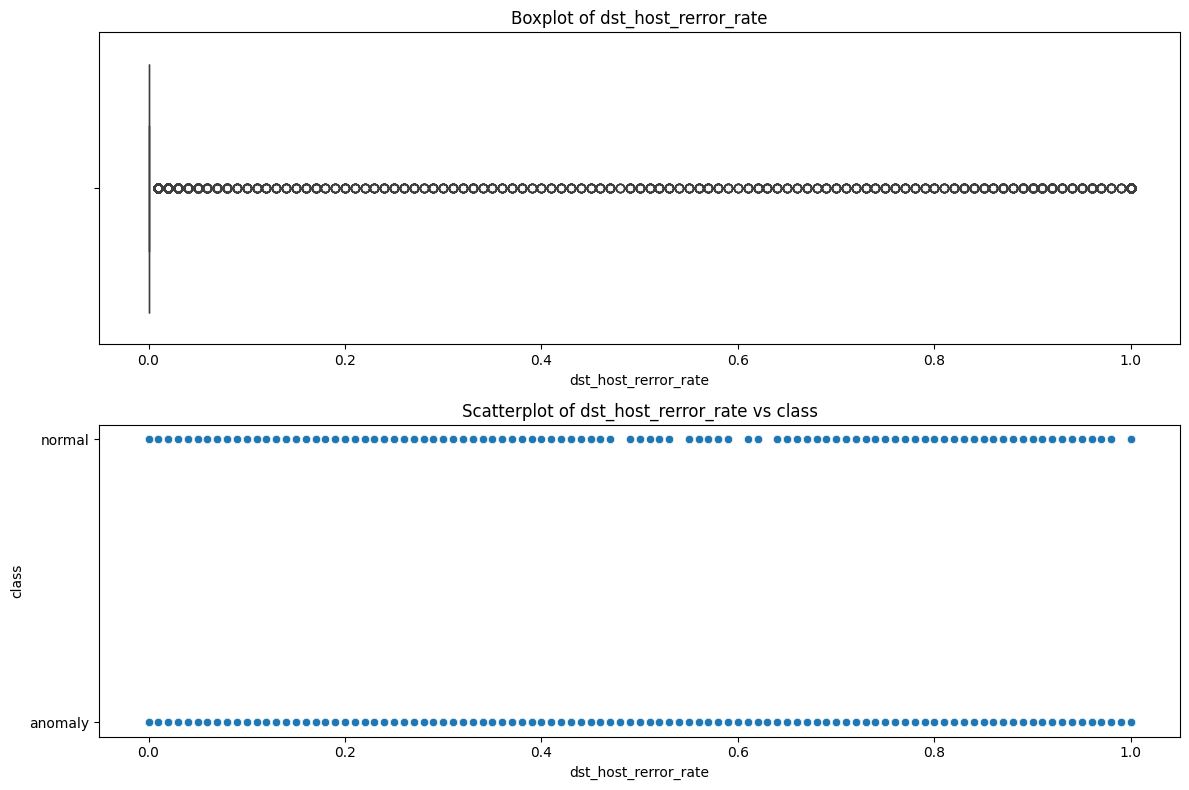

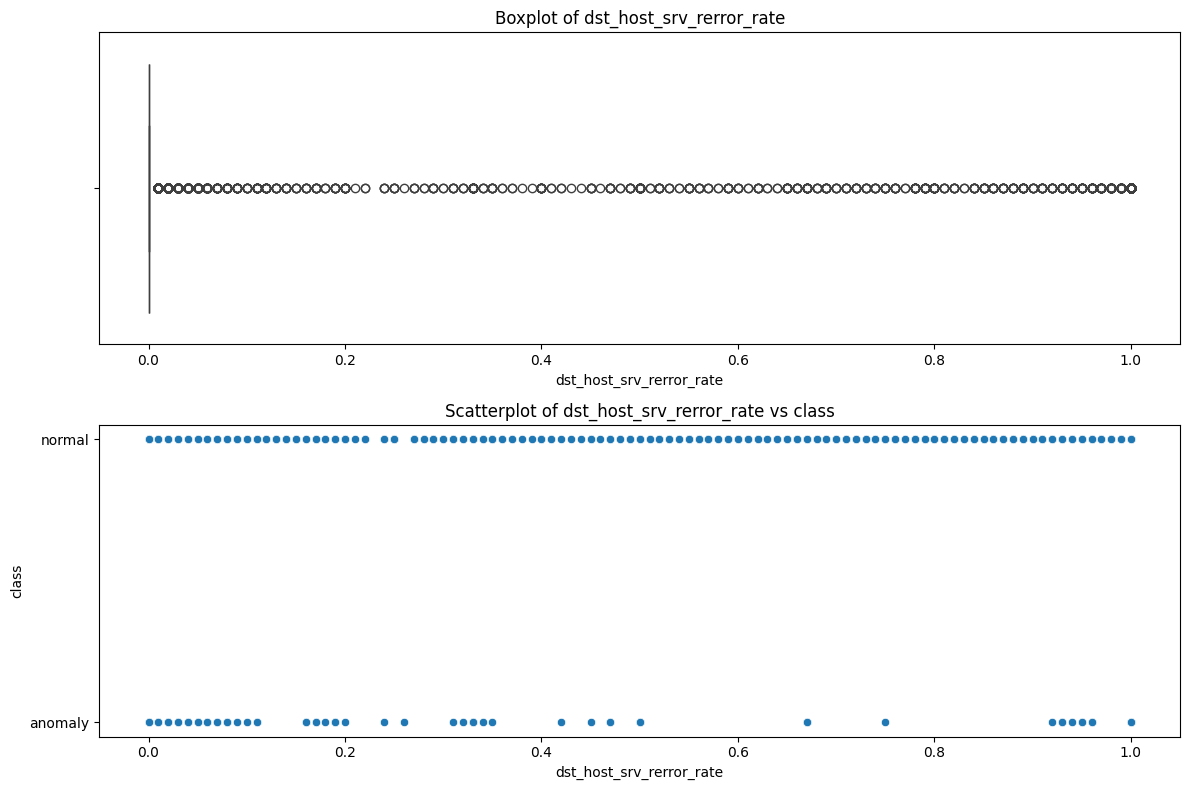

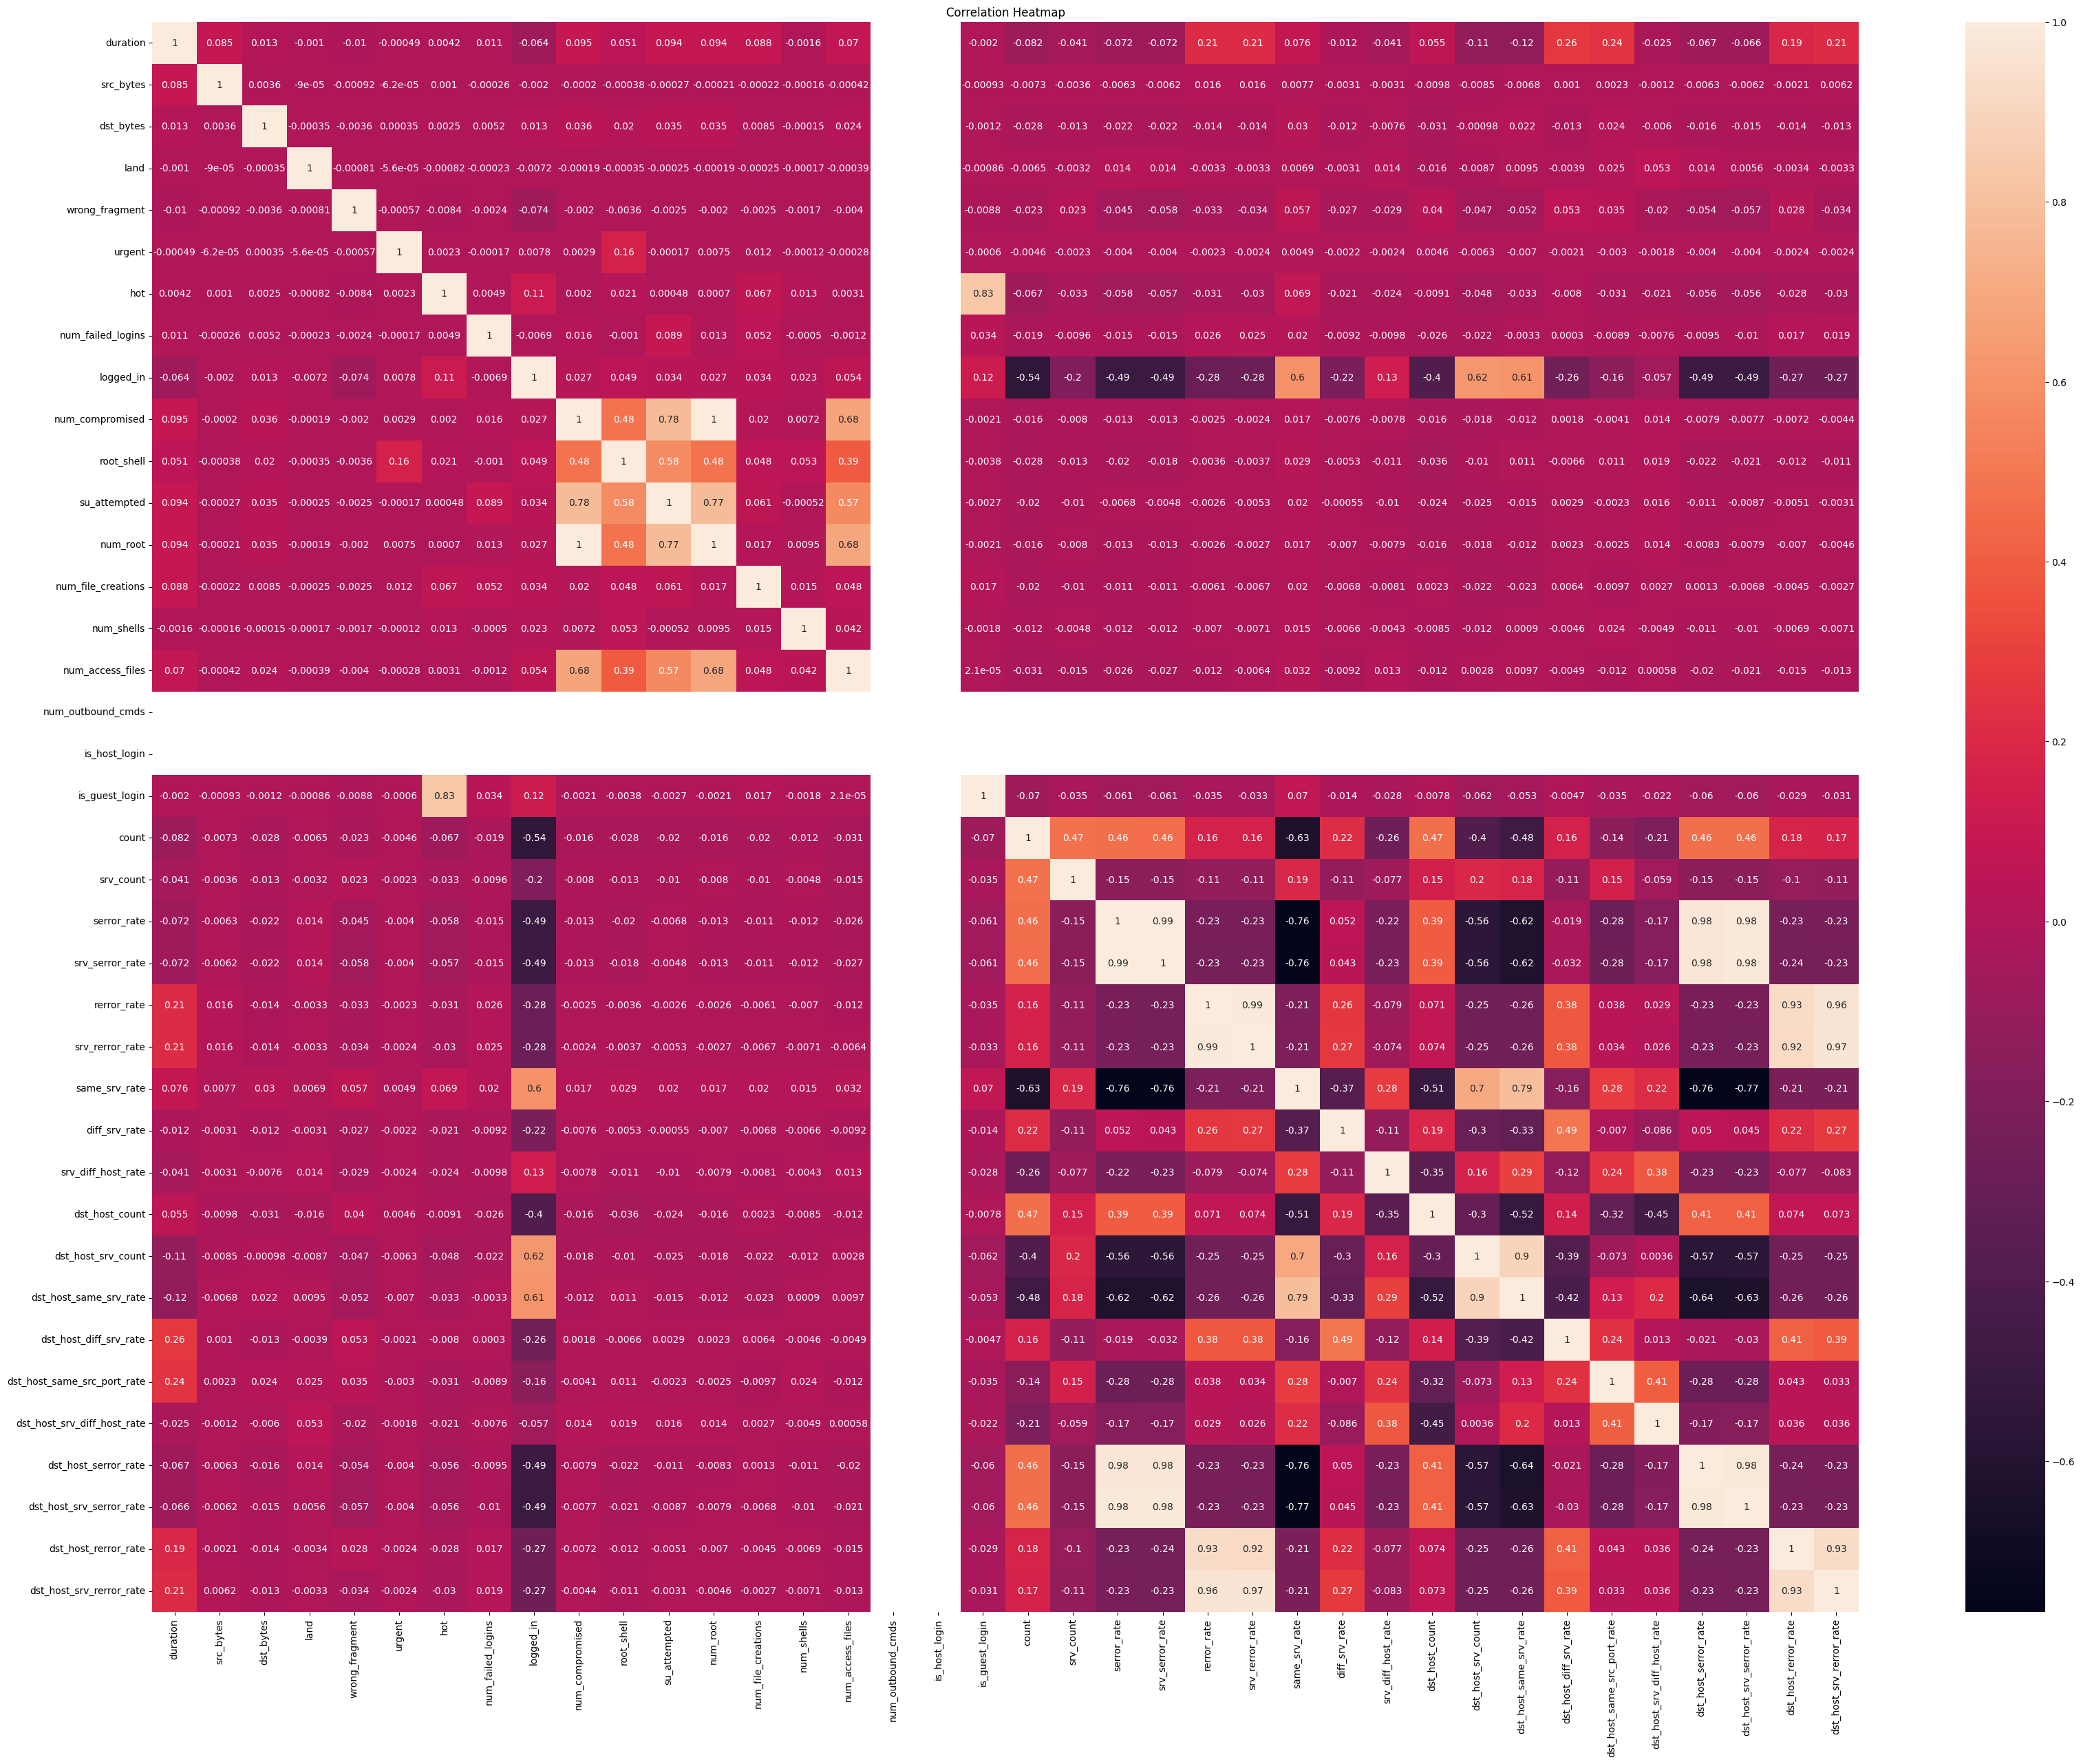

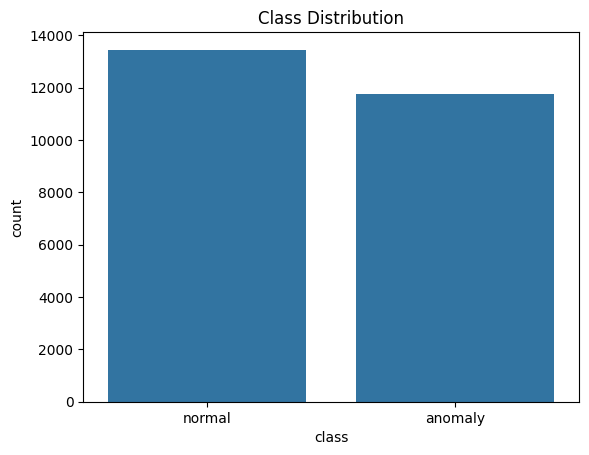

In [ ]:
# Boxplot and scatter plot for each numeric column except 'class'
for col in train:
    if col != 'class' and is_numeric_dtype(train[col]):
        fig, ax = plt.subplots(2, 1, figsize=(12, 8))
        # Boxplot
        sns.boxplot(x=train[col], ax=ax[0])
        ax[0].set_title(f'Boxplot of {col}')

        # Scatter plot with 'class'
        sns.scatterplot(data=train, x=train[col], y=train['class'], ax=ax[1])
        ax[1].set_title(f'Scatterplot of {col} vs class')

        plt.tight_layout()
        plt.show()

# Heatmap of correlation matrix
plt.figure(figsize=(40, 30))
# I included only numerical features for correlation analysis.
sns.heatmap(train.select_dtypes(include=np.number).corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()


# Countplot for 'class' column
sns.countplot(x=train['class'])
plt.title('Class Distribution')
plt.show()

#LABEL ENCODING PART

In [ ]:
from sklearn.preprocessing import LabelEncoder
import joblib

# Defined encoding dictionary for specific columns
encoding_dict = {
    "protocol_type": LabelEncoder(),
    "service": LabelEncoder(),
    "flag": LabelEncoder()
}

In [ ]:
# Function to apply Label Encoding to all object type columns
def le(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            label_encoder = LabelEncoder()
            df[col] = label_encoder.fit_transform(df[col])

# Applied the label encoding to train and test datasets
le(train)
le(test)

In [ ]:
# Saved the encoding dictionary using joblib
joblib.dump(encoding_dict, 'encoders.joblib')

# Drop 'num_outbound_cmds' from both train and test datasets
train.drop(['num_outbound_cmds'], axis=1, inplace=True)
test.drop(['num_outbound_cmds'], axis=1, inplace=True)

# Display the first few rows of the modified train dataset
train.head()

duration  protocol_type  service  flag  src_bytes  dst_bytes  land  \
0         0              1       19     9        491          0     0   
1         0              2       41     9        146          0     0   
2         0              1       46     5          0          0     0   
3         0              1       22     9        232       8153     0   
4         0              1       22     9        199        420     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                  25   
1               0       0    0  ...                   1   
2               0       0    0  ...                  26   
3               0       0    0  ...                 255   
4               0       0    0  ...                 255   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.17                    0.03   
1                    0.00                    0.60   
2                    0.10                    0.05   
3                    1.00                    0.00   
4                    1.00                    0.00   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                         0.17                         0.00   
1                         0.88                         0.00   
2                         0.00                         0.00   
3                         0.03                         0.04   
4                         0.00                         0.00   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                  0.00                      0.00                  0.05   
1                  0.00                      0.00                  0.00   
2                  1.00                      1.00                  0.00   
3                  0.03                      0.01                  0.00   
4                  0.00                      0.00                  0.00   

   dst_host_srv_rerror_rate  class  
0                      0.00      1  
1                      0.00      1  
2                      0.00      0  
3                      0.01      1  
4                      0.00      1  

[5 rows x 41 columns]

# FEATURE EXTRACTION AND SELECTION

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
import itertools

# Separating the  features and target variable
X_train = train.drop(['class'], axis=1)
Y_train = train['class']

In [ ]:
# Separating the  features and target variable
X_train = train.drop(['class'], axis=1)
Y_train = train['class']

In [ ]:
# Initializing the  RandomForestClassifier
rfc = RandomForestClassifier()


In [ ]:
# Initialize RFE with the RandomForestClassifier and select top 10 features
rfe = RFE(rfc, n_features_to_select=10)
rfe = rfe.fit(X_train, Y_train)


In [ ]:
# Created a feature map of selected features
feature_map = [(i, v) for i, v in zip(rfe.get_support(), X_train.columns)]

# Extracted the names of selected features
selected_features = [v for i, v in feature_map if i]

In [ ]:
# Displaying the selected features
print("Selected Features:", selected_features)

Selected Features: ['protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'count', 'same_srv_rate', 'diff_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate']


In [ ]:
# Updated X_train to contain only the selected features
X_train = X_train[selected_features]


In [ ]:
# Displayed the first few rows of the modified X_train
print(X_train.head())

   protocol_type  service  flag  src_bytes  dst_bytes  count  same_srv_rate  \
0              1       19     9        491          0      2           1.00   
1              2       41     9        146          0     13           0.08   
2              1       46     5          0          0    123           0.05   
3              1       22     9        232       8153      5           1.00   
4              1       22     9        199        420     30           1.00   

   diff_srv_rate  dst_host_srv_count  dst_host_same_srv_rate  
0           0.00                  25                    0.17  
1           0.15                   1                    0.00  
2           0.07                  26                    0.10  
3           0.00                 255                    1.00  
4           0.00                 255                    1.00  


# Split and scale data

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Initializing the StandardScaler
scale = StandardScaler()


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Initializing the StandardScaler
scale = StandardScaler()

# I scaled the training features
X_train = scale.fit_transform(X_train)

# Ensuring  the test set only contains the selected features
X_test = test[selected_features]

# Also, scaling  the test dataset
X_test = scale.transform(X_test)

# Now, splited the training data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, train_size=0.70, random_state=2)

# Display the shape of the train and test sets
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


x_train shape: (17634, 10)
x_test shape: (7558, 10)
y_train shape: (17634,)
y_test shape: (7558,)


# K Nearest Neighbors (KNN) classification model

In [ ]:
import optuna
from sklearn.neighbors import KNeighborsClassifier

# Defining the objective function for Optuna optimization
def objective(trial):
    n_neighbors = trial.suggest_int('KNN_n_neighbors', 2, 16, log=False)
    classifier_obj = KNeighborsClassifier(n_neighbors=n_neighbors)
    classifier_obj.fit(x_train, y_train)
    accuracy = classifier_obj.score(x_test, y_test)
    return accuracy

# Created a study object and optimize it
study_KNN = optuna.create_study(direction='maximize')
study_KNN.optimize(objective, n_trials=10)  # Number of trials can be adjusted

# Printed the best trial
print("Best trial:")
print(study_KNN.best_trial)

# Trained a KNeighborsClassifier with the best parameters found
best_n_neighbors = study_KNN.best_trial.params['KNN_n_neighbors']
KNN_model = KNeighborsClassifier(n_neighbors=best_n_neighbors)
KNN_model.fit(x_train, y_train)

# Evaluating the model on both training and testing sets
KNN_train = KNN_model.score(x_train, y_train)
KNN_test = KNN_model.score(x_test, y_test)

# Printed the training and testing scores
print(f"Train Score: {KNN_train}")
print(f"Test Score: {KNN_test}")


Best trial:
FrozenTrial(number=6, state=TrialState.COMPLETE, values=[0.9843874040751521], datetime_start=datetime.datetime(2024, 9, 7, 17, 21, 40, 256485), datetime_complete=datetime.datetime(2024, 9, 7, 17, 21, 41, 285130), params={'KNN_n_neighbors': 3}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'KNN_n_neighbors': IntDistribution(high=16, log=False, low=2, step=1)}, trial_id=6, value=None)
Train Score: 0.9912101621866848
Test Score: 0.9843874040751521


# Bernoulli Naive Bayes Classifier


In [ ]:
from sklearn.naive_bayes import BernoulliNB

# Defined the objective function for BernoulliNB optimization
def objective_bnb(trial):
    alpha = trial.suggest_loguniform('BNB_alpha', 1e-5, 1e+1)  # Regularization parameter
    classifier_obj = BernoulliNB(alpha=alpha)
    classifier_obj.fit(x_train, y_train)
    accuracy = classifier_obj.score(x_test, y_test)
    return accuracy

# Created a study object and optimize it
study_BNB = optuna.create_study(direction='maximize')
study_BNB.optimize(objective_bnb, n_trials=10)  # Number of trials can be adjusted

# Printing the best trial
print("Best BernoulliNB trial:")
print(study_BNB.best_trial)

# Trained a BernoulliNB with the best parameters found
best_alpha = study_BNB.best_trial.params['BNB_alpha']
BNB_model = BernoulliNB(alpha=best_alpha)
BNB_model.fit(x_train, y_train)

# Evaluate the model on both training and testing sets
BNB_train = BNB_model.score(x_train, y_train)
BNB_test = BNB_model.score(x_test, y_test)

# Printed the training and testing scores
print(f"BernoulliNB Train Score: {BNB_train}")
print(f"BernoulliNB Test Score: {BNB_test}")


Best BernoulliNB trial:
FrozenTrial(number=0, state=TrialState.COMPLETE, values=[0.8970627150039693], datetime_start=datetime.datetime(2024, 9, 7, 17, 21, 49, 888504), datetime_complete=datetime.datetime(2024, 9, 7, 17, 21, 49, 913777), params={'BNB_alpha': 7.931810840131398}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'BNB_alpha': FloatDistribution(high=10.0, log=True, low=1e-05, step=None)}, trial_id=0, value=None)
BernoulliNB Train Score: 0.8975842123171147
BernoulliNB Test Score: 0.8970627150039693


# Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Defined the objective function for DecisionTreeClassifier optimization
def objective_dtc(trial):
    max_depth = trial.suggest_int('DTC_max_depth', 1, 20)  # Maximum depth of the tree
    min_samples_split = trial.suggest_int('DTC_min_samples_split', 2, 20)  # Minimum samples required to split an internal node
    classifier_obj = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split)
    classifier_obj.fit(x_train, y_train)
    accuracy = classifier_obj.score(x_test, y_test)
    return accuracy

# Created a study object and optimize it
study_DTC = optuna.create_study(direction='maximize')
study_DTC.optimize(objective_dtc, n_trials=10)  # Number of trials can be adjusted

# Printed the best trial
print("Best DecisionTreeClassifier trial:")
print(study_DTC.best_trial)

# Trained a DecisionTreeClassifier with the best parameters found
best_max_depth = study_DTC.best_trial.params['DTC_max_depth']
best_min_samples_split = study_DTC.best_trial.params['DTC_min_samples_split']
DTC_model = DecisionTreeClassifier(max_depth=best_max_depth, min_samples_split=best_min_samples_split)
DTC_model.fit(x_train, y_train)

# Evaluate the model on both training and testing sets
DTC_train = DTC_model.score(x_train, y_train)
DTC_test = DTC_model.score(x_test, y_test)

# Printed the training and testing scores
print(f"DecisionTreeClassifier Train Score: {DTC_train}")
print(f"DecisionTreeClassifier Test Score: {DTC_test}")


Best DecisionTreeClassifier trial:
FrozenTrial(number=7, state=TrialState.COMPLETE, values=[0.9944429743318338], datetime_start=datetime.datetime(2024, 9, 7, 17, 21, 50, 376587), datetime_complete=datetime.datetime(2024, 9, 7, 17, 21, 50, 434812), params={'DTC_max_depth': 15, 'DTC_min_samples_split': 4}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'DTC_max_depth': IntDistribution(high=20, log=False, low=1, step=1), 'DTC_min_samples_split': IntDistribution(high=20, log=False, low=2, step=1)}, trial_id=7, value=None)
DecisionTreeClassifier Train Score: 0.9995463309515709
DecisionTreeClassifier Test Score: 0.9941783540619211


In [ ]:
# Converted accuracy scores to percentages
def accuracy_to_percentage(accuracy):
    return accuracy * 100

# KNN
knn_train_percentage = accuracy_to_percentage(0.9889985255755926)
knn_test_percentage = accuracy_to_percentage(0.9829319925906325)

# BNB
bnb_train_percentage = accuracy_to_percentage(0.8851083134853125)
bnb_test_percentage = accuracy_to_percentage(0.8870071447472876)

# DTC
dtc_train_percentage = accuracy_to_percentage(0.9998298741068391)
dtc_test_percentage = accuracy_to_percentage(0.9936491135220958)

# Print the results
print("K-Nearest Neighbors (KNN):")
print(f"Train Score: {knn_train_percentage:.2f}%")
print(f"Test Score: {knn_test_percentage:.2f}%")

print("\nBernoulli Naive Bayes (BNB):")
print(f"Train Score: {bnb_train_percentage:.2f}%")
print(f"Test Score: {bnb_test_percentage:.2f}%")

print("\nDecision Tree Classifier (DTC):")
print(f"Train Score: {dtc_train_percentage:.2f}%")
print(f"Test Score: {dtc_test_percentage:.2f}%")


K-Nearest Neighbors (KNN):
Train Score: 98.90%
Test Score: 98.29%

Bernoulli Naive Bayes (BNB):
Train Score: 88.51%
Test Score: 88.70%

Decision Tree Classifier (DTC):
Train Score: 99.98%
Test Score: 99.36%


In [ ]:
import joblib

# Save KNN model
joblib.dump(KNN_model, 'knn_model.joblib')

# Save BNB model
joblib.dump(BNB_model, 'bnb_model.joblib')

# Save DTC model
joblib.dump(DTC_model, 'dtc_model.joblib')


['dtc_model.joblib']